## Predicting Burst Pressure with ANN, Tensorflow and Global Data

Database References:<br>
- Cronin, D.S., 2000. Assessment of corrosion defects in pipelines. Doctor of philosophy dissertation, University of Waterloo.
- Freire, J.L.F., Vieira, R.D., Castro, J.T.P. and Benjamin, A.C., 2006. Part 3: Burst tests of pipeline with extensive longitudinal metal loss. Experimental Techniques, 30(6), pp.60-65.
- Ma, B., Shuai, J., Liu, D. and Xu, K., 2013. Assessment on failure pressure of high strength pipeline with corrosion defects. Engineering Failure Analysis, 32, pp.209-219.
- Phan, H.C., Dhar, A.S. and Mondal, B.C., 2017. Revisiting burst pressure models for corroded pipelines. Canadian Journal of Civil Engineering, 44(7), pp.485-494.
- Shuai, Y., Shuai, J. and Xu, K., 2017. Probabilistic analysis of corroded pipelines based on a new failure pressure model. Engineering failure analysis, 81, pp.216-233.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

C:\Users\phanc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Set up working directory
os.chdir(r'C:\Hieu 2019\After grad\the 7th paper')
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : C:\Hieu 2019\After grad\the 7th paper


In [3]:
# Importing the dataset
file_name='data1.csv'
dataset = pd.read_csv(file_name)
dataset.head()

,Unnamed: 0,Grade,D,t,d,L,xicma u,P test,Po,Ratio,file,Cummulative
0,1,X42,273.30,4.95,3.30,182.88,453.86,7.20,16.440593,0.437940,2,1
1,2,X42,272.97,4.67,2.62,48.26,453.86,11.80,15.529371,0.759850,2,2
2,3,X42,273.53,4.78,1.63,30.48,453.86,14.56,15.862617,0.917881,2,3
3,4,X42,273.10,4.88,2.18,101.60,453.86,11.69,16.219969,0.720717,2,4
4,5,X42,273.89,4.93,1.60,45.72,453.86,14.63,16.338894,0.895409,2,5


In [4]:
# Setup input variable and dependance variable
X = dataset.iloc[:, 2:7].values
y = dataset.iloc[:,7].values
# y = y.reshape(-1, )

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# sc_y = StandardScaler()
X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
n_features = X_train.shape[1]
n_classes = 5
random_seed = 0
np.random.seed(random_seed)
learning_rate=0.0001


g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32, shape=(None, n_features), name='tf_x')

    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')

    L1 = tf.layers.dense(inputs=tf_x, units=32, activation=tf.nn.relu, name='layer1')

    L2 = tf.layers.dense(inputs=L1, units=256, activation=tf.nn.relu, name='layer2')

    P = tf.squeeze((tf.layers.dense(inputs=L2, units=1, activation=None, name='output')))

#     {
#         'classes' : tf.argmax(logits, axis=1, name='predicted_classes'),
#         'probabilities' : tf.nn.softmax(logits, name='softmax_tensor')
#     }

In [7]:
## define cost function and optimizer:
with g.as_default():
    cost = tf.losses.mean_squared_error(tf_y, P)

#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

#     train_op = optimizer.minimize(loss=cost)


    train_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss=cost)
    

    init_op = tf.global_variables_initializer() 

In [22]:
sess = tf.Session(graph=g) 
# training_costs,parameters = train_model1(sess, model1, X_train, y_train, num_epochs=10000)

feed = {tf_x:X_train,tf_y:y_train}
sess.run(init_op)

epoch_total=0

learning_rates=[1,0.1,0.001,0.0001,0.00001]
epoch_num=10000

for i in learning_rates:
    learning_rate=i
    print("=============== Learning rate:",learning_rate," ===================")
    for epoch in range(epoch_num):
        _, epoch_cost = sess.run([train_op, cost],feed_dict=feed)
        epoch_total+=1
        print("epoch: ", epoch_total,' ---> Cost:  ',epoch_cost)

=============== Learning rate: 1  ===================
epoch:  1  ---> Cost:   262.5795
epoch:  2  ---> Cost:   262.07913
epoch:  3  ---> Cost:   261.5795
epoch:  4  ---> Cost:   261.08075
epoch:  5  ---> Cost:   260.58286
epoch:  6  ---> Cost:   260.0856
epoch:  7  ---> Cost:   259.5888
epoch:  8  ---> Cost:   259.09256
epoch:  9  ---> Cost:   258.59628
epoch:  10  ---> Cost:   258.09995
epoch:  11  ---> Cost:   257.60394
epoch:  12  ---> Cost:   257.1085
epoch:  13  ---> Cost:   256.6132
epoch:  14  ---> Cost:   256.1183
epoch:  15  ---> Cost:   255.62376
epoch:  16  ---> Cost:   255.12961
epoch:  17  ---> Cost:   254.6355
epoch:  18  ---> Cost:   254.14157
epoch:  19  ---> Cost:   253.64798
epoch:  20  ---> Cost:   253.15446
epoch:  21  ---> Cost:   252.66086
epoch:  22  ---> Cost:   252.1666
epoch:  23  ---> Cost:   251.67229
epoch:  24  ---> Cost:   251.17781
epoch:  25  ---> Cost:   250.68312
epoch:  26  ---> Cost:   250.1882
epoch:  27  ---> Cost:   249.6931
epoch:  28  ---> Cost

epoch:  252  ---> Cost:   91.433044
epoch:  253  ---> Cost:   90.71562
epoch:  254  ---> Cost:   90.00382
epoch:  255  ---> Cost:   89.29736
epoch:  256  ---> Cost:   88.59606
epoch:  257  ---> Cost:   87.90024
epoch:  258  ---> Cost:   87.21027
epoch:  259  ---> Cost:   86.52626
epoch:  260  ---> Cost:   85.84819
epoch:  261  ---> Cost:   85.17597
epoch:  262  ---> Cost:   84.50969
epoch:  263  ---> Cost:   83.84943
epoch:  264  ---> Cost:   83.1951
epoch:  265  ---> Cost:   82.54669
epoch:  266  ---> Cost:   81.90452
epoch:  267  ---> Cost:   81.26874
epoch:  268  ---> Cost:   80.639275
epoch:  269  ---> Cost:   80.016136
epoch:  270  ---> Cost:   79.399506
epoch:  271  ---> Cost:   78.789314
epoch:  272  ---> Cost:   78.18564
epoch:  273  ---> Cost:   77.58841
epoch:  274  ---> Cost:   76.99766
epoch:  275  ---> Cost:   76.413506
epoch:  276  ---> Cost:   75.83603
epoch:  277  ---> Cost:   75.265205
epoch:  278  ---> Cost:   74.70107
epoch:  279  ---> Cost:   74.14349
epoch:  280  -

epoch:  534  ---> Cost:   34.43304
epoch:  535  ---> Cost:   34.378986
epoch:  536  ---> Cost:   34.325027
epoch:  537  ---> Cost:   34.2712
epoch:  538  ---> Cost:   34.217476
epoch:  539  ---> Cost:   34.16386
epoch:  540  ---> Cost:   34.110363
epoch:  541  ---> Cost:   34.057
epoch:  542  ---> Cost:   34.003845
epoch:  543  ---> Cost:   33.950787
epoch:  544  ---> Cost:   33.89785
epoch:  545  ---> Cost:   33.84502
epoch:  546  ---> Cost:   33.7923
epoch:  547  ---> Cost:   33.739693
epoch:  548  ---> Cost:   33.687202
epoch:  549  ---> Cost:   33.63468
epoch:  550  ---> Cost:   33.582253
epoch:  551  ---> Cost:   33.52995
epoch:  552  ---> Cost:   33.477753
epoch:  553  ---> Cost:   33.425606
epoch:  554  ---> Cost:   33.3735
epoch:  555  ---> Cost:   33.321514
epoch:  556  ---> Cost:   33.269775
epoch:  557  ---> Cost:   33.21821
epoch:  558  ---> Cost:   33.16676
epoch:  559  ---> Cost:   33.115414
epoch:  560  ---> Cost:   33.064182
epoch:  561  ---> Cost:   33.013058
epoch:  5

epoch:  783  ---> Cost:   23.476664
epoch:  784  ---> Cost:   23.441458
epoch:  785  ---> Cost:   23.40633
epoch:  786  ---> Cost:   23.371271
epoch:  787  ---> Cost:   23.336285
epoch:  788  ---> Cost:   23.30137
epoch:  789  ---> Cost:   23.266539
epoch:  790  ---> Cost:   23.231724
epoch:  791  ---> Cost:   23.196943
epoch:  792  ---> Cost:   23.162237
epoch:  793  ---> Cost:   23.1276
epoch:  794  ---> Cost:   23.093037
epoch:  795  ---> Cost:   23.058563
epoch:  796  ---> Cost:   23.024183
epoch:  797  ---> Cost:   22.98986
epoch:  798  ---> Cost:   22.955568
epoch:  799  ---> Cost:   22.921343
epoch:  800  ---> Cost:   22.887161
epoch:  801  ---> Cost:   22.853054
epoch:  802  ---> Cost:   22.819014
epoch:  803  ---> Cost:   22.785053
epoch:  804  ---> Cost:   22.75117
epoch:  805  ---> Cost:   22.717358
epoch:  806  ---> Cost:   22.683699
epoch:  807  ---> Cost:   22.650068
epoch:  808  ---> Cost:   22.61651
epoch:  809  ---> Cost:   22.583023
epoch:  810  ---> Cost:   22.549612

epoch:  1059  ---> Cost:   16.117195
epoch:  1060  ---> Cost:   16.097391
epoch:  1061  ---> Cost:   16.077633
epoch:  1062  ---> Cost:   16.057913
epoch:  1063  ---> Cost:   16.03824
epoch:  1064  ---> Cost:   16.018621
epoch:  1065  ---> Cost:   15.999097
epoch:  1066  ---> Cost:   15.979619
epoch:  1067  ---> Cost:   15.960182
epoch:  1068  ---> Cost:   15.940786
epoch:  1069  ---> Cost:   15.921437
epoch:  1070  ---> Cost:   15.902131
epoch:  1071  ---> Cost:   15.882865
epoch:  1072  ---> Cost:   15.863644
epoch:  1073  ---> Cost:   15.84446
epoch:  1074  ---> Cost:   15.825319
epoch:  1075  ---> Cost:   15.806216
epoch:  1076  ---> Cost:   15.787163
epoch:  1077  ---> Cost:   15.76816
epoch:  1078  ---> Cost:   15.749194
epoch:  1079  ---> Cost:   15.730271
epoch:  1080  ---> Cost:   15.71139
epoch:  1081  ---> Cost:   15.692545
epoch:  1082  ---> Cost:   15.673743
epoch:  1083  ---> Cost:   15.654984
epoch:  1084  ---> Cost:   15.636263
epoch:  1085  ---> Cost:   15.617581
epoch

epoch:  1282  ---> Cost:   12.615629
epoch:  1283  ---> Cost:   12.603235
epoch:  1284  ---> Cost:   12.590864
epoch:  1285  ---> Cost:   12.578523
epoch:  1286  ---> Cost:   12.566206
epoch:  1287  ---> Cost:   12.553902
epoch:  1288  ---> Cost:   12.541595
epoch:  1289  ---> Cost:   12.529314
epoch:  1290  ---> Cost:   12.517042
epoch:  1291  ---> Cost:   12.504777
epoch:  1292  ---> Cost:   12.492508
epoch:  1293  ---> Cost:   12.480266
epoch:  1294  ---> Cost:   12.468057
epoch:  1295  ---> Cost:   12.455873
epoch:  1296  ---> Cost:   12.4437275
epoch:  1297  ---> Cost:   12.431617
epoch:  1298  ---> Cost:   12.419521
epoch:  1299  ---> Cost:   12.407465
epoch:  1300  ---> Cost:   12.395441
epoch:  1301  ---> Cost:   12.383432
epoch:  1302  ---> Cost:   12.37145
epoch:  1303  ---> Cost:   12.359495
epoch:  1304  ---> Cost:   12.34756
epoch:  1305  ---> Cost:   12.335646
epoch:  1306  ---> Cost:   12.323724
epoch:  1307  ---> Cost:   12.31183
epoch:  1308  ---> Cost:   12.299961
epo

epoch:  1513  ---> Cost:   10.274793
epoch:  1514  ---> Cost:   10.266742
epoch:  1515  ---> Cost:   10.258699
epoch:  1516  ---> Cost:   10.250674
epoch:  1517  ---> Cost:   10.242675
epoch:  1518  ---> Cost:   10.23468
epoch:  1519  ---> Cost:   10.226706
epoch:  1520  ---> Cost:   10.218763
epoch:  1521  ---> Cost:   10.210824
epoch:  1522  ---> Cost:   10.202904
epoch:  1523  ---> Cost:   10.195003
epoch:  1524  ---> Cost:   10.18712
epoch:  1525  ---> Cost:   10.179288
epoch:  1526  ---> Cost:   10.17147
epoch:  1527  ---> Cost:   10.163665
epoch:  1528  ---> Cost:   10.155886
epoch:  1529  ---> Cost:   10.148114
epoch:  1530  ---> Cost:   10.140358
epoch:  1531  ---> Cost:   10.132623
epoch:  1532  ---> Cost:   10.124901
epoch:  1533  ---> Cost:   10.117188
epoch:  1534  ---> Cost:   10.10948
epoch:  1535  ---> Cost:   10.101784
epoch:  1536  ---> Cost:   10.094115
epoch:  1537  ---> Cost:   10.086433
epoch:  1538  ---> Cost:   10.078734
epoch:  1539  ---> Cost:   10.071064
epoch

epoch:  1774  ---> Cost:   8.58835
epoch:  1775  ---> Cost:   8.5832615
epoch:  1776  ---> Cost:   8.578175
epoch:  1777  ---> Cost:   8.573096
epoch:  1778  ---> Cost:   8.568041
epoch:  1779  ---> Cost:   8.562984
epoch:  1780  ---> Cost:   8.557961
epoch:  1781  ---> Cost:   8.552953
epoch:  1782  ---> Cost:   8.547948
epoch:  1783  ---> Cost:   8.542954
epoch:  1784  ---> Cost:   8.537973
epoch:  1785  ---> Cost:   8.532998
epoch:  1786  ---> Cost:   8.5280285
epoch:  1787  ---> Cost:   8.523078
epoch:  1788  ---> Cost:   8.51813
epoch:  1789  ---> Cost:   8.51319
epoch:  1790  ---> Cost:   8.50826
epoch:  1791  ---> Cost:   8.503339
epoch:  1792  ---> Cost:   8.498427
epoch:  1793  ---> Cost:   8.493529
epoch:  1794  ---> Cost:   8.488632
epoch:  1795  ---> Cost:   8.483745
epoch:  1796  ---> Cost:   8.478865
epoch:  1797  ---> Cost:   8.474006
epoch:  1798  ---> Cost:   8.469141
epoch:  1799  ---> Cost:   8.464292
epoch:  1800  ---> Cost:   8.45945
epoch:  1801  ---> Cost:   8.45

epoch:  2063  ---> Cost:   7.4754596
epoch:  2064  ---> Cost:   7.4726124
epoch:  2065  ---> Cost:   7.469762
epoch:  2066  ---> Cost:   7.4669237
epoch:  2067  ---> Cost:   7.4640822
epoch:  2068  ---> Cost:   7.4612393
epoch:  2069  ---> Cost:   7.458381
epoch:  2070  ---> Cost:   7.4555206
epoch:  2071  ---> Cost:   7.4526615
epoch:  2072  ---> Cost:   7.449812
epoch:  2073  ---> Cost:   7.4469666
epoch:  2074  ---> Cost:   7.4441214
epoch:  2075  ---> Cost:   7.4412823
epoch:  2076  ---> Cost:   7.4384456
epoch:  2077  ---> Cost:   7.435619
epoch:  2078  ---> Cost:   7.4327936
epoch:  2079  ---> Cost:   7.4299664
epoch:  2080  ---> Cost:   7.4271464
epoch:  2081  ---> Cost:   7.4243355
epoch:  2082  ---> Cost:   7.421527
epoch:  2083  ---> Cost:   7.4187245
epoch:  2084  ---> Cost:   7.4159226
epoch:  2085  ---> Cost:   7.413126
epoch:  2086  ---> Cost:   7.4103355
epoch:  2087  ---> Cost:   7.4075418
epoch:  2088  ---> Cost:   7.4047513
epoch:  2089  ---> Cost:   7.401973
epoch:  

epoch:  2294  ---> Cost:   6.915185
epoch:  2295  ---> Cost:   6.9131904
epoch:  2296  ---> Cost:   6.911197
epoch:  2297  ---> Cost:   6.9092116
epoch:  2298  ---> Cost:   6.9072237
epoch:  2299  ---> Cost:   6.9052424
epoch:  2300  ---> Cost:   6.903266
epoch:  2301  ---> Cost:   6.9012904
epoch:  2302  ---> Cost:   6.899323
epoch:  2303  ---> Cost:   6.897383
epoch:  2304  ---> Cost:   6.8954415
epoch:  2305  ---> Cost:   6.893509
epoch:  2306  ---> Cost:   6.8915725
epoch:  2307  ---> Cost:   6.889648
epoch:  2308  ---> Cost:   6.8877134
epoch:  2309  ---> Cost:   6.8858027
epoch:  2310  ---> Cost:   6.883897
epoch:  2311  ---> Cost:   6.882004
epoch:  2312  ---> Cost:   6.8800993
epoch:  2313  ---> Cost:   6.878211
epoch:  2314  ---> Cost:   6.8763137
epoch:  2315  ---> Cost:   6.8744264
epoch:  2316  ---> Cost:   6.872538
epoch:  2317  ---> Cost:   6.870655
epoch:  2318  ---> Cost:   6.868767
epoch:  2319  ---> Cost:   6.866891
epoch:  2320  ---> Cost:   6.8650136
epoch:  2321  -

epoch:  2545  ---> Cost:   6.502597
epoch:  2546  ---> Cost:   6.5012136
epoch:  2547  ---> Cost:   6.4998236
epoch:  2548  ---> Cost:   6.4984365
epoch:  2549  ---> Cost:   6.4970484
epoch:  2550  ---> Cost:   6.495659
epoch:  2551  ---> Cost:   6.49428
epoch:  2552  ---> Cost:   6.492893
epoch:  2553  ---> Cost:   6.4915113
epoch:  2554  ---> Cost:   6.4901333
epoch:  2555  ---> Cost:   6.48875
epoch:  2556  ---> Cost:   6.487377
epoch:  2557  ---> Cost:   6.4859977
epoch:  2558  ---> Cost:   6.4846234
epoch:  2559  ---> Cost:   6.4832516
epoch:  2560  ---> Cost:   6.4818764
epoch:  2561  ---> Cost:   6.480513
epoch:  2562  ---> Cost:   6.4791493
epoch:  2563  ---> Cost:   6.4777865
epoch:  2564  ---> Cost:   6.4764285
epoch:  2565  ---> Cost:   6.475065
epoch:  2566  ---> Cost:   6.4737105
epoch:  2567  ---> Cost:   6.472355
epoch:  2568  ---> Cost:   6.471
epoch:  2569  ---> Cost:   6.46965
epoch:  2570  ---> Cost:   6.468294
epoch:  2571  ---> Cost:   6.466948
epoch:  2572  ---> C

epoch:  2808  ---> Cost:   6.1985407
epoch:  2809  ---> Cost:   6.1975923
epoch:  2810  ---> Cost:   6.1966248
epoch:  2811  ---> Cost:   6.1956725
epoch:  2812  ---> Cost:   6.1947155
epoch:  2813  ---> Cost:   6.1937613
epoch:  2814  ---> Cost:   6.1928153
epoch:  2815  ---> Cost:   6.191852
epoch:  2816  ---> Cost:   6.190903
epoch:  2817  ---> Cost:   6.1899595
epoch:  2818  ---> Cost:   6.189
epoch:  2819  ---> Cost:   6.188059
epoch:  2820  ---> Cost:   6.1871047
epoch:  2821  ---> Cost:   6.186159
epoch:  2822  ---> Cost:   6.185218
epoch:  2823  ---> Cost:   6.184266
epoch:  2824  ---> Cost:   6.1833177
epoch:  2825  ---> Cost:   6.1823764
epoch:  2826  ---> Cost:   6.181435
epoch:  2827  ---> Cost:   6.180489
epoch:  2828  ---> Cost:   6.179549
epoch:  2829  ---> Cost:   6.1786036
epoch:  2830  ---> Cost:   6.177673
epoch:  2831  ---> Cost:   6.17673
epoch:  2832  ---> Cost:   6.1757874
epoch:  2833  ---> Cost:   6.174858
epoch:  2834  ---> Cost:   6.1739182
epoch:  2835  --->

epoch:  3036  ---> Cost:   5.9974413
epoch:  3037  ---> Cost:   5.996629
epoch:  3038  ---> Cost:   5.9958243
epoch:  3039  ---> Cost:   5.995005
epoch:  3040  ---> Cost:   5.994192
epoch:  3041  ---> Cost:   5.993394
epoch:  3042  ---> Cost:   5.99257
epoch:  3043  ---> Cost:   5.991765
epoch:  3044  ---> Cost:   5.990958
epoch:  3045  ---> Cost:   5.990147
epoch:  3046  ---> Cost:   5.989343
epoch:  3047  ---> Cost:   5.9885325
epoch:  3048  ---> Cost:   5.9877205
epoch:  3049  ---> Cost:   5.9869256
epoch:  3050  ---> Cost:   5.986113
epoch:  3051  ---> Cost:   5.985306
epoch:  3052  ---> Cost:   5.984507
epoch:  3053  ---> Cost:   5.9836974
epoch:  3054  ---> Cost:   5.9828987
epoch:  3055  ---> Cost:   5.982094
epoch:  3056  ---> Cost:   5.9812875
epoch:  3057  ---> Cost:   5.980492
epoch:  3058  ---> Cost:   5.979683
epoch:  3059  ---> Cost:   5.9788837
epoch:  3060  ---> Cost:   5.9780865
epoch:  3061  ---> Cost:   5.977283
epoch:  3062  ---> Cost:   5.9764886
epoch:  3063  --->

epoch:  3319  ---> Cost:   5.7883663
epoch:  3320  ---> Cost:   5.787699
epoch:  3321  ---> Cost:   5.787034
epoch:  3322  ---> Cost:   5.786384
epoch:  3323  ---> Cost:   5.785705
epoch:  3324  ---> Cost:   5.785054
epoch:  3325  ---> Cost:   5.7843924
epoch:  3326  ---> Cost:   5.7837343
epoch:  3327  ---> Cost:   5.783081
epoch:  3328  ---> Cost:   5.7824163
epoch:  3329  ---> Cost:   5.7817755
epoch:  3330  ---> Cost:   5.7811055
epoch:  3331  ---> Cost:   5.780455
epoch:  3332  ---> Cost:   5.779795
epoch:  3333  ---> Cost:   5.7791333
epoch:  3334  ---> Cost:   5.7784796
epoch:  3335  ---> Cost:   5.777811
epoch:  3336  ---> Cost:   5.777164
epoch:  3337  ---> Cost:   5.7764993
epoch:  3338  ---> Cost:   5.775841
epoch:  3339  ---> Cost:   5.775186
epoch:  3340  ---> Cost:   5.7745237
epoch:  3341  ---> Cost:   5.7738743
epoch:  3342  ---> Cost:   5.7732143
epoch:  3343  ---> Cost:   5.7725577
epoch:  3344  ---> Cost:   5.771903
epoch:  3345  ---> Cost:   5.7712545
epoch:  3346  

epoch:  3603  ---> Cost:   5.611402
epoch:  3604  ---> Cost:   5.610833
epoch:  3605  ---> Cost:   5.610272
epoch:  3606  ---> Cost:   5.6096983
epoch:  3607  ---> Cost:   5.6091285
epoch:  3608  ---> Cost:   5.608565
epoch:  3609  ---> Cost:   5.6079826
epoch:  3610  ---> Cost:   5.607433
epoch:  3611  ---> Cost:   5.606855
epoch:  3612  ---> Cost:   5.6062922
epoch:  3613  ---> Cost:   5.6057253
epoch:  3614  ---> Cost:   5.605155
epoch:  3615  ---> Cost:   5.604587
epoch:  3616  ---> Cost:   5.6040244
epoch:  3617  ---> Cost:   5.6034575
epoch:  3618  ---> Cost:   5.6028957
epoch:  3619  ---> Cost:   5.6023245
epoch:  3620  ---> Cost:   5.601757
epoch:  3621  ---> Cost:   5.6011963
epoch:  3622  ---> Cost:   5.60063
epoch:  3623  ---> Cost:   5.600066
epoch:  3624  ---> Cost:   5.5995026
epoch:  3625  ---> Cost:   5.5989404
epoch:  3626  ---> Cost:   5.598361
epoch:  3627  ---> Cost:   5.597824
epoch:  3628  ---> Cost:   5.597233
epoch:  3629  ---> Cost:   5.5966887
epoch:  3630  --

epoch:  3847  ---> Cost:   5.477376
epoch:  3848  ---> Cost:   5.4768496
epoch:  3849  ---> Cost:   5.476307
epoch:  3850  ---> Cost:   5.4757876
epoch:  3851  ---> Cost:   5.475224
epoch:  3852  ---> Cost:   5.474712
epoch:  3853  ---> Cost:   5.4741583
epoch:  3854  ---> Cost:   5.4736333
epoch:  3855  ---> Cost:   5.473098
epoch:  3856  ---> Cost:   5.472557
epoch:  3857  ---> Cost:   5.4720206
epoch:  3858  ---> Cost:   5.471481
epoch:  3859  ---> Cost:   5.4709716
epoch:  3860  ---> Cost:   5.470403
epoch:  3861  ---> Cost:   5.4698954
epoch:  3862  ---> Cost:   5.469344
epoch:  3863  ---> Cost:   5.4688144
epoch:  3864  ---> Cost:   5.4682837
epoch:  3865  ---> Cost:   5.4677525
epoch:  3866  ---> Cost:   5.467203
epoch:  3867  ---> Cost:   5.4666834
epoch:  3868  ---> Cost:   5.466145
epoch:  3869  ---> Cost:   5.4656014
epoch:  3870  ---> Cost:   5.4650893
epoch:  3871  ---> Cost:   5.4645386
epoch:  3872  ---> Cost:   5.464013
epoch:  3873  ---> Cost:   5.4634714
epoch:  3874 

epoch:  4152  ---> Cost:   5.321729
epoch:  4153  ---> Cost:   5.321251
epoch:  4154  ---> Cost:   5.320763
epoch:  4155  ---> Cost:   5.3202877
epoch:  4156  ---> Cost:   5.319799
epoch:  4157  ---> Cost:   5.3193145
epoch:  4158  ---> Cost:   5.3188524
epoch:  4159  ---> Cost:   5.3183503
epoch:  4160  ---> Cost:   5.3178806
epoch:  4161  ---> Cost:   5.3173895
epoch:  4162  ---> Cost:   5.3169193
epoch:  4163  ---> Cost:   5.316423
epoch:  4164  ---> Cost:   5.315966
epoch:  4165  ---> Cost:   5.3154573
epoch:  4166  ---> Cost:   5.314997
epoch:  4167  ---> Cost:   5.314508
epoch:  4168  ---> Cost:   5.314025
epoch:  4169  ---> Cost:   5.313555
epoch:  4170  ---> Cost:   5.3130608
epoch:  4171  ---> Cost:   5.3125916
epoch:  4172  ---> Cost:   5.3121033
epoch:  4173  ---> Cost:   5.3116355
epoch:  4174  ---> Cost:   5.3111434
epoch:  4175  ---> Cost:   5.310667
epoch:  4176  ---> Cost:   5.3101935
epoch:  4177  ---> Cost:   5.3097
epoch:  4178  ---> Cost:   5.30923
epoch:  4179  ---

epoch:  4381  ---> Cost:   5.218069
epoch:  4382  ---> Cost:   5.2176394
epoch:  4383  ---> Cost:   5.2172127
epoch:  4384  ---> Cost:   5.216789
epoch:  4385  ---> Cost:   5.216359
epoch:  4386  ---> Cost:   5.215932
epoch:  4387  ---> Cost:   5.215507
epoch:  4388  ---> Cost:   5.2150874
epoch:  4389  ---> Cost:   5.214653
epoch:  4390  ---> Cost:   5.214242
epoch:  4391  ---> Cost:   5.213793
epoch:  4392  ---> Cost:   5.21339
epoch:  4393  ---> Cost:   5.212944
epoch:  4394  ---> Cost:   5.2125354
epoch:  4395  ---> Cost:   5.212107
epoch:  4396  ---> Cost:   5.211667
epoch:  4397  ---> Cost:   5.2112646
epoch:  4398  ---> Cost:   5.2108254
epoch:  4399  ---> Cost:   5.210401
epoch:  4400  ---> Cost:   5.2099805
epoch:  4401  ---> Cost:   5.209552
epoch:  4402  ---> Cost:   5.2091327
epoch:  4403  ---> Cost:   5.2087016
epoch:  4404  ---> Cost:   5.2082877
epoch:  4405  ---> Cost:   5.2078547
epoch:  4406  ---> Cost:   5.207435
epoch:  4407  ---> Cost:   5.207019
epoch:  4408  --->

epoch:  4663  ---> Cost:   5.104224
epoch:  4664  ---> Cost:   5.1038365
epoch:  4665  ---> Cost:   5.103432
epoch:  4666  ---> Cost:   5.1030645
epoch:  4667  ---> Cost:   5.102662
epoch:  4668  ---> Cost:   5.1022716
epoch:  4669  ---> Cost:   5.1018963
epoch:  4670  ---> Cost:   5.1014934
epoch:  4671  ---> Cost:   5.101121
epoch:  4672  ---> Cost:   5.100725
epoch:  4673  ---> Cost:   5.1003313
epoch:  4674  ---> Cost:   5.099953
epoch:  4675  ---> Cost:   5.0995574
epoch:  4676  ---> Cost:   5.0991693
epoch:  4677  ---> Cost:   5.0987883
epoch:  4678  ---> Cost:   5.098403
epoch:  4679  ---> Cost:   5.0980043
epoch:  4680  ---> Cost:   5.097625
epoch:  4681  ---> Cost:   5.097225
epoch:  4682  ---> Cost:   5.0968523
epoch:  4683  ---> Cost:   5.096458
epoch:  4684  ---> Cost:   5.096064
epoch:  4685  ---> Cost:   5.095693
epoch:  4686  ---> Cost:   5.0952945
epoch:  4687  ---> Cost:   5.0948977
epoch:  4688  ---> Cost:   5.0945334
epoch:  4689  ---> Cost:   5.094124
epoch:  4690  

epoch:  4946  ---> Cost:   4.997739
epoch:  4947  ---> Cost:   4.9973874
epoch:  4948  ---> Cost:   4.997016
epoch:  4949  ---> Cost:   4.9966507
epoch:  4950  ---> Cost:   4.9962807
epoch:  4951  ---> Cost:   4.995928
epoch:  4952  ---> Cost:   4.995556
epoch:  4953  ---> Cost:   4.9952
epoch:  4954  ---> Cost:   4.9948254
epoch:  4955  ---> Cost:   4.9944777
epoch:  4956  ---> Cost:   4.9940987
epoch:  4957  ---> Cost:   4.9937315
epoch:  4958  ---> Cost:   4.9933815
epoch:  4959  ---> Cost:   4.9929976
epoch:  4960  ---> Cost:   4.992648
epoch:  4961  ---> Cost:   4.992283
epoch:  4962  ---> Cost:   4.991913
epoch:  4963  ---> Cost:   4.9915566
epoch:  4964  ---> Cost:   4.9911876
epoch:  4965  ---> Cost:   4.990829
epoch:  4966  ---> Cost:   4.9904547
epoch:  4967  ---> Cost:   4.990101
epoch:  4968  ---> Cost:   4.989738
epoch:  4969  ---> Cost:   4.989367
epoch:  4970  ---> Cost:   4.989001
epoch:  4971  ---> Cost:   4.988652
epoch:  4972  ---> Cost:   4.988267
epoch:  4973  --->

epoch:  5172  ---> Cost:   4.9163647
epoch:  5173  ---> Cost:   4.9160004
epoch:  5174  ---> Cost:   4.915656
epoch:  5175  ---> Cost:   4.9152913
epoch:  5176  ---> Cost:   4.9149365
epoch:  5177  ---> Cost:   4.9145813
epoch:  5178  ---> Cost:   4.9142194
epoch:  5179  ---> Cost:   4.913871
epoch:  5180  ---> Cost:   4.9135246
epoch:  5181  ---> Cost:   4.913157
epoch:  5182  ---> Cost:   4.9128127
epoch:  5183  ---> Cost:   4.912449
epoch:  5184  ---> Cost:   4.912099
epoch:  5185  ---> Cost:   4.9117384
epoch:  5186  ---> Cost:   4.9113874
epoch:  5187  ---> Cost:   4.911032
epoch:  5188  ---> Cost:   4.9106803
epoch:  5189  ---> Cost:   4.9103274
epoch:  5190  ---> Cost:   4.9099817
epoch:  5191  ---> Cost:   4.909609
epoch:  5192  ---> Cost:   4.909273
epoch:  5193  ---> Cost:   4.9089117
epoch:  5194  ---> Cost:   4.908549
epoch:  5195  ---> Cost:   4.9082093
epoch:  5196  ---> Cost:   4.9078493
epoch:  5197  ---> Cost:   4.9075027
epoch:  5198  ---> Cost:   4.907149
epoch:  519

epoch:  5402  ---> Cost:   4.8362803
epoch:  5403  ---> Cost:   4.835941
epoch:  5404  ---> Cost:   4.83561
epoch:  5405  ---> Cost:   4.835259
epoch:  5406  ---> Cost:   4.8349285
epoch:  5407  ---> Cost:   4.834593
epoch:  5408  ---> Cost:   4.834243
epoch:  5409  ---> Cost:   4.833919
epoch:  5410  ---> Cost:   4.83357
epoch:  5411  ---> Cost:   4.833234
epoch:  5412  ---> Cost:   4.8329015
epoch:  5413  ---> Cost:   4.83255
epoch:  5414  ---> Cost:   4.8322215
epoch:  5415  ---> Cost:   4.831886
epoch:  5416  ---> Cost:   4.8315377
epoch:  5417  ---> Cost:   4.8312116
epoch:  5418  ---> Cost:   4.83086
epoch:  5419  ---> Cost:   4.83054
epoch:  5420  ---> Cost:   4.8301888
epoch:  5421  ---> Cost:   4.82985
epoch:  5422  ---> Cost:   4.829518
epoch:  5423  ---> Cost:   4.829172
epoch:  5424  ---> Cost:   4.828844
epoch:  5425  ---> Cost:   4.8285065
epoch:  5426  ---> Cost:   4.828157
epoch:  5427  ---> Cost:   4.827833
epoch:  5428  ---> Cost:   4.827484
epoch:  5429  ---> Cost:  

epoch:  5676  ---> Cost:   4.746958
epoch:  5677  ---> Cost:   4.746656
epoch:  5678  ---> Cost:   4.746338
epoch:  5679  ---> Cost:   4.746024
epoch:  5680  ---> Cost:   4.7457247
epoch:  5681  ---> Cost:   4.745389
epoch:  5682  ---> Cost:   4.7450953
epoch:  5683  ---> Cost:   4.7447786
epoch:  5684  ---> Cost:   4.7444625
epoch:  5685  ---> Cost:   4.744149
epoch:  5686  ---> Cost:   4.7438364
epoch:  5687  ---> Cost:   4.7435355
epoch:  5688  ---> Cost:   4.743207
epoch:  5689  ---> Cost:   4.742909
epoch:  5690  ---> Cost:   4.742594
epoch:  5691  ---> Cost:   4.7422714
epoch:  5692  ---> Cost:   4.7419753
epoch:  5693  ---> Cost:   4.741648
epoch:  5694  ---> Cost:   4.741336
epoch:  5695  ---> Cost:   4.741042
epoch:  5696  ---> Cost:   4.7407193
epoch:  5697  ---> Cost:   4.740408
epoch:  5698  ---> Cost:   4.7400985
epoch:  5699  ---> Cost:   4.739787
epoch:  5700  ---> Cost:   4.739473
epoch:  5701  ---> Cost:   4.739163
epoch:  5702  ---> Cost:   4.7388487
epoch:  5703  ---

epoch:  5915  ---> Cost:   4.674614
epoch:  5916  ---> Cost:   4.6743083
epoch:  5917  ---> Cost:   4.674031
epoch:  5918  ---> Cost:   4.6737266
epoch:  5919  ---> Cost:   4.673446
epoch:  5920  ---> Cost:   4.6731462
epoch:  5921  ---> Cost:   4.6728563
epoch:  5922  ---> Cost:   4.672577
epoch:  5923  ---> Cost:   4.6722665
epoch:  5924  ---> Cost:   4.6719975
epoch:  5925  ---> Cost:   4.671681
epoch:  5926  ---> Cost:   4.671404
epoch:  5927  ---> Cost:   4.671117
epoch:  5928  ---> Cost:   4.670803
epoch:  5929  ---> Cost:   4.670541
epoch:  5930  ---> Cost:   4.6702294
epoch:  5931  ---> Cost:   4.6699567
epoch:  5932  ---> Cost:   4.669654
epoch:  5933  ---> Cost:   4.669369
epoch:  5934  ---> Cost:   4.669067
epoch:  5935  ---> Cost:   4.6687794
epoch:  5936  ---> Cost:   4.6685004
epoch:  5937  ---> Cost:   4.668187
epoch:  5938  ---> Cost:   4.667912
epoch:  5939  ---> Cost:   4.667618
epoch:  5940  ---> Cost:   4.6673326
epoch:  5941  ---> Cost:   4.667031
epoch:  5942  ---

epoch:  6144  ---> Cost:   4.608916
epoch:  6145  ---> Cost:   4.6086187
epoch:  6146  ---> Cost:   4.6083612
epoch:  6147  ---> Cost:   4.608069
epoch:  6148  ---> Cost:   4.607816
epoch:  6149  ---> Cost:   4.6075196
epoch:  6150  ---> Cost:   4.607261
epoch:  6151  ---> Cost:   4.606964
epoch:  6152  ---> Cost:   4.6067123
epoch:  6153  ---> Cost:   4.6064215
epoch:  6154  ---> Cost:   4.6061425
epoch:  6155  ---> Cost:   4.6058726
epoch:  6156  ---> Cost:   4.6055975
epoch:  6157  ---> Cost:   4.6053214
epoch:  6158  ---> Cost:   4.6050396
epoch:  6159  ---> Cost:   4.6047883
epoch:  6160  ---> Cost:   4.6044836
epoch:  6161  ---> Cost:   4.604236
epoch:  6162  ---> Cost:   4.603941
epoch:  6163  ---> Cost:   4.6036615
epoch:  6164  ---> Cost:   4.6034107
epoch:  6165  ---> Cost:   4.6031036
epoch:  6166  ---> Cost:   4.602853
epoch:  6167  ---> Cost:   4.602553
epoch:  6168  ---> Cost:   4.602303
epoch:  6169  ---> Cost:   4.6020164
epoch:  6170  ---> Cost:   4.6017475
epoch:  617

epoch:  6416  ---> Cost:   4.535153
epoch:  6417  ---> Cost:   4.5348816
epoch:  6418  ---> Cost:   4.5346074
epoch:  6419  ---> Cost:   4.5343504
epoch:  6420  ---> Cost:   4.5340815
epoch:  6421  ---> Cost:   4.5338197
epoch:  6422  ---> Cost:   4.5335536
epoch:  6423  ---> Cost:   4.533274
epoch:  6424  ---> Cost:   4.533027
epoch:  6425  ---> Cost:   4.5327387
epoch:  6426  ---> Cost:   4.5324936
epoch:  6427  ---> Cost:   4.5322075
epoch:  6428  ---> Cost:   4.5319457
epoch:  6429  ---> Cost:   4.5316825
epoch:  6430  ---> Cost:   4.5314083
epoch:  6431  ---> Cost:   4.531155
epoch:  6432  ---> Cost:   4.530866
epoch:  6433  ---> Cost:   4.530625
epoch:  6434  ---> Cost:   4.530338
epoch:  6435  ---> Cost:   4.5300784
epoch:  6436  ---> Cost:   4.529804
epoch:  6437  ---> Cost:   4.529548
epoch:  6438  ---> Cost:   4.529259
epoch:  6439  ---> Cost:   4.5290165
epoch:  6440  ---> Cost:   4.52873
epoch:  6441  ---> Cost:   4.5284696
epoch:  6442  ---> Cost:   4.528207
epoch:  6443  

epoch:  6644  ---> Cost:   4.4742913
epoch:  6645  ---> Cost:   4.474044
epoch:  6646  ---> Cost:   4.473777
epoch:  6647  ---> Cost:   4.4735193
epoch:  6648  ---> Cost:   4.4732647
epoch:  6649  ---> Cost:   4.472996
epoch:  6650  ---> Cost:   4.4727254
epoch:  6651  ---> Cost:   4.472488
epoch:  6652  ---> Cost:   4.472204
epoch:  6653  ---> Cost:   4.4719634
epoch:  6654  ---> Cost:   4.471697
epoch:  6655  ---> Cost:   4.4714437
epoch:  6656  ---> Cost:   4.471166
epoch:  6657  ---> Cost:   4.4709196
epoch:  6658  ---> Cost:   4.4706445
epoch:  6659  ---> Cost:   4.470397
epoch:  6660  ---> Cost:   4.470134
epoch:  6661  ---> Cost:   4.46988
epoch:  6662  ---> Cost:   4.469618
epoch:  6663  ---> Cost:   4.4693446
epoch:  6664  ---> Cost:   4.4691005
epoch:  6665  ---> Cost:   4.468833
epoch:  6666  ---> Cost:   4.468573
epoch:  6667  ---> Cost:   4.4683027
epoch:  6668  ---> Cost:   4.4680753
epoch:  6669  ---> Cost:   4.46777
epoch:  6670  ---> Cost:   4.467547
epoch:  6671  --->

epoch:  6909  ---> Cost:   4.406146
epoch:  6910  ---> Cost:   4.4058704
epoch:  6911  ---> Cost:   4.405622
epoch:  6912  ---> Cost:   4.4053717
epoch:  6913  ---> Cost:   4.4051113
epoch:  6914  ---> Cost:   4.404862
epoch:  6915  ---> Cost:   4.4046144
epoch:  6916  ---> Cost:   4.404346
epoch:  6917  ---> Cost:   4.4041
epoch:  6918  ---> Cost:   4.4038463
epoch:  6919  ---> Cost:   4.4035807
epoch:  6920  ---> Cost:   4.4033437
epoch:  6921  ---> Cost:   4.403078
epoch:  6922  ---> Cost:   4.4028325
epoch:  6923  ---> Cost:   4.402565
epoch:  6924  ---> Cost:   4.40232
epoch:  6925  ---> Cost:   4.4020557
epoch:  6926  ---> Cost:   4.4018183
epoch:  6927  ---> Cost:   4.4015427
epoch:  6928  ---> Cost:   4.4013147
epoch:  6929  ---> Cost:   4.40104
epoch:  6930  ---> Cost:   4.400801
epoch:  6931  ---> Cost:   4.400528
epoch:  6932  ---> Cost:   4.400281
epoch:  6933  ---> Cost:   4.400033
epoch:  6934  ---> Cost:   4.399761
epoch:  6935  ---> Cost:   4.399529
epoch:  6936  ---> C

epoch:  7182  ---> Cost:   4.337117
epoch:  7183  ---> Cost:   4.336849
epoch:  7184  ---> Cost:   4.336625
epoch:  7185  ---> Cost:   4.3363523
epoch:  7186  ---> Cost:   4.3361187
epoch:  7187  ---> Cost:   4.3358426
epoch:  7188  ---> Cost:   4.335614
epoch:  7189  ---> Cost:   4.335335
epoch:  7190  ---> Cost:   4.3351135
epoch:  7191  ---> Cost:   4.3348393
epoch:  7192  ---> Cost:   4.334599
epoch:  7193  ---> Cost:   4.334327
epoch:  7194  ---> Cost:   4.3340883
epoch:  7195  ---> Cost:   4.3338237
epoch:  7196  ---> Cost:   4.333581
epoch:  7197  ---> Cost:   4.3333273
epoch:  7198  ---> Cost:   4.3330593
epoch:  7199  ---> Cost:   4.3328238
epoch:  7200  ---> Cost:   4.332555
epoch:  7201  ---> Cost:   4.3323092
epoch:  7202  ---> Cost:   4.3320565
epoch:  7203  ---> Cost:   4.3318014
epoch:  7204  ---> Cost:   4.3315387
epoch:  7205  ---> Cost:   4.3312984
epoch:  7206  ---> Cost:   4.331027
epoch:  7207  ---> Cost:   4.3307815
epoch:  7208  ---> Cost:   4.330524
epoch:  7209

epoch:  7453  ---> Cost:   4.2688966
epoch:  7454  ---> Cost:   4.2686343
epoch:  7455  ---> Cost:   4.2683926
epoch:  7456  ---> Cost:   4.2681413
epoch:  7457  ---> Cost:   4.267884
epoch:  7458  ---> Cost:   4.2676396
epoch:  7459  ---> Cost:   4.2673993
epoch:  7460  ---> Cost:   4.267149
epoch:  7461  ---> Cost:   4.2668915
epoch:  7462  ---> Cost:   4.266647
epoch:  7463  ---> Cost:   4.2663965
epoch:  7464  ---> Cost:   4.2661524
epoch:  7465  ---> Cost:   4.265901
epoch:  7466  ---> Cost:   4.2656593
epoch:  7467  ---> Cost:   4.2653933
epoch:  7468  ---> Cost:   4.2651677
epoch:  7469  ---> Cost:   4.2649
epoch:  7470  ---> Cost:   4.26466
epoch:  7471  ---> Cost:   4.264417
epoch:  7472  ---> Cost:   4.2641582
epoch:  7473  ---> Cost:   4.263919
epoch:  7474  ---> Cost:   4.263665
epoch:  7475  ---> Cost:   4.2634096
epoch:  7476  ---> Cost:   4.263172
epoch:  7477  ---> Cost:   4.262922
epoch:  7478  ---> Cost:   4.2626677
epoch:  7479  ---> Cost:   4.2624364
epoch:  7480  -

epoch:  7680  ---> Cost:   4.212464
epoch:  7681  ---> Cost:   4.2121964
epoch:  7682  ---> Cost:   4.2119646
epoch:  7683  ---> Cost:   4.211699
epoch:  7684  ---> Cost:   4.2114644
epoch:  7685  ---> Cost:   4.211215
epoch:  7686  ---> Cost:   4.210963
epoch:  7687  ---> Cost:   4.210717
epoch:  7688  ---> Cost:   4.2104616
epoch:  7689  ---> Cost:   4.210219
epoch:  7690  ---> Cost:   4.2099614
epoch:  7691  ---> Cost:   4.2097187
epoch:  7692  ---> Cost:   4.2094812
epoch:  7693  ---> Cost:   4.2092185
epoch:  7694  ---> Cost:   4.208976
epoch:  7695  ---> Cost:   4.208728
epoch:  7696  ---> Cost:   4.208456
epoch:  7697  ---> Cost:   4.2082515
epoch:  7698  ---> Cost:   4.207965
epoch:  7699  ---> Cost:   4.2077384
epoch:  7700  ---> Cost:   4.207474
epoch:  7701  ---> Cost:   4.207234
epoch:  7702  ---> Cost:   4.206978
epoch:  7703  ---> Cost:   4.2067404
epoch:  7704  ---> Cost:   4.2064943
epoch:  7705  ---> Cost:   4.2062526
epoch:  7706  ---> Cost:   4.2059784
epoch:  7707  

epoch:  7948  ---> Cost:   4.145963
epoch:  7949  ---> Cost:   4.14571
epoch:  7950  ---> Cost:   4.1454625
epoch:  7951  ---> Cost:   4.1452217
epoch:  7952  ---> Cost:   4.1449656
epoch:  7953  ---> Cost:   4.1447315
epoch:  7954  ---> Cost:   4.1444755
epoch:  7955  ---> Cost:   4.144231
epoch:  7956  ---> Cost:   4.1439815
epoch:  7957  ---> Cost:   4.1437373
epoch:  7958  ---> Cost:   4.1434965
epoch:  7959  ---> Cost:   4.143244
epoch:  7960  ---> Cost:   4.143013
epoch:  7961  ---> Cost:   4.1427503
epoch:  7962  ---> Cost:   4.142516
epoch:  7963  ---> Cost:   4.14226
epoch:  7964  ---> Cost:   4.142023
epoch:  7965  ---> Cost:   4.1417794
epoch:  7966  ---> Cost:   4.141524
epoch:  7967  ---> Cost:   4.141293
epoch:  7968  ---> Cost:   4.1410284
epoch:  7969  ---> Cost:   4.140791
epoch:  7970  ---> Cost:   4.1405544
epoch:  7971  ---> Cost:   4.140309
epoch:  7972  ---> Cost:   4.140052
epoch:  7973  ---> Cost:   4.1398177
epoch:  7974  ---> Cost:   4.139562
epoch:  7975  ---

epoch:  8173  ---> Cost:   4.090751
epoch:  8174  ---> Cost:   4.0905185
epoch:  8175  ---> Cost:   4.090272
epoch:  8176  ---> Cost:   4.0900216
epoch:  8177  ---> Cost:   4.089774
epoch:  8178  ---> Cost:   4.0895295
epoch:  8179  ---> Cost:   4.0892873
epoch:  8180  ---> Cost:   4.089036
epoch:  8181  ---> Cost:   4.0888076
epoch:  8182  ---> Cost:   4.088536
epoch:  8183  ---> Cost:   4.0883164
epoch:  8184  ---> Cost:   4.0880456
epoch:  8185  ---> Cost:   4.0878153
epoch:  8186  ---> Cost:   4.087565
epoch:  8187  ---> Cost:   4.087329
epoch:  8188  ---> Cost:   4.08708
epoch:  8189  ---> Cost:   4.0868335
epoch:  8190  ---> Cost:   4.0865784
epoch:  8191  ---> Cost:   4.0863485
epoch:  8192  ---> Cost:   4.086085
epoch:  8193  ---> Cost:   4.0858617
epoch:  8194  ---> Cost:   4.0855956
epoch:  8195  ---> Cost:   4.0853653
epoch:  8196  ---> Cost:   4.0851007
epoch:  8197  ---> Cost:   4.084882
epoch:  8198  ---> Cost:   4.0846105
epoch:  8199  ---> Cost:   4.084388
epoch:  8200 

epoch:  8439  ---> Cost:   4.025796
epoch:  8440  ---> Cost:   4.0255256
epoch:  8441  ---> Cost:   4.025304
epoch:  8442  ---> Cost:   4.025034
epoch:  8443  ---> Cost:   4.0248175
epoch:  8444  ---> Cost:   4.0245576
epoch:  8445  ---> Cost:   4.024329
epoch:  8446  ---> Cost:   4.024069
epoch:  8447  ---> Cost:   4.023846
epoch:  8448  ---> Cost:   4.023574
epoch:  8449  ---> Cost:   4.0233607
epoch:  8450  ---> Cost:   4.023098
epoch:  8451  ---> Cost:   4.0228734
epoch:  8452  ---> Cost:   4.0226064
epoch:  8453  ---> Cost:   4.0223904
epoch:  8454  ---> Cost:   4.02212
epoch:  8455  ---> Cost:   4.021903
epoch:  8456  ---> Cost:   4.021649
epoch:  8457  ---> Cost:   4.0214076
epoch:  8458  ---> Cost:   4.021166
epoch:  8459  ---> Cost:   4.020921
epoch:  8460  ---> Cost:   4.0206833
epoch:  8461  ---> Cost:   4.0204406
epoch:  8462  ---> Cost:   4.0202007
epoch:  8463  ---> Cost:   4.019958
epoch:  8464  ---> Cost:   4.019704
epoch:  8465  ---> Cost:   4.019474
epoch:  8466  --->

epoch:  8701  ---> Cost:   3.9623687
epoch:  8702  ---> Cost:   3.962139
epoch:  8703  ---> Cost:   3.961878
epoch:  8704  ---> Cost:   3.96165
epoch:  8705  ---> Cost:   3.961409
epoch:  8706  ---> Cost:   3.9611657
epoch:  8707  ---> Cost:   3.960922
epoch:  8708  ---> Cost:   3.9606807
epoch:  8709  ---> Cost:   3.9604428
epoch:  8710  ---> Cost:   3.9602
epoch:  8711  ---> Cost:   3.9599543
epoch:  8712  ---> Cost:   3.9597328
epoch:  8713  ---> Cost:   3.9594638
epoch:  8714  ---> Cost:   3.9592447
epoch:  8715  ---> Cost:   3.9589765
epoch:  8716  ---> Cost:   3.9587758
epoch:  8717  ---> Cost:   3.9584954
epoch:  8718  ---> Cost:   3.9582894
epoch:  8719  ---> Cost:   3.9580152
epoch:  8720  ---> Cost:   3.9577966
epoch:  8721  ---> Cost:   3.957533
epoch:  8722  ---> Cost:   3.9573143
epoch:  8723  ---> Cost:   3.9570637
epoch:  8724  ---> Cost:   3.956834
epoch:  8725  ---> Cost:   3.9565718
epoch:  8726  ---> Cost:   3.956349
epoch:  8727  ---> Cost:   3.9560885
epoch:  8728 

epoch:  8928  ---> Cost:   3.9078155
epoch:  8929  ---> Cost:   3.9075456
epoch:  8930  ---> Cost:   3.907322
epoch:  8931  ---> Cost:   3.9070766
epoch:  8932  ---> Cost:   3.9068427
epoch:  8933  ---> Cost:   3.906601
epoch:  8934  ---> Cost:   3.9063692
epoch:  8935  ---> Cost:   3.9061167
epoch:  8936  ---> Cost:   3.9058905
epoch:  8937  ---> Cost:   3.9056337
epoch:  8938  ---> Cost:   3.9054213
epoch:  8939  ---> Cost:   3.905161
epoch:  8940  ---> Cost:   3.9049256
epoch:  8941  ---> Cost:   3.904683
epoch:  8942  ---> Cost:   3.9044645
epoch:  8943  ---> Cost:   3.9042091
epoch:  8944  ---> Cost:   3.9039705
epoch:  8945  ---> Cost:   3.9037285
epoch:  8946  ---> Cost:   3.903502
epoch:  8947  ---> Cost:   3.9032564
epoch:  8948  ---> Cost:   3.9030066
epoch:  8949  ---> Cost:   3.9027827
epoch:  8950  ---> Cost:   3.9025347
epoch:  8951  ---> Cost:   3.9023027
epoch:  8952  ---> Cost:   3.9020565
epoch:  8953  ---> Cost:   3.9018188
epoch:  8954  ---> Cost:   3.9015758
epoch:

epoch:  9202  ---> Cost:   3.8425324
epoch:  9203  ---> Cost:   3.8422992
epoch:  9204  ---> Cost:   3.8420565
epoch:  9205  ---> Cost:   3.8418298
epoch:  9206  ---> Cost:   3.8415816
epoch:  9207  ---> Cost:   3.8413482
epoch:  9208  ---> Cost:   3.841111
epoch:  9209  ---> Cost:   3.8408654
epoch:  9210  ---> Cost:   3.8406305
epoch:  9211  ---> Cost:   3.8403974
epoch:  9212  ---> Cost:   3.8401518
epoch:  9213  ---> Cost:   3.8399186
epoch:  9214  ---> Cost:   3.8396811
epoch:  9215  ---> Cost:   3.8394384
epoch:  9216  ---> Cost:   3.8392072
epoch:  9217  ---> Cost:   3.8389509
epoch:  9218  ---> Cost:   3.8387349
epoch:  9219  ---> Cost:   3.838493
epoch:  9220  ---> Cost:   3.838257
epoch:  9221  ---> Cost:   3.8380063
epoch:  9222  ---> Cost:   3.8377788
epoch:  9223  ---> Cost:   3.8375363
epoch:  9224  ---> Cost:   3.8373032
epoch:  9225  ---> Cost:   3.8370678
epoch:  9226  ---> Cost:   3.8368175
epoch:  9227  ---> Cost:   3.836594
epoch:  9228  ---> Cost:   3.8363428
epoch

epoch:  9438  ---> Cost:   3.7863889
epoch:  9439  ---> Cost:   3.7861466
epoch:  9440  ---> Cost:   3.7859077
epoch:  9441  ---> Cost:   3.7856767
epoch:  9442  ---> Cost:   3.7854278
epoch:  9443  ---> Cost:   3.7851996
epoch:  9444  ---> Cost:   3.7849422
epoch:  9445  ---> Cost:   3.7847335
epoch:  9446  ---> Cost:   3.7844656
epoch:  9447  ---> Cost:   3.784256
epoch:  9448  ---> Cost:   3.7839963
epoch:  9449  ---> Cost:   3.7837765
epoch:  9450  ---> Cost:   3.7835362
epoch:  9451  ---> Cost:   3.7832842
epoch:  9452  ---> Cost:   3.7830508
epoch:  9453  ---> Cost:   3.7828052
epoch:  9454  ---> Cost:   3.7825885
epoch:  9455  ---> Cost:   3.7823324
epoch:  9456  ---> Cost:   3.7821095
epoch:  9457  ---> Cost:   3.7818391
epoch:  9458  ---> Cost:   3.7816498
epoch:  9459  ---> Cost:   3.781378
epoch:  9460  ---> Cost:   3.7811625
epoch:  9461  ---> Cost:   3.7809007
epoch:  9462  ---> Cost:   3.78067
epoch:  9463  ---> Cost:   3.780448
epoch:  9464  ---> Cost:   3.7801895
epoch:

epoch:  9663  ---> Cost:   3.7327108
epoch:  9664  ---> Cost:   3.732485
epoch:  9665  ---> Cost:   3.732233
epoch:  9666  ---> Cost:   3.7320027
epoch:  9667  ---> Cost:   3.7317631
epoch:  9668  ---> Cost:   3.73151
epoch:  9669  ---> Cost:   3.7312896
epoch:  9670  ---> Cost:   3.7310278
epoch:  9671  ---> Cost:   3.730815
epoch:  9672  ---> Cost:   3.730559
epoch:  9673  ---> Cost:   3.7303247
epoch:  9674  ---> Cost:   3.7300804
epoch:  9675  ---> Cost:   3.729843
epoch:  9676  ---> Cost:   3.7296193
epoch:  9677  ---> Cost:   3.7293649
epoch:  9678  ---> Cost:   3.7291362
epoch:  9679  ---> Cost:   3.7288773
epoch:  9680  ---> Cost:   3.7286632
epoch:  9681  ---> Cost:   3.7284076
epoch:  9682  ---> Cost:   3.7281728
epoch:  9683  ---> Cost:   3.7279286
epoch:  9684  ---> Cost:   3.727683
epoch:  9685  ---> Cost:   3.7274709
epoch:  9686  ---> Cost:   3.7272124
epoch:  9687  ---> Cost:   3.72698
epoch:  9688  ---> Cost:   3.7267308
epoch:  9689  ---> Cost:   3.726493
epoch:  9690

epoch:  9900  ---> Cost:   3.6763241
epoch:  9901  ---> Cost:   3.6760752
epoch:  9902  ---> Cost:   3.6758468
epoch:  9903  ---> Cost:   3.6756086
epoch:  9904  ---> Cost:   3.6753542
epoch:  9905  ---> Cost:   3.675137
epoch:  9906  ---> Cost:   3.6748905
epoch:  9907  ---> Cost:   3.6746576
epoch:  9908  ---> Cost:   3.6744075
epoch:  9909  ---> Cost:   3.6741872
epoch:  9910  ---> Cost:   3.6739304
epoch:  9911  ---> Cost:   3.673711
epoch:  9912  ---> Cost:   3.6734636
epoch:  9913  ---> Cost:   3.673228
epoch:  9914  ---> Cost:   3.6729944
epoch:  9915  ---> Cost:   3.6727479
epoch:  9916  ---> Cost:   3.6725175
epoch:  9917  ---> Cost:   3.672278
epoch:  9918  ---> Cost:   3.6720383
epoch:  9919  ---> Cost:   3.6718073
epoch:  9920  ---> Cost:   3.6715593
epoch:  9921  ---> Cost:   3.6713338
epoch:  9922  ---> Cost:   3.6710854
epoch:  9923  ---> Cost:   3.670861
epoch:  9924  ---> Cost:   3.6706038
epoch:  9925  ---> Cost:   3.6703844
epoch:  9926  ---> Cost:   3.6701477
epoch:

epoch:  10166  ---> Cost:   3.613146
epoch:  10167  ---> Cost:   3.6129003
epoch:  10168  ---> Cost:   3.612668
epoch:  10169  ---> Cost:   3.6124313
epoch:  10170  ---> Cost:   3.6121907
epoch:  10171  ---> Cost:   3.6119585
epoch:  10172  ---> Cost:   3.6117105
epoch:  10173  ---> Cost:   3.6114898
epoch:  10174  ---> Cost:   3.6112404
epoch:  10175  ---> Cost:   3.6110144
epoch:  10176  ---> Cost:   3.6107605
epoch:  10177  ---> Cost:   3.610529
epoch:  10178  ---> Cost:   3.6102912
epoch:  10179  ---> Cost:   3.6100647
epoch:  10180  ---> Cost:   3.609823
epoch:  10181  ---> Cost:   3.609573
epoch:  10182  ---> Cost:   3.6093462
epoch:  10183  ---> Cost:   3.6091237
epoch:  10184  ---> Cost:   3.6088667
epoch:  10185  ---> Cost:   3.6086419
epoch:  10186  ---> Cost:   3.6083858
epoch:  10187  ---> Cost:   3.6081748
epoch:  10188  ---> Cost:   3.60792
epoch:  10189  ---> Cost:   3.6076827
epoch:  10190  ---> Cost:   3.6074579
epoch:  10191  ---> Cost:   3.6072025
epoch:  10192  --->

epoch:  10399  ---> Cost:   3.557899
epoch:  10400  ---> Cost:   3.557667
epoch:  10401  ---> Cost:   3.5574126
epoch:  10402  ---> Cost:   3.5572073
epoch:  10403  ---> Cost:   3.5569386
epoch:  10404  ---> Cost:   3.5567017
epoch:  10405  ---> Cost:   3.5564759
epoch:  10406  ---> Cost:   3.5562396
epoch:  10407  ---> Cost:   3.5559978
epoch:  10408  ---> Cost:   3.5557618
epoch:  10409  ---> Cost:   3.555522
epoch:  10410  ---> Cost:   3.5552921
epoch:  10411  ---> Cost:   3.5550442
epoch:  10412  ---> Cost:   3.5548146
epoch:  10413  ---> Cost:   3.5545676
epoch:  10414  ---> Cost:   3.5543432
epoch:  10415  ---> Cost:   3.5541065
epoch:  10416  ---> Cost:   3.553852
epoch:  10417  ---> Cost:   3.5536256
epoch:  10418  ---> Cost:   3.5533803
epoch:  10419  ---> Cost:   3.5531633
epoch:  10420  ---> Cost:   3.5528955
epoch:  10421  ---> Cost:   3.552692
epoch:  10422  ---> Cost:   3.55243
epoch:  10423  ---> Cost:   3.552199
epoch:  10424  ---> Cost:   3.5519733
epoch:  10425  ---> 

epoch:  10678  ---> Cost:   3.4917667
epoch:  10679  ---> Cost:   3.4915295
epoch:  10680  ---> Cost:   3.4912844
epoch:  10681  ---> Cost:   3.491072
epoch:  10682  ---> Cost:   3.4908206
epoch:  10683  ---> Cost:   3.4905791
epoch:  10684  ---> Cost:   3.4903522
epoch:  10685  ---> Cost:   3.4900997
epoch:  10686  ---> Cost:   3.4898844
epoch:  10687  ---> Cost:   3.489627
epoch:  10688  ---> Cost:   3.4894028
epoch:  10689  ---> Cost:   3.4891632
epoch:  10690  ---> Cost:   3.4889205
epoch:  10691  ---> Cost:   3.4886997
epoch:  10692  ---> Cost:   3.4884439
epoch:  10693  ---> Cost:   3.4882298
epoch:  10694  ---> Cost:   3.487971
epoch:  10695  ---> Cost:   3.487739
epoch:  10696  ---> Cost:   3.487523
epoch:  10697  ---> Cost:   3.4872622
epoch:  10698  ---> Cost:   3.4870405
epoch:  10699  ---> Cost:   3.4867902
epoch:  10700  ---> Cost:   3.4865687
epoch:  10701  ---> Cost:   3.486323
epoch:  10702  ---> Cost:   3.4860861
epoch:  10703  ---> Cost:   3.4858577
epoch:  10704  ---

epoch:  10905  ---> Cost:   3.4383893
epoch:  10906  ---> Cost:   3.438161
epoch:  10907  ---> Cost:   3.4379222
epoch:  10908  ---> Cost:   3.4376955
epoch:  10909  ---> Cost:   3.437455
epoch:  10910  ---> Cost:   3.4372215
epoch:  10911  ---> Cost:   3.4369931
epoch:  10912  ---> Cost:   3.436752
epoch:  10913  ---> Cost:   3.4365263
epoch:  10914  ---> Cost:   3.4362926
epoch:  10915  ---> Cost:   3.4360437
epoch:  10916  ---> Cost:   3.4358242
epoch:  10917  ---> Cost:   3.4355733
epoch:  10918  ---> Cost:   3.4353616
epoch:  10919  ---> Cost:   3.435118
epoch:  10920  ---> Cost:   3.4348698
epoch:  10921  ---> Cost:   3.434658
epoch:  10922  ---> Cost:   3.4344087
epoch:  10923  ---> Cost:   3.4341862
epoch:  10924  ---> Cost:   3.433937
epoch:  10925  ---> Cost:   3.4337187
epoch:  10926  ---> Cost:   3.433468
epoch:  10927  ---> Cost:   3.4332452
epoch:  10928  ---> Cost:   3.4330091
epoch:  10929  ---> Cost:   3.432766
epoch:  10930  ---> Cost:   3.4325502
epoch:  10931  ---> 

epoch:  11129  ---> Cost:   3.385454
epoch:  11130  ---> Cost:   3.3852162
epoch:  11131  ---> Cost:   3.3849833
epoch:  11132  ---> Cost:   3.3847394
epoch:  11133  ---> Cost:   3.384512
epoch:  11134  ---> Cost:   3.3842487
epoch:  11135  ---> Cost:   3.3840282
epoch:  11136  ---> Cost:   3.3837948
epoch:  11137  ---> Cost:   3.383539
epoch:  11138  ---> Cost:   3.3833153
epoch:  11139  ---> Cost:   3.383059
epoch:  11140  ---> Cost:   3.3828332
epoch:  11141  ---> Cost:   3.3825877
epoch:  11142  ---> Cost:   3.382349
epoch:  11143  ---> Cost:   3.3821251
epoch:  11144  ---> Cost:   3.3818696
epoch:  11145  ---> Cost:   3.381633
epoch:  11146  ---> Cost:   3.3814077
epoch:  11147  ---> Cost:   3.3811526
epoch:  11148  ---> Cost:   3.3809206
epoch:  11149  ---> Cost:   3.38068
epoch:  11150  ---> Cost:   3.3804445
epoch:  11151  ---> Cost:   3.3802168
epoch:  11152  ---> Cost:   3.3799555
epoch:  11153  ---> Cost:   3.3797326
epoch:  11154  ---> Cost:   3.3794818
epoch:  11155  ---> 

epoch:  11356  ---> Cost:   3.3316255
epoch:  11357  ---> Cost:   3.331401
epoch:  11358  ---> Cost:   3.3311605
epoch:  11359  ---> Cost:   3.3309348
epoch:  11360  ---> Cost:   3.330699
epoch:  11361  ---> Cost:   3.3304522
epoch:  11362  ---> Cost:   3.330231
epoch:  11363  ---> Cost:   3.3299952
epoch:  11364  ---> Cost:   3.3297522
epoch:  11365  ---> Cost:   3.329529
epoch:  11366  ---> Cost:   3.3292913
epoch:  11367  ---> Cost:   3.3290496
epoch:  11368  ---> Cost:   3.3288324
epoch:  11369  ---> Cost:   3.3285854
epoch:  11370  ---> Cost:   3.3283606
epoch:  11371  ---> Cost:   3.3281102
epoch:  11372  ---> Cost:   3.3278883
epoch:  11373  ---> Cost:   3.3276646
epoch:  11374  ---> Cost:   3.327405
epoch:  11375  ---> Cost:   3.3271859
epoch:  11376  ---> Cost:   3.326952
epoch:  11377  ---> Cost:   3.3267202
epoch:  11378  ---> Cost:   3.3264806
epoch:  11379  ---> Cost:   3.3262424
epoch:  11380  ---> Cost:   3.3260202
epoch:  11381  ---> Cost:   3.325785
epoch:  11382  --->

epoch:  11643  ---> Cost:   3.2647338
epoch:  11644  ---> Cost:   3.2645001
epoch:  11645  ---> Cost:   3.2642684
epoch:  11646  ---> Cost:   3.264036
epoch:  11647  ---> Cost:   3.26381
epoch:  11648  ---> Cost:   3.2635791
epoch:  11649  ---> Cost:   3.263341
epoch:  11650  ---> Cost:   3.2631042
epoch:  11651  ---> Cost:   3.2628863
epoch:  11652  ---> Cost:   3.2626462
epoch:  11653  ---> Cost:   3.262415
epoch:  11654  ---> Cost:   3.2621777
epoch:  11655  ---> Cost:   3.2619612
epoch:  11656  ---> Cost:   3.2617216
epoch:  11657  ---> Cost:   3.2614899
epoch:  11658  ---> Cost:   3.2612567
epoch:  11659  ---> Cost:   3.2610185
epoch:  11660  ---> Cost:   3.2607994
epoch:  11661  ---> Cost:   3.2605567
epoch:  11662  ---> Cost:   3.2603302
epoch:  11663  ---> Cost:   3.2600982
epoch:  11664  ---> Cost:   3.2598684
epoch:  11665  ---> Cost:   3.2596412
epoch:  11666  ---> Cost:   3.2594073
epoch:  11667  ---> Cost:   3.2591655
epoch:  11668  ---> Cost:   3.2589407
epoch:  11669  --

epoch:  11935  ---> Cost:   3.198229
epoch:  11936  ---> Cost:   3.197992
epoch:  11937  ---> Cost:   3.1977828
epoch:  11938  ---> Cost:   3.1975415
epoch:  11939  ---> Cost:   3.1973217
epoch:  11940  ---> Cost:   3.1971052
epoch:  11941  ---> Cost:   3.1968625
epoch:  11942  ---> Cost:   3.1966481
epoch:  11943  ---> Cost:   3.1964223
epoch:  11944  ---> Cost:   3.1962068
epoch:  11945  ---> Cost:   3.1959789
epoch:  11946  ---> Cost:   3.1957433
epoch:  11947  ---> Cost:   3.195533
epoch:  11948  ---> Cost:   3.1952956
epoch:  11949  ---> Cost:   3.1950707
epoch:  11950  ---> Cost:   3.1948514
epoch:  11951  ---> Cost:   3.1946232
epoch:  11952  ---> Cost:   3.1944027
epoch:  11953  ---> Cost:   3.1941783
epoch:  11954  ---> Cost:   3.1939542
epoch:  11955  ---> Cost:   3.1937213
epoch:  11956  ---> Cost:   3.1935062
epoch:  11957  ---> Cost:   3.1932702
epoch:  11958  ---> Cost:   3.1930556
epoch:  11959  ---> Cost:   3.192821
epoch:  11960  ---> Cost:   3.1925998
epoch:  11961  -

epoch:  12164  ---> Cost:   3.146999
epoch:  12165  ---> Cost:   3.1467578
epoch:  12166  ---> Cost:   3.146556
epoch:  12167  ---> Cost:   3.1463234
epoch:  12168  ---> Cost:   3.146104
epoch:  12169  ---> Cost:   3.1458838
epoch:  12170  ---> Cost:   3.1456444
epoch:  12171  ---> Cost:   3.1454446
epoch:  12172  ---> Cost:   3.1452076
epoch:  12173  ---> Cost:   3.1449852
epoch:  12174  ---> Cost:   3.1447675
epoch:  12175  ---> Cost:   3.144537
epoch:  12176  ---> Cost:   3.1443267
epoch:  12177  ---> Cost:   3.144091
epoch:  12178  ---> Cost:   3.14387
epoch:  12179  ---> Cost:   3.1436534
epoch:  12180  ---> Cost:   3.1434295
epoch:  12181  ---> Cost:   3.1432061
epoch:  12182  ---> Cost:   3.1429825
epoch:  12183  ---> Cost:   3.1427648
epoch:  12184  ---> Cost:   3.1425428
epoch:  12185  ---> Cost:   3.1423209
epoch:  12186  ---> Cost:   3.1420884
epoch:  12187  ---> Cost:   3.141873
epoch:  12188  ---> Cost:   3.1416452
epoch:  12189  ---> Cost:   3.1414275
epoch:  12190  ---> 

epoch:  12454  ---> Cost:   3.0832293
epoch:  12455  ---> Cost:   3.083
epoch:  12456  ---> Cost:   3.0827894
epoch:  12457  ---> Cost:   3.0825748
epoch:  12458  ---> Cost:   3.082348
epoch:  12459  ---> Cost:   3.0821354
epoch:  12460  ---> Cost:   3.0819113
epoch:  12461  ---> Cost:   3.081701
epoch:  12462  ---> Cost:   3.0814805
epoch:  12463  ---> Cost:   3.0812562
epoch:  12464  ---> Cost:   3.0810568
epoch:  12465  ---> Cost:   3.0808172
epoch:  12466  ---> Cost:   3.0806158
epoch:  12467  ---> Cost:   3.0803995
epoch:  12468  ---> Cost:   3.0801625
epoch:  12469  ---> Cost:   3.0799642
epoch:  12470  ---> Cost:   3.0797384
epoch:  12471  ---> Cost:   3.07952
epoch:  12472  ---> Cost:   3.079308
epoch:  12473  ---> Cost:   3.0790765
epoch:  12474  ---> Cost:   3.0788753
epoch:  12475  ---> Cost:   3.0786488
epoch:  12476  ---> Cost:   3.0784338
epoch:  12477  ---> Cost:   3.0782208
epoch:  12478  ---> Cost:   3.077987
epoch:  12479  ---> Cost:   3.077791
epoch:  12480  ---> Cos

epoch:  12674  ---> Cost:   3.035707
epoch:  12675  ---> Cost:   3.035491
epoch:  12676  ---> Cost:   3.0352747
epoch:  12677  ---> Cost:   3.0350666
epoch:  12678  ---> Cost:   3.0348487
epoch:  12679  ---> Cost:   3.0346324
epoch:  12680  ---> Cost:   3.0344355
epoch:  12681  ---> Cost:   3.0342004
epoch:  12682  ---> Cost:   3.0339942
epoch:  12683  ---> Cost:   3.0337987
epoch:  12684  ---> Cost:   3.0335538
epoch:  12685  ---> Cost:   3.0333629
epoch:  12686  ---> Cost:   3.0331452
epoch:  12687  ---> Cost:   3.0329268
epoch:  12688  ---> Cost:   3.0327199
epoch:  12689  ---> Cost:   3.0324962
epoch:  12690  ---> Cost:   3.0322933
epoch:  12691  ---> Cost:   3.032075
epoch:  12692  ---> Cost:   3.0318565
epoch:  12693  ---> Cost:   3.0316546
epoch:  12694  ---> Cost:   3.0314293
epoch:  12695  ---> Cost:   3.0312302
epoch:  12696  ---> Cost:   3.0310073
epoch:  12697  ---> Cost:   3.030797
epoch:  12698  ---> Cost:   3.0305872
epoch:  12699  ---> Cost:   3.03038
epoch:  12700  ---

epoch:  12891  ---> Cost:   2.989794
epoch:  12892  ---> Cost:   2.9895668
epoch:  12893  ---> Cost:   2.9893577
epoch:  12894  ---> Cost:   2.989154
epoch:  12895  ---> Cost:   2.988936
epoch:  12896  ---> Cost:   2.9887378
epoch:  12897  ---> Cost:   2.9885209
epoch:  12898  ---> Cost:   2.9883144
epoch:  12899  ---> Cost:   2.988114
epoch:  12900  ---> Cost:   2.987893
epoch:  12901  ---> Cost:   2.9876835
epoch:  12902  ---> Cost:   2.9874787
epoch:  12903  ---> Cost:   2.9872677
epoch:  12904  ---> Cost:   2.9870605
epoch:  12905  ---> Cost:   2.986854
epoch:  12906  ---> Cost:   2.9866276
epoch:  12907  ---> Cost:   2.986439
epoch:  12908  ---> Cost:   2.9862173
epoch:  12909  ---> Cost:   2.986017
epoch:  12910  ---> Cost:   2.9858074
epoch:  12911  ---> Cost:   2.9855883
epoch:  12912  ---> Cost:   2.9854038
epoch:  12913  ---> Cost:   2.9851723
epoch:  12914  ---> Cost:   2.984964
epoch:  12915  ---> Cost:   2.9847705
epoch:  12916  ---> Cost:   2.9845495
epoch:  12917  ---> C

epoch:  13120  ---> Cost:   2.9421284
epoch:  13121  ---> Cost:   2.9419043
epoch:  13122  ---> Cost:   2.9417145
epoch:  13123  ---> Cost:   2.9415002
epoch:  13124  ---> Cost:   2.9412851
epoch:  13125  ---> Cost:   2.9410918
epoch:  13126  ---> Cost:   2.9408693
epoch:  13127  ---> Cost:   2.9406664
epoch:  13128  ---> Cost:   2.9404695
epoch:  13129  ---> Cost:   2.9402504
epoch:  13130  ---> Cost:   2.9400387
epoch:  13131  ---> Cost:   2.9398499
epoch:  13132  ---> Cost:   2.9396257
epoch:  13133  ---> Cost:   2.9394386
epoch:  13134  ---> Cost:   2.939208
epoch:  13135  ---> Cost:   2.939006
epoch:  13136  ---> Cost:   2.9388208
epoch:  13137  ---> Cost:   2.9385872
epoch:  13138  ---> Cost:   2.9383874
epoch:  13139  ---> Cost:   2.9381862
epoch:  13140  ---> Cost:   2.9379723
epoch:  13141  ---> Cost:   2.937767
epoch:  13142  ---> Cost:   2.937564
epoch:  13143  ---> Cost:   2.9373465
epoch:  13144  ---> Cost:   2.9371467
epoch:  13145  ---> Cost:   2.9369373
epoch:  13146  -

epoch:  13413  ---> Cost:   2.8821945
epoch:  13414  ---> Cost:   2.8819926
epoch:  13415  ---> Cost:   2.8817978
epoch:  13416  ---> Cost:   2.8815815
epoch:  13417  ---> Cost:   2.881391
epoch:  13418  ---> Cost:   2.8811848
epoch:  13419  ---> Cost:   2.88099
epoch:  13420  ---> Cost:   2.8807821
epoch:  13421  ---> Cost:   2.8805707
epoch:  13422  ---> Cost:   2.8803904
epoch:  13423  ---> Cost:   2.880179
epoch:  13424  ---> Cost:   2.879972
epoch:  13425  ---> Cost:   2.8797736
epoch:  13426  ---> Cost:   2.8795722
epoch:  13427  ---> Cost:   2.8793678
epoch:  13428  ---> Cost:   2.8791738
epoch:  13429  ---> Cost:   2.8789651
epoch:  13430  ---> Cost:   2.8787615
epoch:  13431  ---> Cost:   2.8785837
epoch:  13432  ---> Cost:   2.878357
epoch:  13433  ---> Cost:   2.8781667
epoch:  13434  ---> Cost:   2.8779554
epoch:  13435  ---> Cost:   2.8777578
epoch:  13436  ---> Cost:   2.8775637
epoch:  13437  ---> Cost:   2.8773448
epoch:  13438  ---> Cost:   2.8771627
epoch:  13439  ---

epoch:  13637  ---> Cost:   2.8374765
epoch:  13638  ---> Cost:   2.837289
epoch:  13639  ---> Cost:   2.8370864
epoch:  13640  ---> Cost:   2.8368835
epoch:  13641  ---> Cost:   2.836693
epoch:  13642  ---> Cost:   2.836484
epoch:  13643  ---> Cost:   2.8362987
epoch:  13644  ---> Cost:   2.8360996
epoch:  13645  ---> Cost:   2.8358943
epoch:  13646  ---> Cost:   2.835701
epoch:  13647  ---> Cost:   2.8354998
epoch:  13648  ---> Cost:   2.8353186
epoch:  13649  ---> Cost:   2.8351064
epoch:  13650  ---> Cost:   2.834907
epoch:  13651  ---> Cost:   2.8347275
epoch:  13652  ---> Cost:   2.8345118
epoch:  13653  ---> Cost:   2.8343196
epoch:  13654  ---> Cost:   2.8341234
epoch:  13655  ---> Cost:   2.8339202
epoch:  13656  ---> Cost:   2.833732
epoch:  13657  ---> Cost:   2.833538
epoch:  13658  ---> Cost:   2.8333273
epoch:  13659  ---> Cost:   2.8331404
epoch:  13660  ---> Cost:   2.8329446
epoch:  13661  ---> Cost:   2.8327303
epoch:  13662  ---> Cost:   2.8325577
epoch:  13663  --->

epoch:  13860  ---> Cost:   2.7938623
epoch:  13861  ---> Cost:   2.7936628
epoch:  13862  ---> Cost:   2.7934673
epoch:  13863  ---> Cost:   2.7932706
epoch:  13864  ---> Cost:   2.7930906
epoch:  13865  ---> Cost:   2.7928877
epoch:  13866  ---> Cost:   2.7926865
epoch:  13867  ---> Cost:   2.7925067
epoch:  13868  ---> Cost:   2.7923005
epoch:  13869  ---> Cost:   2.7921212
epoch:  13870  ---> Cost:   2.7919166
epoch:  13871  ---> Cost:   2.7917223
epoch:  13872  ---> Cost:   2.7915385
epoch:  13873  ---> Cost:   2.7913394
epoch:  13874  ---> Cost:   2.7911441
epoch:  13875  ---> Cost:   2.790951
epoch:  13876  ---> Cost:   2.7907612
epoch:  13877  ---> Cost:   2.7905612
epoch:  13878  ---> Cost:   2.7903795
epoch:  13879  ---> Cost:   2.790175
epoch:  13880  ---> Cost:   2.7899778
epoch:  13881  ---> Cost:   2.7897973
epoch:  13882  ---> Cost:   2.7896008
epoch:  13883  ---> Cost:   2.7894073
epoch:  13884  ---> Cost:   2.7892072
epoch:  13885  ---> Cost:   2.789016
epoch:  13886  

epoch:  14083  ---> Cost:   2.751183
epoch:  14084  ---> Cost:   2.750999
epoch:  14085  ---> Cost:   2.7508008
epoch:  14086  ---> Cost:   2.7506185
epoch:  14087  ---> Cost:   2.7504299
epoch:  14088  ---> Cost:   2.7502382
epoch:  14089  ---> Cost:   2.7500405
epoch:  14090  ---> Cost:   2.7498615
epoch:  14091  ---> Cost:   2.749675
epoch:  14092  ---> Cost:   2.749474
epoch:  14093  ---> Cost:   2.7493017
epoch:  14094  ---> Cost:   2.7491019
epoch:  14095  ---> Cost:   2.7489185
epoch:  14096  ---> Cost:   2.7487276
epoch:  14097  ---> Cost:   2.7485335
epoch:  14098  ---> Cost:   2.7483532
epoch:  14099  ---> Cost:   2.74816
epoch:  14100  ---> Cost:   2.747969
epoch:  14101  ---> Cost:   2.7477822
epoch:  14102  ---> Cost:   2.7475936
epoch:  14103  ---> Cost:   2.7474022
epoch:  14104  ---> Cost:   2.7472272
epoch:  14105  ---> Cost:   2.7470288
epoch:  14106  ---> Cost:   2.7468283
epoch:  14107  ---> Cost:   2.7466664
epoch:  14108  ---> Cost:   2.7464569
epoch:  14109  --->

epoch:  14361  ---> Cost:   2.6993384
epoch:  14362  ---> Cost:   2.6991696
epoch:  14363  ---> Cost:   2.6989818
epoch:  14364  ---> Cost:   2.6987932
epoch:  14365  ---> Cost:   2.6986134
epoch:  14366  ---> Cost:   2.698418
epoch:  14367  ---> Cost:   2.6982532
epoch:  14368  ---> Cost:   2.6980612
epoch:  14369  ---> Cost:   2.6978722
epoch:  14370  ---> Cost:   2.6977026
epoch:  14371  ---> Cost:   2.6975074
epoch:  14372  ---> Cost:   2.69732
epoch:  14373  ---> Cost:   2.6971467
epoch:  14374  ---> Cost:   2.6969554
epoch:  14375  ---> Cost:   2.6967607
epoch:  14376  ---> Cost:   2.6966114
epoch:  14377  ---> Cost:   2.696408
epoch:  14378  ---> Cost:   2.6962135
epoch:  14379  ---> Cost:   2.6960542
epoch:  14380  ---> Cost:   2.6958513
epoch:  14381  ---> Cost:   2.695672
epoch:  14382  ---> Cost:   2.6954918
epoch:  14383  ---> Cost:   2.695303
epoch:  14384  ---> Cost:   2.6951268
epoch:  14385  ---> Cost:   2.694937
epoch:  14386  ---> Cost:   2.6947572
epoch:  14387  --->

epoch:  14646  ---> Cost:   2.647808
epoch:  14647  ---> Cost:   2.6476321
epoch:  14648  ---> Cost:   2.647451
epoch:  14649  ---> Cost:   2.6472692
epoch:  14650  ---> Cost:   2.6471002
epoch:  14651  ---> Cost:   2.6469188
epoch:  14652  ---> Cost:   2.6467295
epoch:  14653  ---> Cost:   2.6465693
epoch:  14654  ---> Cost:   2.6463885
epoch:  14655  ---> Cost:   2.646203
epoch:  14656  ---> Cost:   2.6460347
epoch:  14657  ---> Cost:   2.6458478
epoch:  14658  ---> Cost:   2.6456764
epoch:  14659  ---> Cost:   2.6454947
epoch:  14660  ---> Cost:   2.6453154
epoch:  14661  ---> Cost:   2.6451352
epoch:  14662  ---> Cost:   2.6449647
epoch:  14663  ---> Cost:   2.64479
epoch:  14664  ---> Cost:   2.6445985
epoch:  14665  ---> Cost:   2.6444416
epoch:  14666  ---> Cost:   2.6442502
epoch:  14667  ---> Cost:   2.6440663
epoch:  14668  ---> Cost:   2.6439087
epoch:  14669  ---> Cost:   2.6437151
epoch:  14670  ---> Cost:   2.6435387
epoch:  14671  ---> Cost:   2.6433632
epoch:  14672  --

epoch:  14871  ---> Cost:   2.6081996
epoch:  14872  ---> Cost:   2.608023
epoch:  14873  ---> Cost:   2.6078417
epoch:  14874  ---> Cost:   2.607672
epoch:  14875  ---> Cost:   2.607508
epoch:  14876  ---> Cost:   2.6073096
epoch:  14877  ---> Cost:   2.6071525
epoch:  14878  ---> Cost:   2.6069746
epoch:  14879  ---> Cost:   2.6067872
epoch:  14880  ---> Cost:   2.606627
epoch:  14881  ---> Cost:   2.606441
epoch:  14882  ---> Cost:   2.6062694
epoch:  14883  ---> Cost:   2.6060998
epoch:  14884  ---> Cost:   2.6059134
epoch:  14885  ---> Cost:   2.605737
epoch:  14886  ---> Cost:   2.6055787
epoch:  14887  ---> Cost:   2.6053958
epoch:  14888  ---> Cost:   2.6052115
epoch:  14889  ---> Cost:   2.6050584
epoch:  14890  ---> Cost:   2.6048665
epoch:  14891  ---> Cost:   2.604687
epoch:  14892  ---> Cost:   2.6045258
epoch:  14893  ---> Cost:   2.6043408
epoch:  14894  ---> Cost:   2.604167
epoch:  14895  ---> Cost:   2.603989
epoch:  14896  ---> Cost:   2.6038144
epoch:  14897  ---> C

epoch:  15155  ---> Cost:   2.5593455
epoch:  15156  ---> Cost:   2.5591664
epoch:  15157  ---> Cost:   2.5590093
epoch:  15158  ---> Cost:   2.558838
epoch:  15159  ---> Cost:   2.558662
epoch:  15160  ---> Cost:   2.558501
epoch:  15161  ---> Cost:   2.5583332
epoch:  15162  ---> Cost:   2.5581582
epoch:  15163  ---> Cost:   2.557991
epoch:  15164  ---> Cost:   2.5578291
epoch:  15165  ---> Cost:   2.5576448
epoch:  15166  ---> Cost:   2.5574896
epoch:  15167  ---> Cost:   2.5573182
epoch:  15168  ---> Cost:   2.55714
epoch:  15169  ---> Cost:   2.5569882
epoch:  15170  ---> Cost:   2.5568101
epoch:  15171  ---> Cost:   2.556643
epoch:  15172  ---> Cost:   2.5564737
epoch:  15173  ---> Cost:   2.5563061
epoch:  15174  ---> Cost:   2.5561326
epoch:  15175  ---> Cost:   2.5559661
epoch:  15176  ---> Cost:   2.5558076
epoch:  15177  ---> Cost:   2.555625
epoch:  15178  ---> Cost:   2.5554664
epoch:  15179  ---> Cost:   2.555297
epoch:  15180  ---> Cost:   2.5551295
epoch:  15181  ---> C

epoch:  15426  ---> Cost:   2.514353
epoch:  15427  ---> Cost:   2.5141943
epoch:  15428  ---> Cost:   2.5140269
epoch:  15429  ---> Cost:   2.5138648
epoch:  15430  ---> Cost:   2.5137017
epoch:  15431  ---> Cost:   2.513545
epoch:  15432  ---> Cost:   2.5133696
epoch:  15433  ---> Cost:   2.513206
epoch:  15434  ---> Cost:   2.513061
epoch:  15435  ---> Cost:   2.5128822
epoch:  15436  ---> Cost:   2.5127275
epoch:  15437  ---> Cost:   2.5125701
epoch:  15438  ---> Cost:   2.5123982
epoch:  15439  ---> Cost:   2.5122416
epoch:  15440  ---> Cost:   2.5120826
epoch:  15441  ---> Cost:   2.511921
epoch:  15442  ---> Cost:   2.5117471
epoch:  15443  ---> Cost:   2.5115995
epoch:  15444  ---> Cost:   2.5114346
epoch:  15445  ---> Cost:   2.5112653
epoch:  15446  ---> Cost:   2.5111127
epoch:  15447  ---> Cost:   2.5109482
epoch:  15448  ---> Cost:   2.5107822
epoch:  15449  ---> Cost:   2.5106285
epoch:  15450  ---> Cost:   2.5104654
epoch:  15451  ---> Cost:   2.5102928
epoch:  15452  --

epoch:  15644  ---> Cost:   2.479423
epoch:  15645  ---> Cost:   2.4792633
epoch:  15646  ---> Cost:   2.479104
epoch:  15647  ---> Cost:   2.4789486
epoch:  15648  ---> Cost:   2.4787784
epoch:  15649  ---> Cost:   2.4786322
epoch:  15650  ---> Cost:   2.478474
epoch:  15651  ---> Cost:   2.4783049
epoch:  15652  ---> Cost:   2.47816
epoch:  15653  ---> Cost:   2.4779878
epoch:  15654  ---> Cost:   2.4778354
epoch:  15655  ---> Cost:   2.4776807
epoch:  15656  ---> Cost:   2.4775155
epoch:  15657  ---> Cost:   2.477356
epoch:  15658  ---> Cost:   2.4771996
epoch:  15659  ---> Cost:   2.4770527
epoch:  15660  ---> Cost:   2.4768794
epoch:  15661  ---> Cost:   2.47672
epoch:  15662  ---> Cost:   2.47657
epoch:  15663  ---> Cost:   2.4764085
epoch:  15664  ---> Cost:   2.4762418
epoch:  15665  ---> Cost:   2.4760985
epoch:  15666  ---> Cost:   2.4759357
epoch:  15667  ---> Cost:   2.4757702
epoch:  15668  ---> Cost:   2.4756222
epoch:  15669  ---> Cost:   2.475457
epoch:  15670  ---> Cos

epoch:  15863  ---> Cost:   2.445176
epoch:  15864  ---> Cost:   2.445013
epoch:  15865  ---> Cost:   2.4448578
epoch:  15866  ---> Cost:   2.4447134
epoch:  15867  ---> Cost:   2.4445558
epoch:  15868  ---> Cost:   2.4443932
epoch:  15869  ---> Cost:   2.4442508
epoch:  15870  ---> Cost:   2.4440935
epoch:  15871  ---> Cost:   2.4439397
epoch:  15872  ---> Cost:   2.443778
epoch:  15873  ---> Cost:   2.4436288
epoch:  15874  ---> Cost:   2.443482
epoch:  15875  ---> Cost:   2.443316
epoch:  15876  ---> Cost:   2.4431748
epoch:  15877  ---> Cost:   2.4430137
epoch:  15878  ---> Cost:   2.4428606
epoch:  15879  ---> Cost:   2.4427078
epoch:  15880  ---> Cost:   2.4425485
epoch:  15881  ---> Cost:   2.4424
epoch:  15882  ---> Cost:   2.4422429
epoch:  15883  ---> Cost:   2.4420946
epoch:  15884  ---> Cost:   2.4419343
epoch:  15885  ---> Cost:   2.4417844
epoch:  15886  ---> Cost:   2.4416356
epoch:  15887  ---> Cost:   2.441477
epoch:  15888  ---> Cost:   2.4413145
epoch:  15889  ---> C

epoch:  16081  ---> Cost:   2.4121106
epoch:  16082  ---> Cost:   2.4119654
epoch:  16083  ---> Cost:   2.4118156
epoch:  16084  ---> Cost:   2.4116669
epoch:  16085  ---> Cost:   2.4115129
epoch:  16086  ---> Cost:   2.4113822
epoch:  16087  ---> Cost:   2.4112227
epoch:  16088  ---> Cost:   2.4110646
epoch:  16089  ---> Cost:   2.4109325
epoch:  16090  ---> Cost:   2.410778
epoch:  16091  ---> Cost:   2.4106252
epoch:  16092  ---> Cost:   2.4104784
epoch:  16093  ---> Cost:   2.410337
epoch:  16094  ---> Cost:   2.4101803
epoch:  16095  ---> Cost:   2.4100325
epoch:  16096  ---> Cost:   2.4098907
epoch:  16097  ---> Cost:   2.4097424
epoch:  16098  ---> Cost:   2.4095895
epoch:  16099  ---> Cost:   2.4094377
epoch:  16100  ---> Cost:   2.4092991
epoch:  16101  ---> Cost:   2.409149
epoch:  16102  ---> Cost:   2.408997
epoch:  16103  ---> Cost:   2.4088473
epoch:  16104  ---> Cost:   2.4086974
epoch:  16105  ---> Cost:   2.4085586
epoch:  16106  ---> Cost:   2.4084017
epoch:  16107  -

epoch:  16303  ---> Cost:   2.379898
epoch:  16304  ---> Cost:   2.3797657
epoch:  16305  ---> Cost:   2.379618
epoch:  16306  ---> Cost:   2.3794785
epoch:  16307  ---> Cost:   2.379336
epoch:  16308  ---> Cost:   2.3791854
epoch:  16309  ---> Cost:   2.3790524
epoch:  16310  ---> Cost:   2.3789008
epoch:  16311  ---> Cost:   2.3787665
epoch:  16312  ---> Cost:   2.3786235
epoch:  16313  ---> Cost:   2.3784819
epoch:  16314  ---> Cost:   2.3783357
epoch:  16315  ---> Cost:   2.3781886
epoch:  16316  ---> Cost:   2.3780534
epoch:  16317  ---> Cost:   2.3779051
epoch:  16318  ---> Cost:   2.3777683
epoch:  16319  ---> Cost:   2.3776233
epoch:  16320  ---> Cost:   2.3774912
epoch:  16321  ---> Cost:   2.3773355
epoch:  16322  ---> Cost:   2.377198
epoch:  16323  ---> Cost:   2.3770587
epoch:  16324  ---> Cost:   2.376912
epoch:  16325  ---> Cost:   2.3767686
epoch:  16326  ---> Cost:   2.3766265
epoch:  16327  ---> Cost:   2.37649
epoch:  16328  ---> Cost:   2.3763447
epoch:  16329  --->

epoch:  16575  ---> Cost:   2.3418756
epoch:  16576  ---> Cost:   2.3417466
epoch:  16577  ---> Cost:   2.3416045
epoch:  16578  ---> Cost:   2.3414671
epoch:  16579  ---> Cost:   2.341334
epoch:  16580  ---> Cost:   2.3411953
epoch:  16581  ---> Cost:   2.3410606
epoch:  16582  ---> Cost:   2.3409142
epoch:  16583  ---> Cost:   2.3407886
epoch:  16584  ---> Cost:   2.3406477
epoch:  16585  ---> Cost:   2.3405077
epoch:  16586  ---> Cost:   2.3403747
epoch:  16587  ---> Cost:   2.3402352
epoch:  16588  ---> Cost:   2.340101
epoch:  16589  ---> Cost:   2.3399599
epoch:  16590  ---> Cost:   2.3398352
epoch:  16591  ---> Cost:   2.33969
epoch:  16592  ---> Cost:   2.3395479
epoch:  16593  ---> Cost:   2.33941
epoch:  16594  ---> Cost:   2.3392873
epoch:  16595  ---> Cost:   2.3391442
epoch:  16596  ---> Cost:   2.339005
epoch:  16597  ---> Cost:   2.338874
epoch:  16598  ---> Cost:   2.3387284
epoch:  16599  ---> Cost:   2.3385942
epoch:  16600  ---> Cost:   2.3384569
epoch:  16601  ---> 

epoch:  16796  ---> Cost:   2.3121657
epoch:  16797  ---> Cost:   2.3120263
epoch:  16798  ---> Cost:   2.3118927
epoch:  16799  ---> Cost:   2.3117597
epoch:  16800  ---> Cost:   2.3116393
epoch:  16801  ---> Cost:   2.3114998
epoch:  16802  ---> Cost:   2.3113644
epoch:  16803  ---> Cost:   2.3112373
epoch:  16804  ---> Cost:   2.311108
epoch:  16805  ---> Cost:   2.3109667
epoch:  16806  ---> Cost:   2.310841
epoch:  16807  ---> Cost:   2.3107114
epoch:  16808  ---> Cost:   2.3105798
epoch:  16809  ---> Cost:   2.3104477
epoch:  16810  ---> Cost:   2.3103118
epoch:  16811  ---> Cost:   2.3101838
epoch:  16812  ---> Cost:   2.3100498
epoch:  16813  ---> Cost:   2.3099213
epoch:  16814  ---> Cost:   2.309791
epoch:  16815  ---> Cost:   2.3096616
epoch:  16816  ---> Cost:   2.309523
epoch:  16817  ---> Cost:   2.3093958
epoch:  16818  ---> Cost:   2.3092613
epoch:  16819  ---> Cost:   2.3091261
epoch:  16820  ---> Cost:   2.3090055
epoch:  16821  ---> Cost:   2.308873
epoch:  16822  --

epoch:  17087  ---> Cost:   2.2746453
epoch:  17088  ---> Cost:   2.2745163
epoch:  17089  ---> Cost:   2.2743812
epoch:  17090  ---> Cost:   2.2742631
epoch:  17091  ---> Cost:   2.27414
epoch:  17092  ---> Cost:   2.274005
epoch:  17093  ---> Cost:   2.2738833
epoch:  17094  ---> Cost:   2.273758
epoch:  17095  ---> Cost:   2.2736382
epoch:  17096  ---> Cost:   2.2735007
epoch:  17097  ---> Cost:   2.273378
epoch:  17098  ---> Cost:   2.2732584
epoch:  17099  ---> Cost:   2.273128
epoch:  17100  ---> Cost:   2.2729998
epoch:  17101  ---> Cost:   2.272875
epoch:  17102  ---> Cost:   2.2727513
epoch:  17103  ---> Cost:   2.2726233
epoch:  17104  ---> Cost:   2.272499
epoch:  17105  ---> Cost:   2.2723725
epoch:  17106  ---> Cost:   2.2722514
epoch:  17107  ---> Cost:   2.2721198
epoch:  17108  ---> Cost:   2.272003
epoch:  17109  ---> Cost:   2.2718668
epoch:  17110  ---> Cost:   2.2717447
epoch:  17111  ---> Cost:   2.2716162
epoch:  17112  ---> Cost:   2.2714953
epoch:  17113  ---> C

epoch:  17368  ---> Cost:   2.2394233
epoch:  17369  ---> Cost:   2.2393017
epoch:  17370  ---> Cost:   2.2391741
epoch:  17371  ---> Cost:   2.2390487
epoch:  17372  ---> Cost:   2.2389252
epoch:  17373  ---> Cost:   2.2387943
epoch:  17374  ---> Cost:   2.2386715
epoch:  17375  ---> Cost:   2.2385428
epoch:  17376  ---> Cost:   2.2384188
epoch:  17377  ---> Cost:   2.2383022
epoch:  17378  ---> Cost:   2.2381709
epoch:  17379  ---> Cost:   2.2380435
epoch:  17380  ---> Cost:   2.2379148
epoch:  17381  ---> Cost:   2.2377937
epoch:  17382  ---> Cost:   2.2376688
epoch:  17383  ---> Cost:   2.2375414
epoch:  17384  ---> Cost:   2.237417
epoch:  17385  ---> Cost:   2.2372975
epoch:  17386  ---> Cost:   2.2371738
epoch:  17387  ---> Cost:   2.2370386
epoch:  17388  ---> Cost:   2.2369096
epoch:  17389  ---> Cost:   2.236796
epoch:  17390  ---> Cost:   2.2366724
epoch:  17391  ---> Cost:   2.2365367
epoch:  17392  ---> Cost:   2.236419
epoch:  17393  ---> Cost:   2.2362905
epoch:  17394  

epoch:  17615  ---> Cost:   2.2090585
epoch:  17616  ---> Cost:   2.2089446
epoch:  17617  ---> Cost:   2.2088237
epoch:  17618  ---> Cost:   2.208704
epoch:  17619  ---> Cost:   2.2085767
epoch:  17620  ---> Cost:   2.208458
epoch:  17621  ---> Cost:   2.2083542
epoch:  17622  ---> Cost:   2.2082224
epoch:  17623  ---> Cost:   2.2081003
epoch:  17624  ---> Cost:   2.2079823
epoch:  17625  ---> Cost:   2.2078664
epoch:  17626  ---> Cost:   2.2077484
epoch:  17627  ---> Cost:   2.2076278
epoch:  17628  ---> Cost:   2.2075043
epoch:  17629  ---> Cost:   2.2073936
epoch:  17630  ---> Cost:   2.2072654
epoch:  17631  ---> Cost:   2.2071462
epoch:  17632  ---> Cost:   2.2070303
epoch:  17633  ---> Cost:   2.206919
epoch:  17634  ---> Cost:   2.2067916
epoch:  17635  ---> Cost:   2.2066722
epoch:  17636  ---> Cost:   2.2065535
epoch:  17637  ---> Cost:   2.2064345
epoch:  17638  ---> Cost:   2.206314
epoch:  17639  ---> Cost:   2.206196
epoch:  17640  ---> Cost:   2.206075
epoch:  17641  ---

epoch:  17891  ---> Cost:   2.1767154
epoch:  17892  ---> Cost:   2.176599
epoch:  17893  ---> Cost:   2.176483
epoch:  17894  ---> Cost:   2.1763682
epoch:  17895  ---> Cost:   2.1762564
epoch:  17896  ---> Cost:   2.176145
epoch:  17897  ---> Cost:   2.1760278
epoch:  17898  ---> Cost:   2.1759136
epoch:  17899  ---> Cost:   2.1757994
epoch:  17900  ---> Cost:   2.1756823
epoch:  17901  ---> Cost:   2.175573
epoch:  17902  ---> Cost:   2.1754608
epoch:  17903  ---> Cost:   2.175342
epoch:  17904  ---> Cost:   2.175229
epoch:  17905  ---> Cost:   2.1751132
epoch:  17906  ---> Cost:   2.1749988
epoch:  17907  ---> Cost:   2.174892
epoch:  17908  ---> Cost:   2.1747684
epoch:  17909  ---> Cost:   2.174658
epoch:  17910  ---> Cost:   2.1745527
epoch:  17911  ---> Cost:   2.1744285
epoch:  17912  ---> Cost:   2.1743162
epoch:  17913  ---> Cost:   2.1742039
epoch:  17914  ---> Cost:   2.1740942
epoch:  17915  ---> Cost:   2.1739764
epoch:  17916  ---> Cost:   2.1738586
epoch:  17917  ---> 

epoch:  18132  ---> Cost:   2.1497087
epoch:  18133  ---> Cost:   2.1495993
epoch:  18134  ---> Cost:   2.1494937
epoch:  18135  ---> Cost:   2.1493888
epoch:  18136  ---> Cost:   2.1492722
epoch:  18137  ---> Cost:   2.1491601
epoch:  18138  ---> Cost:   2.1490598
epoch:  18139  ---> Cost:   2.1489456
epoch:  18140  ---> Cost:   2.148835
epoch:  18141  ---> Cost:   2.1487207
epoch:  18142  ---> Cost:   2.1486182
epoch:  18143  ---> Cost:   2.1485157
epoch:  18144  ---> Cost:   2.1483958
epoch:  18145  ---> Cost:   2.1482863
epoch:  18146  ---> Cost:   2.1481729
epoch:  18147  ---> Cost:   2.1480708
epoch:  18148  ---> Cost:   2.1479673
epoch:  18149  ---> Cost:   2.147848
epoch:  18150  ---> Cost:   2.1477432
epoch:  18151  ---> Cost:   2.147633
epoch:  18152  ---> Cost:   2.1475253
epoch:  18153  ---> Cost:   2.14741
epoch:  18154  ---> Cost:   2.1473038
epoch:  18155  ---> Cost:   2.147196
epoch:  18156  ---> Cost:   2.147089
epoch:  18157  ---> Cost:   2.1469736
epoch:  18158  --->

epoch:  18358  ---> Cost:   2.125451
epoch:  18359  ---> Cost:   2.1253426
epoch:  18360  ---> Cost:   2.1252344
epoch:  18361  ---> Cost:   2.1251278
epoch:  18362  ---> Cost:   2.1250315
epoch:  18363  ---> Cost:   2.1249247
epoch:  18364  ---> Cost:   2.1248155
epoch:  18365  ---> Cost:   2.1247087
epoch:  18366  ---> Cost:   2.1246073
epoch:  18367  ---> Cost:   2.124506
epoch:  18368  ---> Cost:   2.1243935
epoch:  18369  ---> Cost:   2.124292
epoch:  18370  ---> Cost:   2.1241887
epoch:  18371  ---> Cost:   2.1240785
epoch:  18372  ---> Cost:   2.1239705
epoch:  18373  ---> Cost:   2.1238728
epoch:  18374  ---> Cost:   2.123764
epoch:  18375  ---> Cost:   2.1236584
epoch:  18376  ---> Cost:   2.1235478
epoch:  18377  ---> Cost:   2.1234486
epoch:  18378  ---> Cost:   2.1233375
epoch:  18379  ---> Cost:   2.1232347
epoch:  18380  ---> Cost:   2.123126
epoch:  18381  ---> Cost:   2.1230266
epoch:  18382  ---> Cost:   2.1229143
epoch:  18383  ---> Cost:   2.122817
epoch:  18384  ---

epoch:  18625  ---> Cost:   2.0977829
epoch:  18626  ---> Cost:   2.0976768
epoch:  18627  ---> Cost:   2.0975752
epoch:  18628  ---> Cost:   2.0974722
epoch:  18629  ---> Cost:   2.0973747
epoch:  18630  ---> Cost:   2.097266
epoch:  18631  ---> Cost:   2.097178
epoch:  18632  ---> Cost:   2.097065
epoch:  18633  ---> Cost:   2.0969732
epoch:  18634  ---> Cost:   2.096864
epoch:  18635  ---> Cost:   2.0967638
epoch:  18636  ---> Cost:   2.0966642
epoch:  18637  ---> Cost:   2.09657
epoch:  18638  ---> Cost:   2.0964632
epoch:  18639  ---> Cost:   2.0963647
epoch:  18640  ---> Cost:   2.0962524
epoch:  18641  ---> Cost:   2.0961633
epoch:  18642  ---> Cost:   2.0960603
epoch:  18643  ---> Cost:   2.095961
epoch:  18644  ---> Cost:   2.095857
epoch:  18645  ---> Cost:   2.0957515
epoch:  18646  ---> Cost:   2.0956545
epoch:  18647  ---> Cost:   2.0955548
epoch:  18648  ---> Cost:   2.095456
epoch:  18649  ---> Cost:   2.0953524
epoch:  18650  ---> Cost:   2.0952528
epoch:  18651  ---> C

epoch:  18852  ---> Cost:   2.0753691
epoch:  18853  ---> Cost:   2.0752716
epoch:  18854  ---> Cost:   2.0751731
epoch:  18855  ---> Cost:   2.0750759
epoch:  18856  ---> Cost:   2.0749743
epoch:  18857  ---> Cost:   2.0748916
epoch:  18858  ---> Cost:   2.0747874
epoch:  18859  ---> Cost:   2.0746944
epoch:  18860  ---> Cost:   2.0745883
epoch:  18861  ---> Cost:   2.0744956
epoch:  18862  ---> Cost:   2.0744052
epoch:  18863  ---> Cost:   2.074308
epoch:  18864  ---> Cost:   2.074205
epoch:  18865  ---> Cost:   2.0741127
epoch:  18866  ---> Cost:   2.0740151
epoch:  18867  ---> Cost:   2.0739233
epoch:  18868  ---> Cost:   2.073821
epoch:  18869  ---> Cost:   2.0737288
epoch:  18870  ---> Cost:   2.0736341
epoch:  18871  ---> Cost:   2.0735335
epoch:  18872  ---> Cost:   2.0734367
epoch:  18873  ---> Cost:   2.0733416
epoch:  18874  ---> Cost:   2.07325
epoch:  18875  ---> Cost:   2.0731475
epoch:  18876  ---> Cost:   2.0730505
epoch:  18877  ---> Cost:   2.0729537
epoch:  18878  --

epoch:  19129  ---> Cost:   2.0493245
epoch:  19130  ---> Cost:   2.0492375
epoch:  19131  ---> Cost:   2.0491424
epoch:  19132  ---> Cost:   2.0490525
epoch:  19133  ---> Cost:   2.0489564
epoch:  19134  ---> Cost:   2.0488625
epoch:  19135  ---> Cost:   2.0487792
epoch:  19136  ---> Cost:   2.0486903
epoch:  19137  ---> Cost:   2.0485985
epoch:  19138  ---> Cost:   2.0484993
epoch:  19139  ---> Cost:   2.0484068
epoch:  19140  ---> Cost:   2.0483198
epoch:  19141  ---> Cost:   2.0482364
epoch:  19142  ---> Cost:   2.048136
epoch:  19143  ---> Cost:   2.0480485
epoch:  19144  ---> Cost:   2.0479503
epoch:  19145  ---> Cost:   2.0478663
epoch:  19146  ---> Cost:   2.047777
epoch:  19147  ---> Cost:   2.047683
epoch:  19148  ---> Cost:   2.0475914
epoch:  19149  ---> Cost:   2.0475001
epoch:  19150  ---> Cost:   2.0474102
epoch:  19151  ---> Cost:   2.0473194
epoch:  19152  ---> Cost:   2.0472295
epoch:  19153  ---> Cost:   2.0471387
epoch:  19154  ---> Cost:   2.047047
epoch:  19155  -

epoch:  19426  ---> Cost:   2.0229988
epoch:  19427  ---> Cost:   2.0229156
epoch:  19428  ---> Cost:   2.0228302
epoch:  19429  ---> Cost:   2.0227404
epoch:  19430  ---> Cost:   2.0226572
epoch:  19431  ---> Cost:   2.0225706
epoch:  19432  ---> Cost:   2.0224905
epoch:  19433  ---> Cost:   2.0223997
epoch:  19434  ---> Cost:   2.0223165
epoch:  19435  ---> Cost:   2.0222256
epoch:  19436  ---> Cost:   2.022147
epoch:  19437  ---> Cost:   2.0220585
epoch:  19438  ---> Cost:   2.0219724
epoch:  19439  ---> Cost:   2.0218868
epoch:  19440  ---> Cost:   2.0218034
epoch:  19441  ---> Cost:   2.02172
epoch:  19442  ---> Cost:   2.0216298
epoch:  19443  ---> Cost:   2.0215447
epoch:  19444  ---> Cost:   2.0214598
epoch:  19445  ---> Cost:   2.0213785
epoch:  19446  ---> Cost:   2.0212886
epoch:  19447  ---> Cost:   2.0212083
epoch:  19448  ---> Cost:   2.021115
epoch:  19449  ---> Cost:   2.0210404
epoch:  19450  ---> Cost:   2.0209498
epoch:  19451  ---> Cost:   2.0208633
epoch:  19452  -

epoch:  19716  ---> Cost:   1.9988267
epoch:  19717  ---> Cost:   1.9987565
epoch:  19718  ---> Cost:   1.9986689
epoch:  19719  ---> Cost:   1.9985862
epoch:  19720  ---> Cost:   1.9985036
epoch:  19721  ---> Cost:   1.9984279
epoch:  19722  ---> Cost:   1.9983495
epoch:  19723  ---> Cost:   1.998265
epoch:  19724  ---> Cost:   1.9981811
epoch:  19725  ---> Cost:   1.9980996
epoch:  19726  ---> Cost:   1.9980208
epoch:  19727  ---> Cost:   1.9979398
epoch:  19728  ---> Cost:   1.997862
epoch:  19729  ---> Cost:   1.9977752
epoch:  19730  ---> Cost:   1.9976947
epoch:  19731  ---> Cost:   1.9976122
epoch:  19732  ---> Cost:   1.9975377
epoch:  19733  ---> Cost:   1.9974542
epoch:  19734  ---> Cost:   1.997375
epoch:  19735  ---> Cost:   1.997292
epoch:  19736  ---> Cost:   1.9972063
epoch:  19737  ---> Cost:   1.9971358
epoch:  19738  ---> Cost:   1.9970479
epoch:  19739  ---> Cost:   1.9969743
epoch:  19740  ---> Cost:   1.996886
epoch:  19741  ---> Cost:   1.9968144
epoch:  19742  --

epoch:  19941  ---> Cost:   1.9810272
epoch:  19942  ---> Cost:   1.9809531
epoch:  19943  ---> Cost:   1.9808728
epoch:  19944  ---> Cost:   1.9807919
epoch:  19945  ---> Cost:   1.980717
epoch:  19946  ---> Cost:   1.9806378
epoch:  19947  ---> Cost:   1.980564
epoch:  19948  ---> Cost:   1.9804825
epoch:  19949  ---> Cost:   1.9804066
epoch:  19950  ---> Cost:   1.9803327
epoch:  19951  ---> Cost:   1.9802512
epoch:  19952  ---> Cost:   1.9801768
epoch:  19953  ---> Cost:   1.980099
epoch:  19954  ---> Cost:   1.9800198
epoch:  19955  ---> Cost:   1.9799393
epoch:  19956  ---> Cost:   1.9798664
epoch:  19957  ---> Cost:   1.979789
epoch:  19958  ---> Cost:   1.9797173
epoch:  19959  ---> Cost:   1.9796307
epoch:  19960  ---> Cost:   1.9795573
epoch:  19961  ---> Cost:   1.9794778
epoch:  19962  ---> Cost:   1.9794047
epoch:  19963  ---> Cost:   1.9793276
epoch:  19964  ---> Cost:   1.9792448
epoch:  19965  ---> Cost:   1.9791746
epoch:  19966  ---> Cost:   1.9790921
epoch:  19967  -

epoch:  20165  ---> Cost:   1.9640305
epoch:  20166  ---> Cost:   1.9639554
epoch:  20167  ---> Cost:   1.9638867
epoch:  20168  ---> Cost:   1.963809
epoch:  20169  ---> Cost:   1.9637319
epoch:  20170  ---> Cost:   1.963659
epoch:  20171  ---> Cost:   1.9635814
epoch:  20172  ---> Cost:   1.9635147
epoch:  20173  ---> Cost:   1.9634378
epoch:  20174  ---> Cost:   1.9633667
epoch:  20175  ---> Cost:   1.9632854
epoch:  20176  ---> Cost:   1.9632138
epoch:  20177  ---> Cost:   1.9631454
epoch:  20178  ---> Cost:   1.963069
epoch:  20179  ---> Cost:   1.9629953
epoch:  20180  ---> Cost:   1.9629167
epoch:  20181  ---> Cost:   1.9628462
epoch:  20182  ---> Cost:   1.9627731
epoch:  20183  ---> Cost:   1.9627002
epoch:  20184  ---> Cost:   1.9626215
epoch:  20185  ---> Cost:   1.962552
epoch:  20186  ---> Cost:   1.9624747
epoch:  20187  ---> Cost:   1.9624089
epoch:  20188  ---> Cost:   1.9623307
epoch:  20189  ---> Cost:   1.9622542
epoch:  20190  ---> Cost:   1.9621794
epoch:  20191  -

epoch:  20389  ---> Cost:   1.9478223
epoch:  20390  ---> Cost:   1.9477546
epoch:  20391  ---> Cost:   1.9476829
epoch:  20392  ---> Cost:   1.947613
epoch:  20393  ---> Cost:   1.9475429
epoch:  20394  ---> Cost:   1.9474738
epoch:  20395  ---> Cost:   1.9474013
epoch:  20396  ---> Cost:   1.9473271
epoch:  20397  ---> Cost:   1.947262
epoch:  20398  ---> Cost:   1.9471922
epoch:  20399  ---> Cost:   1.9471178
epoch:  20400  ---> Cost:   1.9470477
epoch:  20401  ---> Cost:   1.9469767
epoch:  20402  ---> Cost:   1.9469081
epoch:  20403  ---> Cost:   1.9468395
epoch:  20404  ---> Cost:   1.9467666
epoch:  20405  ---> Cost:   1.9466946
epoch:  20406  ---> Cost:   1.9466205
epoch:  20407  ---> Cost:   1.9465572
epoch:  20408  ---> Cost:   1.9464861
epoch:  20409  ---> Cost:   1.946413
epoch:  20410  ---> Cost:   1.9463425
epoch:  20411  ---> Cost:   1.94627
epoch:  20412  ---> Cost:   1.9462034
epoch:  20413  ---> Cost:   1.9461294
epoch:  20414  ---> Cost:   1.9460661
epoch:  20415  --

epoch:  20627  ---> Cost:   1.9312708
epoch:  20628  ---> Cost:   1.9312035
epoch:  20629  ---> Cost:   1.931137
epoch:  20630  ---> Cost:   1.9310689
epoch:  20631  ---> Cost:   1.9310033
epoch:  20632  ---> Cost:   1.9309314
epoch:  20633  ---> Cost:   1.9308585
epoch:  20634  ---> Cost:   1.9307976
epoch:  20635  ---> Cost:   1.9307255
epoch:  20636  ---> Cost:   1.9306611
epoch:  20637  ---> Cost:   1.9305923
epoch:  20638  ---> Cost:   1.9305224
epoch:  20639  ---> Cost:   1.9304577
epoch:  20640  ---> Cost:   1.930381
epoch:  20641  ---> Cost:   1.9303215
epoch:  20642  ---> Cost:   1.9302509
epoch:  20643  ---> Cost:   1.9301842
epoch:  20644  ---> Cost:   1.9301177
epoch:  20645  ---> Cost:   1.9300452
epoch:  20646  ---> Cost:   1.9299735
epoch:  20647  ---> Cost:   1.9299122
epoch:  20648  ---> Cost:   1.9298394
epoch:  20649  ---> Cost:   1.9297786
epoch:  20650  ---> Cost:   1.9297049
epoch:  20651  ---> Cost:   1.9296396
epoch:  20652  ---> Cost:   1.9295714
epoch:  20653 

epoch:  20893  ---> Cost:   1.9135547
epoch:  20894  ---> Cost:   1.9134948
epoch:  20895  ---> Cost:   1.9134248
epoch:  20896  ---> Cost:   1.9133592
epoch:  20897  ---> Cost:   1.913294
epoch:  20898  ---> Cost:   1.9132271
epoch:  20899  ---> Cost:   1.9131675
epoch:  20900  ---> Cost:   1.9131025
epoch:  20901  ---> Cost:   1.9130367
epoch:  20902  ---> Cost:   1.9129727
epoch:  20903  ---> Cost:   1.9129032
epoch:  20904  ---> Cost:   1.91284
epoch:  20905  ---> Cost:   1.9127756
epoch:  20906  ---> Cost:   1.912713
epoch:  20907  ---> Cost:   1.9126503
epoch:  20908  ---> Cost:   1.9125829
epoch:  20909  ---> Cost:   1.912511
epoch:  20910  ---> Cost:   1.9124551
epoch:  20911  ---> Cost:   1.9123881
epoch:  20912  ---> Cost:   1.9123253
epoch:  20913  ---> Cost:   1.9122577
epoch:  20914  ---> Cost:   1.91219
epoch:  20915  ---> Cost:   1.9121318
epoch:  20916  ---> Cost:   1.912066
epoch:  20917  ---> Cost:   1.9119973
epoch:  20918  ---> Cost:   1.9119384
epoch:  20919  ---> 

epoch:  21156  ---> Cost:   1.8967444
epoch:  21157  ---> Cost:   1.8966866
epoch:  21158  ---> Cost:   1.8966212
epoch:  21159  ---> Cost:   1.8965609
epoch:  21160  ---> Cost:   1.8965013
epoch:  21161  ---> Cost:   1.8964317
epoch:  21162  ---> Cost:   1.8963741
epoch:  21163  ---> Cost:   1.896312
epoch:  21164  ---> Cost:   1.8962489
epoch:  21165  ---> Cost:   1.8961916
epoch:  21166  ---> Cost:   1.8961238
epoch:  21167  ---> Cost:   1.896067
epoch:  21168  ---> Cost:   1.8960042
epoch:  21169  ---> Cost:   1.8959403
epoch:  21170  ---> Cost:   1.8958799
epoch:  21171  ---> Cost:   1.8958188
epoch:  21172  ---> Cost:   1.8957509
epoch:  21173  ---> Cost:   1.8957001
epoch:  21174  ---> Cost:   1.8956338
epoch:  21175  ---> Cost:   1.8955684
epoch:  21176  ---> Cost:   1.8955114
epoch:  21177  ---> Cost:   1.8954442
epoch:  21178  ---> Cost:   1.8953854
epoch:  21179  ---> Cost:   1.8953291
epoch:  21180  ---> Cost:   1.8952588
epoch:  21181  ---> Cost:   1.8952025
epoch:  21182 

epoch:  21426  ---> Cost:   1.8804096
epoch:  21427  ---> Cost:   1.8803493
epoch:  21428  ---> Cost:   1.8802876
epoch:  21429  ---> Cost:   1.8802274
epoch:  21430  ---> Cost:   1.8801684
epoch:  21431  ---> Cost:   1.8801109
epoch:  21432  ---> Cost:   1.8800564
epoch:  21433  ---> Cost:   1.8799895
epoch:  21434  ---> Cost:   1.8799325
epoch:  21435  ---> Cost:   1.8798736
epoch:  21436  ---> Cost:   1.8798125
epoch:  21437  ---> Cost:   1.8797606
epoch:  21438  ---> Cost:   1.8797001
epoch:  21439  ---> Cost:   1.8796344
epoch:  21440  ---> Cost:   1.8795764
epoch:  21441  ---> Cost:   1.8795196
epoch:  21442  ---> Cost:   1.8794619
epoch:  21443  ---> Cost:   1.8794045
epoch:  21444  ---> Cost:   1.8793418
epoch:  21445  ---> Cost:   1.8792804
epoch:  21446  ---> Cost:   1.8792235
epoch:  21447  ---> Cost:   1.8791668
epoch:  21448  ---> Cost:   1.8791066
epoch:  21449  ---> Cost:   1.8790516
epoch:  21450  ---> Cost:   1.8789868
epoch:  21451  ---> Cost:   1.8789308
epoch:  2145

epoch:  21691  ---> Cost:   1.865102
epoch:  21692  ---> Cost:   1.8650436
epoch:  21693  ---> Cost:   1.8649951
epoch:  21694  ---> Cost:   1.8649377
epoch:  21695  ---> Cost:   1.8648759
epoch:  21696  ---> Cost:   1.8648212
epoch:  21697  ---> Cost:   1.8647629
epoch:  21698  ---> Cost:   1.8647043
epoch:  21699  ---> Cost:   1.8646537
epoch:  21700  ---> Cost:   1.8645947
epoch:  21701  ---> Cost:   1.8645364
epoch:  21702  ---> Cost:   1.8644848
epoch:  21703  ---> Cost:   1.8644208
epoch:  21704  ---> Cost:   1.8643695
epoch:  21705  ---> Cost:   1.864314
epoch:  21706  ---> Cost:   1.864255
epoch:  21707  ---> Cost:   1.8642033
epoch:  21708  ---> Cost:   1.8641424
epoch:  21709  ---> Cost:   1.8640865
epoch:  21710  ---> Cost:   1.8640336
epoch:  21711  ---> Cost:   1.8639731
epoch:  21712  ---> Cost:   1.8639191
epoch:  21713  ---> Cost:   1.8638632
epoch:  21714  ---> Cost:   1.863803
epoch:  21715  ---> Cost:   1.863754
epoch:  21716  ---> Cost:   1.8636968
epoch:  21717  --

epoch:  21931  ---> Cost:   1.851892
epoch:  21932  ---> Cost:   1.8518493
epoch:  21933  ---> Cost:   1.8517871
epoch:  21934  ---> Cost:   1.8517373
epoch:  21935  ---> Cost:   1.8516842
epoch:  21936  ---> Cost:   1.8516283
epoch:  21937  ---> Cost:   1.8515798
epoch:  21938  ---> Cost:   1.8515223
epoch:  21939  ---> Cost:   1.8514669
epoch:  21940  ---> Cost:   1.8514166
epoch:  21941  ---> Cost:   1.8513613
epoch:  21942  ---> Cost:   1.8513094
epoch:  21943  ---> Cost:   1.85126
epoch:  21944  ---> Cost:   1.8512026
epoch:  21945  ---> Cost:   1.8511474
epoch:  21946  ---> Cost:   1.8510936
epoch:  21947  ---> Cost:   1.851043
epoch:  21948  ---> Cost:   1.8509908
epoch:  21949  ---> Cost:   1.8509388
epoch:  21950  ---> Cost:   1.8508794
epoch:  21951  ---> Cost:   1.8508279
epoch:  21952  ---> Cost:   1.8507761
epoch:  21953  ---> Cost:   1.8507197
epoch:  21954  ---> Cost:   1.8506653
epoch:  21955  ---> Cost:   1.8506154
epoch:  21956  ---> Cost:   1.8505617
epoch:  21957  -

epoch:  22150  ---> Cost:   1.8403453
epoch:  22151  ---> Cost:   1.8402927
epoch:  22152  ---> Cost:   1.8402368
epoch:  22153  ---> Cost:   1.8401935
epoch:  22154  ---> Cost:   1.840139
epoch:  22155  ---> Cost:   1.8400813
epoch:  22156  ---> Cost:   1.8400369
epoch:  22157  ---> Cost:   1.839985
epoch:  22158  ---> Cost:   1.8399312
epoch:  22159  ---> Cost:   1.839881
epoch:  22160  ---> Cost:   1.8398263
epoch:  22161  ---> Cost:   1.8397771
epoch:  22162  ---> Cost:   1.8397213
epoch:  22163  ---> Cost:   1.8396696
epoch:  22164  ---> Cost:   1.8396229
epoch:  22165  ---> Cost:   1.8395753
epoch:  22166  ---> Cost:   1.839515
epoch:  22167  ---> Cost:   1.8394668
epoch:  22168  ---> Cost:   1.8394176
epoch:  22169  ---> Cost:   1.8393627
epoch:  22170  ---> Cost:   1.8393128
epoch:  22171  ---> Cost:   1.839259
epoch:  22172  ---> Cost:   1.8392084
epoch:  22173  ---> Cost:   1.8391591
epoch:  22174  ---> Cost:   1.8391061
epoch:  22175  ---> Cost:   1.8390559
epoch:  22176  --

epoch:  22371  ---> Cost:   1.8291391
epoch:  22372  ---> Cost:   1.829088
epoch:  22373  ---> Cost:   1.8290391
epoch:  22374  ---> Cost:   1.8289862
epoch:  22375  ---> Cost:   1.8289416
epoch:  22376  ---> Cost:   1.8288876
epoch:  22377  ---> Cost:   1.82884
epoch:  22378  ---> Cost:   1.8287898
epoch:  22379  ---> Cost:   1.8287467
epoch:  22380  ---> Cost:   1.8286872
epoch:  22381  ---> Cost:   1.8286434
epoch:  22382  ---> Cost:   1.82859
epoch:  22383  ---> Cost:   1.8285415
epoch:  22384  ---> Cost:   1.8284897
epoch:  22385  ---> Cost:   1.8284411
epoch:  22386  ---> Cost:   1.8283961
epoch:  22387  ---> Cost:   1.8283448
epoch:  22388  ---> Cost:   1.8282905
epoch:  22389  ---> Cost:   1.8282435
epoch:  22390  ---> Cost:   1.8281959
epoch:  22391  ---> Cost:   1.8281419
epoch:  22392  ---> Cost:   1.8280948
epoch:  22393  ---> Cost:   1.8280463
epoch:  22394  ---> Cost:   1.8279927
epoch:  22395  ---> Cost:   1.8279475
epoch:  22396  ---> Cost:   1.8278999
epoch:  22397  --

epoch:  22618  ---> Cost:   1.817047
epoch:  22619  ---> Cost:   1.8169942
epoch:  22620  ---> Cost:   1.816946
epoch:  22621  ---> Cost:   1.8168988
epoch:  22622  ---> Cost:   1.816852
epoch:  22623  ---> Cost:   1.8168031
epoch:  22624  ---> Cost:   1.8167571
epoch:  22625  ---> Cost:   1.8167093
epoch:  22626  ---> Cost:   1.8166604
epoch:  22627  ---> Cost:   1.8166106
epoch:  22628  ---> Cost:   1.8165625
epoch:  22629  ---> Cost:   1.8165203
epoch:  22630  ---> Cost:   1.8164678
epoch:  22631  ---> Cost:   1.8164183
epoch:  22632  ---> Cost:   1.8163705
epoch:  22633  ---> Cost:   1.8163291
epoch:  22634  ---> Cost:   1.8162755
epoch:  22635  ---> Cost:   1.8162298
epoch:  22636  ---> Cost:   1.8161842
epoch:  22637  ---> Cost:   1.816133
epoch:  22638  ---> Cost:   1.8160882
epoch:  22639  ---> Cost:   1.8160375
epoch:  22640  ---> Cost:   1.8159937
epoch:  22641  ---> Cost:   1.815943
epoch:  22642  ---> Cost:   1.8158917
epoch:  22643  ---> Cost:   1.8158534
epoch:  22644  --

epoch:  22866  ---> Cost:   1.805393
epoch:  22867  ---> Cost:   1.8053453
epoch:  22868  ---> Cost:   1.8053038
epoch:  22869  ---> Cost:   1.8052585
epoch:  22870  ---> Cost:   1.8052077
epoch:  22871  ---> Cost:   1.8051618
epoch:  22872  ---> Cost:   1.8051187
epoch:  22873  ---> Cost:   1.8050722
epoch:  22874  ---> Cost:   1.8050244
epoch:  22875  ---> Cost:   1.8049799
epoch:  22876  ---> Cost:   1.8049339
epoch:  22877  ---> Cost:   1.8048854
epoch:  22878  ---> Cost:   1.8048449
epoch:  22879  ---> Cost:   1.8047965
epoch:  22880  ---> Cost:   1.804747
epoch:  22881  ---> Cost:   1.8047
epoch:  22882  ---> Cost:   1.8046592
epoch:  22883  ---> Cost:   1.8046128
epoch:  22884  ---> Cost:   1.8045683
epoch:  22885  ---> Cost:   1.8045181
epoch:  22886  ---> Cost:   1.8044757
epoch:  22887  ---> Cost:   1.8044262
epoch:  22888  ---> Cost:   1.8043848
epoch:  22889  ---> Cost:   1.8043334
epoch:  22890  ---> Cost:   1.8042856
epoch:  22891  ---> Cost:   1.8042455
epoch:  22892  --

epoch:  23106  ---> Cost:   1.7945192
epoch:  23107  ---> Cost:   1.7944772
epoch:  23108  ---> Cost:   1.7944317
epoch:  23109  ---> Cost:   1.7943873
epoch:  23110  ---> Cost:   1.7943422
epoch:  23111  ---> Cost:   1.7943004
epoch:  23112  ---> Cost:   1.7942537
epoch:  23113  ---> Cost:   1.7942104
epoch:  23114  ---> Cost:   1.7941649
epoch:  23115  ---> Cost:   1.7941235
epoch:  23116  ---> Cost:   1.7940747
epoch:  23117  ---> Cost:   1.7940335
epoch:  23118  ---> Cost:   1.7939866
epoch:  23119  ---> Cost:   1.7939405
epoch:  23120  ---> Cost:   1.7939
epoch:  23121  ---> Cost:   1.7938575
epoch:  23122  ---> Cost:   1.7938051
epoch:  23123  ---> Cost:   1.7937689
epoch:  23124  ---> Cost:   1.7937217
epoch:  23125  ---> Cost:   1.7936736
epoch:  23126  ---> Cost:   1.7936306
epoch:  23127  ---> Cost:   1.7935895
epoch:  23128  ---> Cost:   1.7935433
epoch:  23129  ---> Cost:   1.7935009
epoch:  23130  ---> Cost:   1.7934567
epoch:  23131  ---> Cost:   1.7934126
epoch:  23132  

epoch:  23365  ---> Cost:   1.7831205
epoch:  23366  ---> Cost:   1.7830822
epoch:  23367  ---> Cost:   1.7830317
epoch:  23368  ---> Cost:   1.782991
epoch:  23369  ---> Cost:   1.7829486
epoch:  23370  ---> Cost:   1.7829057
epoch:  23371  ---> Cost:   1.782862
epoch:  23372  ---> Cost:   1.7828186
epoch:  23373  ---> Cost:   1.7827743
epoch:  23374  ---> Cost:   1.7827332
epoch:  23375  ---> Cost:   1.7826879
epoch:  23376  ---> Cost:   1.7826453
epoch:  23377  ---> Cost:   1.7826009
epoch:  23378  ---> Cost:   1.7825587
epoch:  23379  ---> Cost:   1.7825164
epoch:  23380  ---> Cost:   1.782473
epoch:  23381  ---> Cost:   1.7824268
epoch:  23382  ---> Cost:   1.7823853
epoch:  23383  ---> Cost:   1.7823421
epoch:  23384  ---> Cost:   1.7823001
epoch:  23385  ---> Cost:   1.7822546
epoch:  23386  ---> Cost:   1.782213
epoch:  23387  ---> Cost:   1.782168
epoch:  23388  ---> Cost:   1.7821232
epoch:  23389  ---> Cost:   1.7820884
epoch:  23390  ---> Cost:   1.7820386
epoch:  23391  --

epoch:  23605  ---> Cost:   1.7728826
epoch:  23606  ---> Cost:   1.7728422
epoch:  23607  ---> Cost:   1.7727977
epoch:  23608  ---> Cost:   1.7727605
epoch:  23609  ---> Cost:   1.772722
epoch:  23610  ---> Cost:   1.7726741
epoch:  23611  ---> Cost:   1.7726353
epoch:  23612  ---> Cost:   1.7725906
epoch:  23613  ---> Cost:   1.772551
epoch:  23614  ---> Cost:   1.7725079
epoch:  23615  ---> Cost:   1.772468
epoch:  23616  ---> Cost:   1.7724227
epoch:  23617  ---> Cost:   1.7723835
epoch:  23618  ---> Cost:   1.7723429
epoch:  23619  ---> Cost:   1.7723013
epoch:  23620  ---> Cost:   1.7722583
epoch:  23621  ---> Cost:   1.7722123
epoch:  23622  ---> Cost:   1.772179
epoch:  23623  ---> Cost:   1.7721341
epoch:  23624  ---> Cost:   1.7720847
epoch:  23625  ---> Cost:   1.7720509
epoch:  23626  ---> Cost:   1.7720042
epoch:  23627  ---> Cost:   1.7719653
epoch:  23628  ---> Cost:   1.771929
epoch:  23629  ---> Cost:   1.7718804
epoch:  23630  ---> Cost:   1.7718425
epoch:  23631  --

epoch:  23825  ---> Cost:   1.763647
epoch:  23826  ---> Cost:   1.7636032
epoch:  23827  ---> Cost:   1.7635634
epoch:  23828  ---> Cost:   1.7635164
epoch:  23829  ---> Cost:   1.7634727
epoch:  23830  ---> Cost:   1.763427
epoch:  23831  ---> Cost:   1.7633845
epoch:  23832  ---> Cost:   1.7633402
epoch:  23833  ---> Cost:   1.7632977
epoch:  23834  ---> Cost:   1.7632519
epoch:  23835  ---> Cost:   1.763206
epoch:  23836  ---> Cost:   1.7631642
epoch:  23837  ---> Cost:   1.7631241
epoch:  23838  ---> Cost:   1.7630767
epoch:  23839  ---> Cost:   1.7630361
epoch:  23840  ---> Cost:   1.762989
epoch:  23841  ---> Cost:   1.7629424
epoch:  23842  ---> Cost:   1.762907
epoch:  23843  ---> Cost:   1.7628571
epoch:  23844  ---> Cost:   1.762814
epoch:  23845  ---> Cost:   1.7627689
epoch:  23846  ---> Cost:   1.762725
epoch:  23847  ---> Cost:   1.7626846
epoch:  23848  ---> Cost:   1.7626358
epoch:  23849  ---> Cost:   1.7625971
epoch:  23850  ---> Cost:   1.7625533
epoch:  23851  --->

epoch:  24046  ---> Cost:   1.7540315
epoch:  24047  ---> Cost:   1.7539902
epoch:  24048  ---> Cost:   1.7539481
epoch:  24049  ---> Cost:   1.7539055
epoch:  24050  ---> Cost:   1.7538606
epoch:  24051  ---> Cost:   1.7538216
epoch:  24052  ---> Cost:   1.7537731
epoch:  24053  ---> Cost:   1.7537346
epoch:  24054  ---> Cost:   1.7536901
epoch:  24055  ---> Cost:   1.7536453
epoch:  24056  ---> Cost:   1.7536054
epoch:  24057  ---> Cost:   1.7535614
epoch:  24058  ---> Cost:   1.7535168
epoch:  24059  ---> Cost:   1.7534795
epoch:  24060  ---> Cost:   1.7534297
epoch:  24061  ---> Cost:   1.7533867
epoch:  24062  ---> Cost:   1.7533458
epoch:  24063  ---> Cost:   1.7533021
epoch:  24064  ---> Cost:   1.7532592
epoch:  24065  ---> Cost:   1.7532194
epoch:  24066  ---> Cost:   1.7531719
epoch:  24067  ---> Cost:   1.7531341
epoch:  24068  ---> Cost:   1.7530892
epoch:  24069  ---> Cost:   1.7530463
epoch:  24070  ---> Cost:   1.7530057
epoch:  24071  ---> Cost:   1.752955
epoch:  24072

epoch:  24313  ---> Cost:   1.7426426
epoch:  24314  ---> Cost:   1.7426026
epoch:  24315  ---> Cost:   1.7425596
epoch:  24316  ---> Cost:   1.7425177
epoch:  24317  ---> Cost:   1.742472
epoch:  24318  ---> Cost:   1.742438
epoch:  24319  ---> Cost:   1.7423946
epoch:  24320  ---> Cost:   1.7423486
epoch:  24321  ---> Cost:   1.7423131
epoch:  24322  ---> Cost:   1.7422667
epoch:  24323  ---> Cost:   1.7422261
epoch:  24324  ---> Cost:   1.7421887
epoch:  24325  ---> Cost:   1.7421412
epoch:  24326  ---> Cost:   1.7421007
epoch:  24327  ---> Cost:   1.7420605
epoch:  24328  ---> Cost:   1.7420185
epoch:  24329  ---> Cost:   1.7419782
epoch:  24330  ---> Cost:   1.7419347
epoch:  24331  ---> Cost:   1.7418947
epoch:  24332  ---> Cost:   1.74185
epoch:  24333  ---> Cost:   1.7418132
epoch:  24334  ---> Cost:   1.741771
epoch:  24335  ---> Cost:   1.7417239
epoch:  24336  ---> Cost:   1.7416852
epoch:  24337  ---> Cost:   1.7416445
epoch:  24338  ---> Cost:   1.7415997
epoch:  24339  --

epoch:  24534  ---> Cost:   1.7335879
epoch:  24535  ---> Cost:   1.733548
epoch:  24536  ---> Cost:   1.7335066
epoch:  24537  ---> Cost:   1.7334669
epoch:  24538  ---> Cost:   1.7334278
epoch:  24539  ---> Cost:   1.7333863
epoch:  24540  ---> Cost:   1.7333499
epoch:  24541  ---> Cost:   1.7333081
epoch:  24542  ---> Cost:   1.7332664
epoch:  24543  ---> Cost:   1.7332327
epoch:  24544  ---> Cost:   1.7331889
epoch:  24545  ---> Cost:   1.7331467
epoch:  24546  ---> Cost:   1.7331113
epoch:  24547  ---> Cost:   1.733066
epoch:  24548  ---> Cost:   1.7330307
epoch:  24549  ---> Cost:   1.7329918
epoch:  24550  ---> Cost:   1.7329447
epoch:  24551  ---> Cost:   1.7329086
epoch:  24552  ---> Cost:   1.7328724
epoch:  24553  ---> Cost:   1.7328286
epoch:  24554  ---> Cost:   1.7327895
epoch:  24555  ---> Cost:   1.7327465
epoch:  24556  ---> Cost:   1.7327112
epoch:  24557  ---> Cost:   1.7326723
epoch:  24558  ---> Cost:   1.7326277
epoch:  24559  ---> Cost:   1.7325895
epoch:  24560 

epoch:  24764  ---> Cost:   1.7244619
epoch:  24765  ---> Cost:   1.7244208
epoch:  24766  ---> Cost:   1.724377
epoch:  24767  ---> Cost:   1.7243431
epoch:  24768  ---> Cost:   1.7243001
epoch:  24769  ---> Cost:   1.724263
epoch:  24770  ---> Cost:   1.7242233
epoch:  24771  ---> Cost:   1.7241825
epoch:  24772  ---> Cost:   1.7241472
epoch:  24773  ---> Cost:   1.7241061
epoch:  24774  ---> Cost:   1.7240692
epoch:  24775  ---> Cost:   1.7240276
epoch:  24776  ---> Cost:   1.7239863
epoch:  24777  ---> Cost:   1.7239501
epoch:  24778  ---> Cost:   1.7239097
epoch:  24779  ---> Cost:   1.7238715
epoch:  24780  ---> Cost:   1.7238281
epoch:  24781  ---> Cost:   1.7237895
epoch:  24782  ---> Cost:   1.7237531
epoch:  24783  ---> Cost:   1.7237118
epoch:  24784  ---> Cost:   1.7236737
epoch:  24785  ---> Cost:   1.7236342
epoch:  24786  ---> Cost:   1.7235943
epoch:  24787  ---> Cost:   1.7235597
epoch:  24788  ---> Cost:   1.7235171
epoch:  24789  ---> Cost:   1.7234737
epoch:  24790 

epoch:  25032  ---> Cost:   1.7140533
epoch:  25033  ---> Cost:   1.7140135
epoch:  25034  ---> Cost:   1.7139746
epoch:  25035  ---> Cost:   1.7139378
epoch:  25036  ---> Cost:   1.7139013
epoch:  25037  ---> Cost:   1.7138654
epoch:  25038  ---> Cost:   1.7138202
epoch:  25039  ---> Cost:   1.7137866
epoch:  25040  ---> Cost:   1.7137483
epoch:  25041  ---> Cost:   1.7137107
epoch:  25042  ---> Cost:   1.71367
epoch:  25043  ---> Cost:   1.7136314
epoch:  25044  ---> Cost:   1.7135957
epoch:  25045  ---> Cost:   1.7135562
epoch:  25046  ---> Cost:   1.7135181
epoch:  25047  ---> Cost:   1.7134781
epoch:  25048  ---> Cost:   1.7134436
epoch:  25049  ---> Cost:   1.7134066
epoch:  25050  ---> Cost:   1.7133642
epoch:  25051  ---> Cost:   1.7133241
epoch:  25052  ---> Cost:   1.7132895
epoch:  25053  ---> Cost:   1.7132496
epoch:  25054  ---> Cost:   1.7132127
epoch:  25055  ---> Cost:   1.713174
epoch:  25056  ---> Cost:   1.7131339
epoch:  25057  ---> Cost:   1.7130995
epoch:  25058  

epoch:  25318  ---> Cost:   1.7032503
epoch:  25319  ---> Cost:   1.7032133
epoch:  25320  ---> Cost:   1.7031721
epoch:  25321  ---> Cost:   1.7031391
epoch:  25322  ---> Cost:   1.7030997
epoch:  25323  ---> Cost:   1.7030611
epoch:  25324  ---> Cost:   1.703025
epoch:  25325  ---> Cost:   1.7029864
epoch:  25326  ---> Cost:   1.70295
epoch:  25327  ---> Cost:   1.7029135
epoch:  25328  ---> Cost:   1.7028729
epoch:  25329  ---> Cost:   1.7028334
epoch:  25330  ---> Cost:   1.702803
epoch:  25331  ---> Cost:   1.7027613
epoch:  25332  ---> Cost:   1.7027234
epoch:  25333  ---> Cost:   1.7026893
epoch:  25334  ---> Cost:   1.7026473
epoch:  25335  ---> Cost:   1.7026169
epoch:  25336  ---> Cost:   1.7025735
epoch:  25337  ---> Cost:   1.7025352
epoch:  25338  ---> Cost:   1.7025018
epoch:  25339  ---> Cost:   1.7024595
epoch:  25340  ---> Cost:   1.7024275
epoch:  25341  ---> Cost:   1.7023842
epoch:  25342  ---> Cost:   1.7023474
epoch:  25343  ---> Cost:   1.7023109
epoch:  25344  -

epoch:  25535  ---> Cost:   1.6950703
epoch:  25536  ---> Cost:   1.6950309
epoch:  25537  ---> Cost:   1.6949923
epoch:  25538  ---> Cost:   1.6949546
epoch:  25539  ---> Cost:   1.6949159
epoch:  25540  ---> Cost:   1.6948807
epoch:  25541  ---> Cost:   1.694837
epoch:  25542  ---> Cost:   1.6948043
epoch:  25543  ---> Cost:   1.6947632
epoch:  25544  ---> Cost:   1.694723
epoch:  25545  ---> Cost:   1.6946919
epoch:  25546  ---> Cost:   1.6946478
epoch:  25547  ---> Cost:   1.6946081
epoch:  25548  ---> Cost:   1.6945738
epoch:  25549  ---> Cost:   1.6945322
epoch:  25550  ---> Cost:   1.6944993
epoch:  25551  ---> Cost:   1.6944603
epoch:  25552  ---> Cost:   1.694419
epoch:  25553  ---> Cost:   1.6943829
epoch:  25554  ---> Cost:   1.6943425
epoch:  25555  ---> Cost:   1.6943069
epoch:  25556  ---> Cost:   1.6942687
epoch:  25557  ---> Cost:   1.6942297
epoch:  25558  ---> Cost:   1.6941904
epoch:  25559  ---> Cost:   1.694155
epoch:  25560  ---> Cost:   1.694116
epoch:  25561  --

epoch:  25757  ---> Cost:   1.6868514
epoch:  25758  ---> Cost:   1.6868193
epoch:  25759  ---> Cost:   1.6867831
epoch:  25760  ---> Cost:   1.6867474
epoch:  25761  ---> Cost:   1.6867101
epoch:  25762  ---> Cost:   1.6866732
epoch:  25763  ---> Cost:   1.6866355
epoch:  25764  ---> Cost:   1.6866035
epoch:  25765  ---> Cost:   1.6865647
epoch:  25766  ---> Cost:   1.6865275
epoch:  25767  ---> Cost:   1.6864915
epoch:  25768  ---> Cost:   1.6864562
epoch:  25769  ---> Cost:   1.6864226
epoch:  25770  ---> Cost:   1.6863798
epoch:  25771  ---> Cost:   1.686347
epoch:  25772  ---> Cost:   1.6863093
epoch:  25773  ---> Cost:   1.6862748
epoch:  25774  ---> Cost:   1.6862384
epoch:  25775  ---> Cost:   1.6862003
epoch:  25776  ---> Cost:   1.6861683
epoch:  25777  ---> Cost:   1.6861275
epoch:  25778  ---> Cost:   1.6860911
epoch:  25779  ---> Cost:   1.6860602
epoch:  25780  ---> Cost:   1.6860179
epoch:  25781  ---> Cost:   1.6859856
epoch:  25782  ---> Cost:   1.6859473
epoch:  25783

epoch:  26035  ---> Cost:   1.6769208
epoch:  26036  ---> Cost:   1.6768869
epoch:  26037  ---> Cost:   1.6768508
epoch:  26038  ---> Cost:   1.6768144
epoch:  26039  ---> Cost:   1.6767827
epoch:  26040  ---> Cost:   1.6767464
epoch:  26041  ---> Cost:   1.6767075
epoch:  26042  ---> Cost:   1.6766754
epoch:  26043  ---> Cost:   1.676639
epoch:  26044  ---> Cost:   1.6766081
epoch:  26045  ---> Cost:   1.6765703
epoch:  26046  ---> Cost:   1.6765347
epoch:  26047  ---> Cost:   1.6765009
epoch:  26048  ---> Cost:   1.6764657
epoch:  26049  ---> Cost:   1.676429
epoch:  26050  ---> Cost:   1.6763968
epoch:  26051  ---> Cost:   1.6763589
epoch:  26052  ---> Cost:   1.6763237
epoch:  26053  ---> Cost:   1.6762891
epoch:  26054  ---> Cost:   1.6762577
epoch:  26055  ---> Cost:   1.6762173
epoch:  26056  ---> Cost:   1.6761864
epoch:  26057  ---> Cost:   1.6761485
epoch:  26058  ---> Cost:   1.6761134
epoch:  26059  ---> Cost:   1.6760813
epoch:  26060  ---> Cost:   1.676045
epoch:  26061  

epoch:  26305  ---> Cost:   1.6675922
epoch:  26306  ---> Cost:   1.6675521
epoch:  26307  ---> Cost:   1.667522
epoch:  26308  ---> Cost:   1.6674871
epoch:  26309  ---> Cost:   1.6674526
epoch:  26310  ---> Cost:   1.6674182
epoch:  26311  ---> Cost:   1.667385
epoch:  26312  ---> Cost:   1.6673508
epoch:  26313  ---> Cost:   1.6673183
epoch:  26314  ---> Cost:   1.6672843
epoch:  26315  ---> Cost:   1.6672469
epoch:  26316  ---> Cost:   1.667218
epoch:  26317  ---> Cost:   1.6671813
epoch:  26318  ---> Cost:   1.6671462
epoch:  26319  ---> Cost:   1.6671143
epoch:  26320  ---> Cost:   1.6670761
epoch:  26321  ---> Cost:   1.6670436
epoch:  26322  ---> Cost:   1.6670084
epoch:  26323  ---> Cost:   1.6669741
epoch:  26324  ---> Cost:   1.6669425
epoch:  26325  ---> Cost:   1.6669068
epoch:  26326  ---> Cost:   1.66687
epoch:  26327  ---> Cost:   1.666836
epoch:  26328  ---> Cost:   1.6668046
epoch:  26329  ---> Cost:   1.666772
epoch:  26330  ---> Cost:   1.6667349
epoch:  26331  --->

epoch:  26539  ---> Cost:   1.659661
epoch:  26540  ---> Cost:   1.6596297
epoch:  26541  ---> Cost:   1.6595962
epoch:  26542  ---> Cost:   1.659562
epoch:  26543  ---> Cost:   1.6595302
epoch:  26544  ---> Cost:   1.6594932
epoch:  26545  ---> Cost:   1.6594625
epoch:  26546  ---> Cost:   1.6594293
epoch:  26547  ---> Cost:   1.6593949
epoch:  26548  ---> Cost:   1.6593635
epoch:  26549  ---> Cost:   1.6593263
epoch:  26550  ---> Cost:   1.6592962
epoch:  26551  ---> Cost:   1.6592653
epoch:  26552  ---> Cost:   1.6592267
epoch:  26553  ---> Cost:   1.659198
epoch:  26554  ---> Cost:   1.6591598
epoch:  26555  ---> Cost:   1.659131
epoch:  26556  ---> Cost:   1.6590973
epoch:  26557  ---> Cost:   1.6590617
epoch:  26558  ---> Cost:   1.65903
epoch:  26559  ---> Cost:   1.6589944
epoch:  26560  ---> Cost:   1.6589617
epoch:  26561  ---> Cost:   1.65893
epoch:  26562  ---> Cost:   1.6588976
epoch:  26563  ---> Cost:   1.6588606
epoch:  26564  ---> Cost:   1.6588296
epoch:  26565  ---> 

epoch:  26762  ---> Cost:   1.6523442
epoch:  26763  ---> Cost:   1.6523032
epoch:  26764  ---> Cost:   1.6522751
epoch:  26765  ---> Cost:   1.652242
epoch:  26766  ---> Cost:   1.652206
epoch:  26767  ---> Cost:   1.6521816
epoch:  26768  ---> Cost:   1.6521456
epoch:  26769  ---> Cost:   1.652114
epoch:  26770  ---> Cost:   1.6520834
epoch:  26771  ---> Cost:   1.6520467
epoch:  26772  ---> Cost:   1.6520201
epoch:  26773  ---> Cost:   1.6519842
epoch:  26774  ---> Cost:   1.651953
epoch:  26775  ---> Cost:   1.6519231
epoch:  26776  ---> Cost:   1.6518903
epoch:  26777  ---> Cost:   1.6518604
epoch:  26778  ---> Cost:   1.6518248
epoch:  26779  ---> Cost:   1.6517948
epoch:  26780  ---> Cost:   1.6517606
epoch:  26781  ---> Cost:   1.6517316
epoch:  26782  ---> Cost:   1.6516978
epoch:  26783  ---> Cost:   1.6516658
epoch:  26784  ---> Cost:   1.6516373
epoch:  26785  ---> Cost:   1.6516006
epoch:  26786  ---> Cost:   1.6515706
epoch:  26787  ---> Cost:   1.6515393
epoch:  26788  -

epoch:  26986  ---> Cost:   1.6452435
epoch:  26987  ---> Cost:   1.6452119
epoch:  26988  ---> Cost:   1.6451794
epoch:  26989  ---> Cost:   1.6451497
epoch:  26990  ---> Cost:   1.6451195
epoch:  26991  ---> Cost:   1.6450893
epoch:  26992  ---> Cost:   1.6450553
epoch:  26993  ---> Cost:   1.6450238
epoch:  26994  ---> Cost:   1.6449938
epoch:  26995  ---> Cost:   1.64496
epoch:  26996  ---> Cost:   1.6449338
epoch:  26997  ---> Cost:   1.6448971
epoch:  26998  ---> Cost:   1.6448689
epoch:  26999  ---> Cost:   1.644838
epoch:  27000  ---> Cost:   1.6448044
epoch:  27001  ---> Cost:   1.6447777
epoch:  27002  ---> Cost:   1.6447401
epoch:  27003  ---> Cost:   1.6447136
epoch:  27004  ---> Cost:   1.6446806
epoch:  27005  ---> Cost:   1.6446478
epoch:  27006  ---> Cost:   1.6446191
epoch:  27007  ---> Cost:   1.6445843
epoch:  27008  ---> Cost:   1.644554
epoch:  27009  ---> Cost:   1.6445243
epoch:  27010  ---> Cost:   1.6444962
epoch:  27011  ---> Cost:   1.6444621
epoch:  27012  -

epoch:  27209  ---> Cost:   1.6383414
epoch:  27210  ---> Cost:   1.6383092
epoch:  27211  ---> Cost:   1.6382792
epoch:  27212  ---> Cost:   1.6382494
epoch:  27213  ---> Cost:   1.6382174
epoch:  27214  ---> Cost:   1.6381847
epoch:  27215  ---> Cost:   1.6381546
epoch:  27216  ---> Cost:   1.6381233
epoch:  27217  ---> Cost:   1.6380961
epoch:  27218  ---> Cost:   1.638063
epoch:  27219  ---> Cost:   1.6380303
epoch:  27220  ---> Cost:   1.6380053
epoch:  27221  ---> Cost:   1.637971
epoch:  27222  ---> Cost:   1.6379405
epoch:  27223  ---> Cost:   1.63791
epoch:  27224  ---> Cost:   1.6378762
epoch:  27225  ---> Cost:   1.6378522
epoch:  27226  ---> Cost:   1.6378175
epoch:  27227  ---> Cost:   1.6377853
epoch:  27228  ---> Cost:   1.6377556
epoch:  27229  ---> Cost:   1.6377243
epoch:  27230  ---> Cost:   1.6376964
epoch:  27231  ---> Cost:   1.637664
epoch:  27232  ---> Cost:   1.6376321
epoch:  27233  ---> Cost:   1.6376026
epoch:  27234  ---> Cost:   1.6375737
epoch:  27235  --

epoch:  27442  ---> Cost:   1.6312025
epoch:  27443  ---> Cost:   1.6311774
epoch:  27444  ---> Cost:   1.6311451
epoch:  27445  ---> Cost:   1.6311182
epoch:  27446  ---> Cost:   1.631083
epoch:  27447  ---> Cost:   1.6310561
epoch:  27448  ---> Cost:   1.6310251
epoch:  27449  ---> Cost:   1.630994
epoch:  27450  ---> Cost:   1.6309617
epoch:  27451  ---> Cost:   1.6309333
epoch:  27452  ---> Cost:   1.6309036
epoch:  27453  ---> Cost:   1.6308737
epoch:  27454  ---> Cost:   1.6308444
epoch:  27455  ---> Cost:   1.6308105
epoch:  27456  ---> Cost:   1.6307852
epoch:  27457  ---> Cost:   1.6307557
epoch:  27458  ---> Cost:   1.6307219
epoch:  27459  ---> Cost:   1.6306953
epoch:  27460  ---> Cost:   1.6306641
epoch:  27461  ---> Cost:   1.6306348
epoch:  27462  ---> Cost:   1.6306069
epoch:  27463  ---> Cost:   1.6305736
epoch:  27464  ---> Cost:   1.6305459
epoch:  27465  ---> Cost:   1.630516
epoch:  27466  ---> Cost:   1.6304866
epoch:  27467  ---> Cost:   1.6304545
epoch:  27468  

epoch:  27661  ---> Cost:   1.6247452
epoch:  27662  ---> Cost:   1.6247154
epoch:  27663  ---> Cost:   1.6246848
epoch:  27664  ---> Cost:   1.6246591
epoch:  27665  ---> Cost:   1.6246285
epoch:  27666  ---> Cost:   1.6245964
epoch:  27667  ---> Cost:   1.6245723
epoch:  27668  ---> Cost:   1.6245397
epoch:  27669  ---> Cost:   1.6245131
epoch:  27670  ---> Cost:   1.6244811
epoch:  27671  ---> Cost:   1.6244547
epoch:  27672  ---> Cost:   1.624426
epoch:  27673  ---> Cost:   1.6243953
epoch:  27674  ---> Cost:   1.6243665
epoch:  27675  ---> Cost:   1.6243359
epoch:  27676  ---> Cost:   1.6243078
epoch:  27677  ---> Cost:   1.6242776
epoch:  27678  ---> Cost:   1.6242535
epoch:  27679  ---> Cost:   1.6242201
epoch:  27680  ---> Cost:   1.62419
epoch:  27681  ---> Cost:   1.6241632
epoch:  27682  ---> Cost:   1.6241341
epoch:  27683  ---> Cost:   1.6241047
epoch:  27684  ---> Cost:   1.6240761
epoch:  27685  ---> Cost:   1.6240451
epoch:  27686  ---> Cost:   1.6240199
epoch:  27687  

epoch:  27897  ---> Cost:   1.6178658
epoch:  27898  ---> Cost:   1.6178343
epoch:  27899  ---> Cost:   1.617806
epoch:  27900  ---> Cost:   1.617779
epoch:  27901  ---> Cost:   1.617746
epoch:  27902  ---> Cost:   1.6177202
epoch:  27903  ---> Cost:   1.6176887
epoch:  27904  ---> Cost:   1.6176589
epoch:  27905  ---> Cost:   1.6176327
epoch:  27906  ---> Cost:   1.6175989
epoch:  27907  ---> Cost:   1.6175755
epoch:  27908  ---> Cost:   1.6175442
epoch:  27909  ---> Cost:   1.6175145
epoch:  27910  ---> Cost:   1.6174861
epoch:  27911  ---> Cost:   1.6174581
epoch:  27912  ---> Cost:   1.617428
epoch:  27913  ---> Cost:   1.6173997
epoch:  27914  ---> Cost:   1.6173725
epoch:  27915  ---> Cost:   1.617339
epoch:  27916  ---> Cost:   1.6173148
epoch:  27917  ---> Cost:   1.6172819
epoch:  27918  ---> Cost:   1.6172541
epoch:  27919  ---> Cost:   1.6172264
epoch:  27920  ---> Cost:   1.6171948
epoch:  27921  ---> Cost:   1.6171702
epoch:  27922  ---> Cost:   1.6171346
epoch:  27923  --

epoch:  28140  ---> Cost:   1.6108902
epoch:  28141  ---> Cost:   1.6108644
epoch:  28142  ---> Cost:   1.6108329
epoch:  28143  ---> Cost:   1.6108024
epoch:  28144  ---> Cost:   1.6107769
epoch:  28145  ---> Cost:   1.6107475
epoch:  28146  ---> Cost:   1.6107196
epoch:  28147  ---> Cost:   1.6106894
epoch:  28148  ---> Cost:   1.6106615
epoch:  28149  ---> Cost:   1.6106354
epoch:  28150  ---> Cost:   1.6106074
epoch:  28151  ---> Cost:   1.610574
epoch:  28152  ---> Cost:   1.610549
epoch:  28153  ---> Cost:   1.6105193
epoch:  28154  ---> Cost:   1.6104913
epoch:  28155  ---> Cost:   1.6104653
epoch:  28156  ---> Cost:   1.6104306
epoch:  28157  ---> Cost:   1.6104063
epoch:  28158  ---> Cost:   1.6103791
epoch:  28159  ---> Cost:   1.6103494
epoch:  28160  ---> Cost:   1.6103206
epoch:  28161  ---> Cost:   1.610292
epoch:  28162  ---> Cost:   1.610263
epoch:  28163  ---> Cost:   1.6102384
epoch:  28164  ---> Cost:   1.6102073
epoch:  28165  ---> Cost:   1.6101787
epoch:  28166  -

epoch:  28419  ---> Cost:   1.6030747
epoch:  28420  ---> Cost:   1.6030494
epoch:  28421  ---> Cost:   1.6030222
epoch:  28422  ---> Cost:   1.6029932
epoch:  28423  ---> Cost:   1.6029658
epoch:  28424  ---> Cost:   1.602937
epoch:  28425  ---> Cost:   1.6029133
epoch:  28426  ---> Cost:   1.6028835
epoch:  28427  ---> Cost:   1.6028546
epoch:  28428  ---> Cost:   1.6028274
epoch:  28429  ---> Cost:   1.6027987
epoch:  28430  ---> Cost:   1.6027735
epoch:  28431  ---> Cost:   1.6027472
epoch:  28432  ---> Cost:   1.6027144
epoch:  28433  ---> Cost:   1.6026928
epoch:  28434  ---> Cost:   1.6026613
epoch:  28435  ---> Cost:   1.6026366
epoch:  28436  ---> Cost:   1.6026082
epoch:  28437  ---> Cost:   1.6025783
epoch:  28438  ---> Cost:   1.6025535
epoch:  28439  ---> Cost:   1.6025248
epoch:  28440  ---> Cost:   1.602499
epoch:  28441  ---> Cost:   1.6024692
epoch:  28442  ---> Cost:   1.602442
epoch:  28443  ---> Cost:   1.6024158
epoch:  28444  ---> Cost:   1.602389
epoch:  28445  -

epoch:  28639  ---> Cost:   1.5970688
epoch:  28640  ---> Cost:   1.5970459
epoch:  28641  ---> Cost:   1.5970159
epoch:  28642  ---> Cost:   1.5969886
epoch:  28643  ---> Cost:   1.5969644
epoch:  28644  ---> Cost:   1.5969344
epoch:  28645  ---> Cost:   1.5969118
epoch:  28646  ---> Cost:   1.596882
epoch:  28647  ---> Cost:   1.5968544
epoch:  28648  ---> Cost:   1.59683
epoch:  28649  ---> Cost:   1.5968037
epoch:  28650  ---> Cost:   1.5967735
epoch:  28651  ---> Cost:   1.5967497
epoch:  28652  ---> Cost:   1.5967208
epoch:  28653  ---> Cost:   1.596694
epoch:  28654  ---> Cost:   1.5966691
epoch:  28655  ---> Cost:   1.5966405
epoch:  28656  ---> Cost:   1.5966138
epoch:  28657  ---> Cost:   1.59659
epoch:  28658  ---> Cost:   1.5965601
epoch:  28659  ---> Cost:   1.5965358
epoch:  28660  ---> Cost:   1.5965077
epoch:  28661  ---> Cost:   1.5964782
epoch:  28662  ---> Cost:   1.596454
epoch:  28663  ---> Cost:   1.5964248
epoch:  28664  ---> Cost:   1.5964025
epoch:  28665  --->

epoch:  28867  ---> Cost:   1.5910137
epoch:  28868  ---> Cost:   1.5909872
epoch:  28869  ---> Cost:   1.5909677
epoch:  28870  ---> Cost:   1.5909365
epoch:  28871  ---> Cost:   1.5909103
epoch:  28872  ---> Cost:   1.5908836
epoch:  28873  ---> Cost:   1.5908577
epoch:  28874  ---> Cost:   1.5908369
epoch:  28875  ---> Cost:   1.5908035
epoch:  28876  ---> Cost:   1.5907806
epoch:  28877  ---> Cost:   1.5907527
epoch:  28878  ---> Cost:   1.5907279
epoch:  28879  ---> Cost:   1.5907012
epoch:  28880  ---> Cost:   1.5906744
epoch:  28881  ---> Cost:   1.590649
epoch:  28882  ---> Cost:   1.590621
epoch:  28883  ---> Cost:   1.590599
epoch:  28884  ---> Cost:   1.5905706
epoch:  28885  ---> Cost:   1.5905439
epoch:  28886  ---> Cost:   1.590518
epoch:  28887  ---> Cost:   1.5904899
epoch:  28888  ---> Cost:   1.590467
epoch:  28889  ---> Cost:   1.59044
epoch:  28890  ---> Cost:   1.5904137
epoch:  28891  ---> Cost:   1.5903882
epoch:  28892  ---> Cost:   1.5903606
epoch:  28893  --->

epoch:  29163  ---> Cost:   1.5833601
epoch:  29164  ---> Cost:   1.5833347
epoch:  29165  ---> Cost:   1.5833089
epoch:  29166  ---> Cost:   1.5832835
epoch:  29167  ---> Cost:   1.5832571
epoch:  29168  ---> Cost:   1.5832338
epoch:  29169  ---> Cost:   1.5832064
epoch:  29170  ---> Cost:   1.5831802
epoch:  29171  ---> Cost:   1.5831541
epoch:  29172  ---> Cost:   1.5831294
epoch:  29173  ---> Cost:   1.5831059
epoch:  29174  ---> Cost:   1.5830798
epoch:  29175  ---> Cost:   1.58305
epoch:  29176  ---> Cost:   1.5830287
epoch:  29177  ---> Cost:   1.5830029
epoch:  29178  ---> Cost:   1.582975
epoch:  29179  ---> Cost:   1.582952
epoch:  29180  ---> Cost:   1.5829207
epoch:  29181  ---> Cost:   1.5829012
epoch:  29182  ---> Cost:   1.582873
epoch:  29183  ---> Cost:   1.5828487
epoch:  29184  ---> Cost:   1.5828215
epoch:  29185  ---> Cost:   1.5827956
epoch:  29186  ---> Cost:   1.5827703
epoch:  29187  ---> Cost:   1.5827463
epoch:  29188  ---> Cost:   1.5827196
epoch:  29189  --

epoch:  29384  ---> Cost:   1.5777459
epoch:  29385  ---> Cost:   1.5777205
epoch:  29386  ---> Cost:   1.5776973
epoch:  29387  ---> Cost:   1.5776706
epoch:  29388  ---> Cost:   1.5776466
epoch:  29389  ---> Cost:   1.5776173
epoch:  29390  ---> Cost:   1.5775951
epoch:  29391  ---> Cost:   1.5775708
epoch:  29392  ---> Cost:   1.5775453
epoch:  29393  ---> Cost:   1.5775203
epoch:  29394  ---> Cost:   1.5774947
epoch:  29395  ---> Cost:   1.5774684
epoch:  29396  ---> Cost:   1.5774449
epoch:  29397  ---> Cost:   1.5774213
epoch:  29398  ---> Cost:   1.577393
epoch:  29399  ---> Cost:   1.5773716
epoch:  29400  ---> Cost:   1.5773416
epoch:  29401  ---> Cost:   1.577322
epoch:  29402  ---> Cost:   1.5772938
epoch:  29403  ---> Cost:   1.57727
epoch:  29404  ---> Cost:   1.5772443
epoch:  29405  ---> Cost:   1.5772202
epoch:  29406  ---> Cost:   1.5771921
epoch:  29407  ---> Cost:   1.5771708
epoch:  29408  ---> Cost:   1.5771456
epoch:  29409  ---> Cost:   1.5771179
epoch:  29410  -

epoch:  29602  ---> Cost:   1.572221
epoch:  29603  ---> Cost:   1.5721912
epoch:  29604  ---> Cost:   1.5721707
epoch:  29605  ---> Cost:   1.5721413
epoch:  29606  ---> Cost:   1.5721197
epoch:  29607  ---> Cost:   1.5720935
epoch:  29608  ---> Cost:   1.5720668
epoch:  29609  ---> Cost:   1.5720433
epoch:  29610  ---> Cost:   1.5720172
epoch:  29611  ---> Cost:   1.5719943
epoch:  29612  ---> Cost:   1.5719674
epoch:  29613  ---> Cost:   1.5719414
epoch:  29614  ---> Cost:   1.5719153
epoch:  29615  ---> Cost:   1.5718911
epoch:  29616  ---> Cost:   1.5718681
epoch:  29617  ---> Cost:   1.5718416
epoch:  29618  ---> Cost:   1.5718162
epoch:  29619  ---> Cost:   1.5717909
epoch:  29620  ---> Cost:   1.5717627
epoch:  29621  ---> Cost:   1.5717425
epoch:  29622  ---> Cost:   1.5717142
epoch:  29623  ---> Cost:   1.571692
epoch:  29624  ---> Cost:   1.5716646
epoch:  29625  ---> Cost:   1.5716362
epoch:  29626  ---> Cost:   1.5716171
epoch:  29627  ---> Cost:   1.5715902
epoch:  29628 

epoch:  29879  ---> Cost:   1.5653778
epoch:  29880  ---> Cost:   1.5653518
epoch:  29881  ---> Cost:   1.5653279
epoch:  29882  ---> Cost:   1.565301
epoch:  29883  ---> Cost:   1.5652803
epoch:  29884  ---> Cost:   1.5652543
epoch:  29885  ---> Cost:   1.5652279
epoch:  29886  ---> Cost:   1.565203
epoch:  29887  ---> Cost:   1.5651793
epoch:  29888  ---> Cost:   1.5651531
epoch:  29889  ---> Cost:   1.5651318
epoch:  29890  ---> Cost:   1.5651054
epoch:  29891  ---> Cost:   1.5650804
epoch:  29892  ---> Cost:   1.5650532
epoch:  29893  ---> Cost:   1.565031
epoch:  29894  ---> Cost:   1.5650051
epoch:  29895  ---> Cost:   1.5649819
epoch:  29896  ---> Cost:   1.5649562
epoch:  29897  ---> Cost:   1.5649308
epoch:  29898  ---> Cost:   1.5649054
epoch:  29899  ---> Cost:   1.5648816
epoch:  29900  ---> Cost:   1.5648586
epoch:  29901  ---> Cost:   1.5648327
epoch:  29902  ---> Cost:   1.5648077
epoch:  29903  ---> Cost:   1.5647819
epoch:  29904  ---> Cost:   1.5647564
epoch:  29905  

epoch:  30096  ---> Cost:   1.5601417
epoch:  30097  ---> Cost:   1.5601149
epoch:  30098  ---> Cost:   1.5600916
epoch:  30099  ---> Cost:   1.5600682
epoch:  30100  ---> Cost:   1.5600425
epoch:  30101  ---> Cost:   1.5600222
epoch:  30102  ---> Cost:   1.5599965
epoch:  30103  ---> Cost:   1.5599762
epoch:  30104  ---> Cost:   1.5599478
epoch:  30105  ---> Cost:   1.5599262
epoch:  30106  ---> Cost:   1.5599031
epoch:  30107  ---> Cost:   1.5598792
epoch:  30108  ---> Cost:   1.5598563
epoch:  30109  ---> Cost:   1.5598336
epoch:  30110  ---> Cost:   1.5598067
epoch:  30111  ---> Cost:   1.5597864
epoch:  30112  ---> Cost:   1.559761
epoch:  30113  ---> Cost:   1.5597386
epoch:  30114  ---> Cost:   1.5597123
epoch:  30115  ---> Cost:   1.5596923
epoch:  30116  ---> Cost:   1.5596666
epoch:  30117  ---> Cost:   1.5596439
epoch:  30118  ---> Cost:   1.5596211
epoch:  30119  ---> Cost:   1.5595956
epoch:  30120  ---> Cost:   1.5595735
epoch:  30121  ---> Cost:   1.5595498
epoch:  30122

epoch:  30378  ---> Cost:   1.5535657
epoch:  30379  ---> Cost:   1.553544
epoch:  30380  ---> Cost:   1.5535208
epoch:  30381  ---> Cost:   1.5534977
epoch:  30382  ---> Cost:   1.5534719
epoch:  30383  ---> Cost:   1.553454
epoch:  30384  ---> Cost:   1.5534279
epoch:  30385  ---> Cost:   1.5534043
epoch:  30386  ---> Cost:   1.553384
epoch:  30387  ---> Cost:   1.5533568
epoch:  30388  ---> Cost:   1.5533388
epoch:  30389  ---> Cost:   1.5533143
epoch:  30390  ---> Cost:   1.5532876
epoch:  30391  ---> Cost:   1.5532683
epoch:  30392  ---> Cost:   1.5532429
epoch:  30393  ---> Cost:   1.553223
epoch:  30394  ---> Cost:   1.5531988
epoch:  30395  ---> Cost:   1.5531753
epoch:  30396  ---> Cost:   1.553152
epoch:  30397  ---> Cost:   1.5531293
epoch:  30398  ---> Cost:   1.5531073
epoch:  30399  ---> Cost:   1.5530814
epoch:  30400  ---> Cost:   1.553062
epoch:  30401  ---> Cost:   1.5530387
epoch:  30402  ---> Cost:   1.5530134
epoch:  30403  ---> Cost:   1.5529922
epoch:  30404  ---

epoch:  30659  ---> Cost:   1.5471047
epoch:  30660  ---> Cost:   1.5470858
epoch:  30661  ---> Cost:   1.5470624
epoch:  30662  ---> Cost:   1.5470372
epoch:  30663  ---> Cost:   1.5470154
epoch:  30664  ---> Cost:   1.5469952
epoch:  30665  ---> Cost:   1.5469695
epoch:  30666  ---> Cost:   1.5469489
epoch:  30667  ---> Cost:   1.5469244
epoch:  30668  ---> Cost:   1.5469003
epoch:  30669  ---> Cost:   1.5468805
epoch:  30670  ---> Cost:   1.546857
epoch:  30671  ---> Cost:   1.546833
epoch:  30672  ---> Cost:   1.546811
epoch:  30673  ---> Cost:   1.5467886
epoch:  30674  ---> Cost:   1.5467663
epoch:  30675  ---> Cost:   1.5467412
epoch:  30676  ---> Cost:   1.546722
epoch:  30677  ---> Cost:   1.5466955
epoch:  30678  ---> Cost:   1.5466758
epoch:  30679  ---> Cost:   1.5466536
epoch:  30680  ---> Cost:   1.5466275
epoch:  30681  ---> Cost:   1.5466077
epoch:  30682  ---> Cost:   1.5465834
epoch:  30683  ---> Cost:   1.5465595
epoch:  30684  ---> Cost:   1.5465378
epoch:  30685  -

epoch:  30938  ---> Cost:   1.5407578
epoch:  30939  ---> Cost:   1.5407326
epoch:  30940  ---> Cost:   1.5407101
epoch:  30941  ---> Cost:   1.54069
epoch:  30942  ---> Cost:   1.5406651
epoch:  30943  ---> Cost:   1.5406413
epoch:  30944  ---> Cost:   1.5406222
epoch:  30945  ---> Cost:   1.5405965
epoch:  30946  ---> Cost:   1.5405773
epoch:  30947  ---> Cost:   1.5405526
epoch:  30948  ---> Cost:   1.540531
epoch:  30949  ---> Cost:   1.5405068
epoch:  30950  ---> Cost:   1.5404844
epoch:  30951  ---> Cost:   1.5404631
epoch:  30952  ---> Cost:   1.5404402
epoch:  30953  ---> Cost:   1.540418
epoch:  30954  ---> Cost:   1.5403949
epoch:  30955  ---> Cost:   1.5403689
epoch:  30956  ---> Cost:   1.5403494
epoch:  30957  ---> Cost:   1.540327
epoch:  30958  ---> Cost:   1.5403054
epoch:  30959  ---> Cost:   1.540281
epoch:  30960  ---> Cost:   1.5402583
epoch:  30961  ---> Cost:   1.5402368
epoch:  30962  ---> Cost:   1.5402142
epoch:  30963  ---> Cost:   1.5401936
epoch:  30964  ---

epoch:  31155  ---> Cost:   1.5358363
epoch:  31156  ---> Cost:   1.5358158
epoch:  31157  ---> Cost:   1.5357908
epoch:  31158  ---> Cost:   1.5357707
epoch:  31159  ---> Cost:   1.5357474
epoch:  31160  ---> Cost:   1.5357243
epoch:  31161  ---> Cost:   1.5357022
epoch:  31162  ---> Cost:   1.5356812
epoch:  31163  ---> Cost:   1.5356553
epoch:  31164  ---> Cost:   1.5356336
epoch:  31165  ---> Cost:   1.5356119
epoch:  31166  ---> Cost:   1.5355893
epoch:  31167  ---> Cost:   1.5355667
epoch:  31168  ---> Cost:   1.5355452
epoch:  31169  ---> Cost:   1.5355214
epoch:  31170  ---> Cost:   1.5354997
epoch:  31171  ---> Cost:   1.5354759
epoch:  31172  ---> Cost:   1.5354584
epoch:  31173  ---> Cost:   1.5354316
epoch:  31174  ---> Cost:   1.5354087
epoch:  31175  ---> Cost:   1.5353894
epoch:  31176  ---> Cost:   1.5353626
epoch:  31177  ---> Cost:   1.5353426
epoch:  31178  ---> Cost:   1.5353209
epoch:  31179  ---> Cost:   1.5352985
epoch:  31180  ---> Cost:   1.5352734
epoch:  3118

epoch:  31439  ---> Cost:   1.5295062
epoch:  31440  ---> Cost:   1.5294819
epoch:  31441  ---> Cost:   1.5294602
epoch:  31442  ---> Cost:   1.5294363
epoch:  31443  ---> Cost:   1.5294198
epoch:  31444  ---> Cost:   1.5293946
epoch:  31445  ---> Cost:   1.5293704
epoch:  31446  ---> Cost:   1.5293499
epoch:  31447  ---> Cost:   1.5293281
epoch:  31448  ---> Cost:   1.5293057
epoch:  31449  ---> Cost:   1.5292832
epoch:  31450  ---> Cost:   1.5292627
epoch:  31451  ---> Cost:   1.5292399
epoch:  31452  ---> Cost:   1.5292163
epoch:  31453  ---> Cost:   1.5291944
epoch:  31454  ---> Cost:   1.5291756
epoch:  31455  ---> Cost:   1.5291501
epoch:  31456  ---> Cost:   1.5291288
epoch:  31457  ---> Cost:   1.5291069
epoch:  31458  ---> Cost:   1.5290854
epoch:  31459  ---> Cost:   1.5290612
epoch:  31460  ---> Cost:   1.5290451
epoch:  31461  ---> Cost:   1.5290171
epoch:  31462  ---> Cost:   1.5289956
epoch:  31463  ---> Cost:   1.5289749
epoch:  31464  ---> Cost:   1.5289513
epoch:  3146

epoch:  31719  ---> Cost:   1.5236773
epoch:  31720  ---> Cost:   1.5236555
epoch:  31721  ---> Cost:   1.5236357
epoch:  31722  ---> Cost:   1.5236151
epoch:  31723  ---> Cost:   1.5235956
epoch:  31724  ---> Cost:   1.5235779
epoch:  31725  ---> Cost:   1.5235541
epoch:  31726  ---> Cost:   1.5235342
epoch:  31727  ---> Cost:   1.5235151
epoch:  31728  ---> Cost:   1.5234938
epoch:  31729  ---> Cost:   1.5234736
epoch:  31730  ---> Cost:   1.5234544
epoch:  31731  ---> Cost:   1.5234343
epoch:  31732  ---> Cost:   1.5234135
epoch:  31733  ---> Cost:   1.5233922
epoch:  31734  ---> Cost:   1.5233716
epoch:  31735  ---> Cost:   1.5233526
epoch:  31736  ---> Cost:   1.5233328
epoch:  31737  ---> Cost:   1.523315
epoch:  31738  ---> Cost:   1.5232911
epoch:  31739  ---> Cost:   1.5232712
epoch:  31740  ---> Cost:   1.5232507
epoch:  31741  ---> Cost:   1.5232319
epoch:  31742  ---> Cost:   1.5232098
epoch:  31743  ---> Cost:   1.5231923
epoch:  31744  ---> Cost:   1.5231694
epoch:  31745

epoch:  31946  ---> Cost:   1.5191139
epoch:  31947  ---> Cost:   1.519097
epoch:  31948  ---> Cost:   1.5190763
epoch:  31949  ---> Cost:   1.5190561
epoch:  31950  ---> Cost:   1.5190386
epoch:  31951  ---> Cost:   1.519018
epoch:  31952  ---> Cost:   1.5189955
epoch:  31953  ---> Cost:   1.5189779
epoch:  31954  ---> Cost:   1.5189574
epoch:  31955  ---> Cost:   1.5189363
epoch:  31956  ---> Cost:   1.5189176
epoch:  31957  ---> Cost:   1.5188988
epoch:  31958  ---> Cost:   1.5188764
epoch:  31959  ---> Cost:   1.5188565
epoch:  31960  ---> Cost:   1.5188371
epoch:  31961  ---> Cost:   1.5188172
epoch:  31962  ---> Cost:   1.5187973
epoch:  31963  ---> Cost:   1.5187796
epoch:  31964  ---> Cost:   1.518757
epoch:  31965  ---> Cost:   1.5187356
epoch:  31966  ---> Cost:   1.5187201
epoch:  31967  ---> Cost:   1.5186976
epoch:  31968  ---> Cost:   1.5186783
epoch:  31969  ---> Cost:   1.5186584
epoch:  31970  ---> Cost:   1.5186379
epoch:  31971  ---> Cost:   1.5186175
epoch:  31972  

epoch:  32229  ---> Cost:   1.5135612
epoch:  32230  ---> Cost:   1.5135436
epoch:  32231  ---> Cost:   1.5135245
epoch:  32232  ---> Cost:   1.5135016
epoch:  32233  ---> Cost:   1.5134884
epoch:  32234  ---> Cost:   1.513466
epoch:  32235  ---> Cost:   1.5134476
epoch:  32236  ---> Cost:   1.5134304
epoch:  32237  ---> Cost:   1.5134101
epoch:  32238  ---> Cost:   1.5133888
epoch:  32239  ---> Cost:   1.513371
epoch:  32240  ---> Cost:   1.5133553
epoch:  32241  ---> Cost:   1.5133322
epoch:  32242  ---> Cost:   1.5133166
epoch:  32243  ---> Cost:   1.5132957
epoch:  32244  ---> Cost:   1.513275
epoch:  32245  ---> Cost:   1.5132587
epoch:  32246  ---> Cost:   1.513239
epoch:  32247  ---> Cost:   1.5132208
epoch:  32248  ---> Cost:   1.5131994
epoch:  32249  ---> Cost:   1.513185
epoch:  32250  ---> Cost:   1.5131611
epoch:  32251  ---> Cost:   1.5131428
epoch:  32252  ---> Cost:   1.5131255
epoch:  32253  ---> Cost:   1.5131063
epoch:  32254  ---> Cost:   1.5130883
epoch:  32255  --

epoch:  32451  ---> Cost:   1.509366
epoch:  32452  ---> Cost:   1.5093471
epoch:  32453  ---> Cost:   1.5093306
epoch:  32454  ---> Cost:   1.5093087
epoch:  32455  ---> Cost:   1.5092884
epoch:  32456  ---> Cost:   1.5092747
epoch:  32457  ---> Cost:   1.5092527
epoch:  32458  ---> Cost:   1.509232
epoch:  32459  ---> Cost:   1.5092148
epoch:  32460  ---> Cost:   1.5091965
epoch:  32461  ---> Cost:   1.5091726
epoch:  32462  ---> Cost:   1.50916
epoch:  32463  ---> Cost:   1.5091375
epoch:  32464  ---> Cost:   1.5091178
epoch:  32465  ---> Cost:   1.5090983
epoch:  32466  ---> Cost:   1.5090814
epoch:  32467  ---> Cost:   1.50906
epoch:  32468  ---> Cost:   1.5090427
epoch:  32469  ---> Cost:   1.5090237
epoch:  32470  ---> Cost:   1.5090028
epoch:  32471  ---> Cost:   1.5089842
epoch:  32472  ---> Cost:   1.5089645
epoch:  32473  ---> Cost:   1.5089434
epoch:  32474  ---> Cost:   1.5089242
epoch:  32475  ---> Cost:   1.5089074
epoch:  32476  ---> Cost:   1.5088845
epoch:  32477  ---

epoch:  32730  ---> Cost:   1.5039482
epoch:  32731  ---> Cost:   1.5039306
epoch:  32732  ---> Cost:   1.5039111
epoch:  32733  ---> Cost:   1.5038918
epoch:  32734  ---> Cost:   1.503871
epoch:  32735  ---> Cost:   1.5038549
epoch:  32736  ---> Cost:   1.5038338
epoch:  32737  ---> Cost:   1.503817
epoch:  32738  ---> Cost:   1.5037951
epoch:  32739  ---> Cost:   1.5037762
epoch:  32740  ---> Cost:   1.5037585
epoch:  32741  ---> Cost:   1.503739
epoch:  32742  ---> Cost:   1.5037194
epoch:  32743  ---> Cost:   1.5037006
epoch:  32744  ---> Cost:   1.5036812
epoch:  32745  ---> Cost:   1.5036607
epoch:  32746  ---> Cost:   1.5036434
epoch:  32747  ---> Cost:   1.5036216
epoch:  32748  ---> Cost:   1.5036054
epoch:  32749  ---> Cost:   1.5035857
epoch:  32750  ---> Cost:   1.503566
epoch:  32751  ---> Cost:   1.5035456
epoch:  32752  ---> Cost:   1.5035305
epoch:  32753  ---> Cost:   1.5035073
epoch:  32754  ---> Cost:   1.5034893
epoch:  32755  ---> Cost:   1.503471
epoch:  32756  --

epoch:  32980  ---> Cost:   1.4991922
epoch:  32981  ---> Cost:   1.4991728
epoch:  32982  ---> Cost:   1.4991568
epoch:  32983  ---> Cost:   1.4991355
epoch:  32984  ---> Cost:   1.4991149
epoch:  32985  ---> Cost:   1.499097
epoch:  32986  ---> Cost:   1.4990772
epoch:  32987  ---> Cost:   1.499058
epoch:  32988  ---> Cost:   1.4990411
epoch:  32989  ---> Cost:   1.4990197
epoch:  32990  ---> Cost:   1.4989995
epoch:  32991  ---> Cost:   1.498982
epoch:  32992  ---> Cost:   1.4989635
epoch:  32993  ---> Cost:   1.498945
epoch:  32994  ---> Cost:   1.498925
epoch:  32995  ---> Cost:   1.4989033
epoch:  32996  ---> Cost:   1.4988878
epoch:  32997  ---> Cost:   1.4988675
epoch:  32998  ---> Cost:   1.498847
epoch:  32999  ---> Cost:   1.4988292
epoch:  33000  ---> Cost:   1.4988102
epoch:  33001  ---> Cost:   1.4987882
epoch:  33002  ---> Cost:   1.4987744
epoch:  33003  ---> Cost:   1.4987516
epoch:  33004  ---> Cost:   1.4987311
epoch:  33005  ---> Cost:   1.4987149
epoch:  33006  ---

epoch:  33199  ---> Cost:   1.4950566
epoch:  33200  ---> Cost:   1.4950408
epoch:  33201  ---> Cost:   1.4950205
epoch:  33202  ---> Cost:   1.4950007
epoch:  33203  ---> Cost:   1.4949838
epoch:  33204  ---> Cost:   1.4949651
epoch:  33205  ---> Cost:   1.4949455
epoch:  33206  ---> Cost:   1.4949278
epoch:  33207  ---> Cost:   1.4949095
epoch:  33208  ---> Cost:   1.494887
epoch:  33209  ---> Cost:   1.4948719
epoch:  33210  ---> Cost:   1.4948529
epoch:  33211  ---> Cost:   1.4948348
epoch:  33212  ---> Cost:   1.4948152
epoch:  33213  ---> Cost:   1.4947966
epoch:  33214  ---> Cost:   1.4947762
epoch:  33215  ---> Cost:   1.4947609
epoch:  33216  ---> Cost:   1.4947406
epoch:  33217  ---> Cost:   1.4947226
epoch:  33218  ---> Cost:   1.4947037
epoch:  33219  ---> Cost:   1.4946827
epoch:  33220  ---> Cost:   1.4946674
epoch:  33221  ---> Cost:   1.4946483
epoch:  33222  ---> Cost:   1.4946274
epoch:  33223  ---> Cost:   1.4946111
epoch:  33224  ---> Cost:   1.4945914
epoch:  33225

epoch:  33453  ---> Cost:   1.490234
epoch:  33454  ---> Cost:   1.4902127
epoch:  33455  ---> Cost:   1.4901965
epoch:  33456  ---> Cost:   1.4901744
epoch:  33457  ---> Cost:   1.4901586
epoch:  33458  ---> Cost:   1.4901376
epoch:  33459  ---> Cost:   1.4901178
epoch:  33460  ---> Cost:   1.4901038
epoch:  33461  ---> Cost:   1.4900814
epoch:  33462  ---> Cost:   1.4900615
epoch:  33463  ---> Cost:   1.4900433
epoch:  33464  ---> Cost:   1.4900259
epoch:  33465  ---> Cost:   1.4900056
epoch:  33466  ---> Cost:   1.4899888
epoch:  33467  ---> Cost:   1.4899675
epoch:  33468  ---> Cost:   1.4899502
epoch:  33469  ---> Cost:   1.4899317
epoch:  33470  ---> Cost:   1.4899111
epoch:  33471  ---> Cost:   1.4898965
epoch:  33472  ---> Cost:   1.4898748
epoch:  33473  ---> Cost:   1.4898539
epoch:  33474  ---> Cost:   1.4898368
epoch:  33475  ---> Cost:   1.4898223
epoch:  33476  ---> Cost:   1.4897978
epoch:  33477  ---> Cost:   1.4897822
epoch:  33478  ---> Cost:   1.4897623
epoch:  33479

epoch:  33684  ---> Cost:   1.4859238
epoch:  33685  ---> Cost:   1.485906
epoch:  33686  ---> Cost:   1.4858859
epoch:  33687  ---> Cost:   1.4858681
epoch:  33688  ---> Cost:   1.4858497
epoch:  33689  ---> Cost:   1.4858329
epoch:  33690  ---> Cost:   1.4858116
epoch:  33691  ---> Cost:   1.4857942
epoch:  33692  ---> Cost:   1.4857745
epoch:  33693  ---> Cost:   1.485757
epoch:  33694  ---> Cost:   1.4857388
epoch:  33695  ---> Cost:   1.4857196
epoch:  33696  ---> Cost:   1.4857017
epoch:  33697  ---> Cost:   1.4856806
epoch:  33698  ---> Cost:   1.4856644
epoch:  33699  ---> Cost:   1.4856446
epoch:  33700  ---> Cost:   1.4856269
epoch:  33701  ---> Cost:   1.4856081
epoch:  33702  ---> Cost:   1.4855906
epoch:  33703  ---> Cost:   1.4855689
epoch:  33704  ---> Cost:   1.4855534
epoch:  33705  ---> Cost:   1.4855351
epoch:  33706  ---> Cost:   1.4855138
epoch:  33707  ---> Cost:   1.4854969
epoch:  33708  ---> Cost:   1.4854754
epoch:  33709  ---> Cost:   1.4854605
epoch:  33710 

epoch:  33904  ---> Cost:   1.4818453
epoch:  33905  ---> Cost:   1.481827
epoch:  33906  ---> Cost:   1.4818089
epoch:  33907  ---> Cost:   1.4817902
epoch:  33908  ---> Cost:   1.4817696
epoch:  33909  ---> Cost:   1.4817544
epoch:  33910  ---> Cost:   1.4817336
epoch:  33911  ---> Cost:   1.4817151
epoch:  33912  ---> Cost:   1.4816982
epoch:  33913  ---> Cost:   1.4816763
epoch:  33914  ---> Cost:   1.481663
epoch:  33915  ---> Cost:   1.4816409
epoch:  33916  ---> Cost:   1.4816208
epoch:  33917  ---> Cost:   1.4816039
epoch:  33918  ---> Cost:   1.4815866
epoch:  33919  ---> Cost:   1.4815663
epoch:  33920  ---> Cost:   1.481548
epoch:  33921  ---> Cost:   1.4815298
epoch:  33922  ---> Cost:   1.4815104
epoch:  33923  ---> Cost:   1.481493
epoch:  33924  ---> Cost:   1.4814736
epoch:  33925  ---> Cost:   1.481457
epoch:  33926  ---> Cost:   1.4814366
epoch:  33927  ---> Cost:   1.4814167
epoch:  33928  ---> Cost:   1.4813993
epoch:  33929  ---> Cost:   1.4813824
epoch:  33930  --

epoch:  34175  ---> Cost:   1.4767814
epoch:  34176  ---> Cost:   1.4767678
epoch:  34177  ---> Cost:   1.4767451
epoch:  34178  ---> Cost:   1.4767275
epoch:  34179  ---> Cost:   1.4767096
epoch:  34180  ---> Cost:   1.4766922
epoch:  34181  ---> Cost:   1.4766725
epoch:  34182  ---> Cost:   1.4766542
epoch:  34183  ---> Cost:   1.4766351
epoch:  34184  ---> Cost:   1.4766173
epoch:  34185  ---> Cost:   1.4765998
epoch:  34186  ---> Cost:   1.4765779
epoch:  34187  ---> Cost:   1.4765646
epoch:  34188  ---> Cost:   1.476542
epoch:  34189  ---> Cost:   1.4765244
epoch:  34190  ---> Cost:   1.4765058
epoch:  34191  ---> Cost:   1.4764887
epoch:  34192  ---> Cost:   1.4764698
epoch:  34193  ---> Cost:   1.47645
epoch:  34194  ---> Cost:   1.476432
epoch:  34195  ---> Cost:   1.4764148
epoch:  34196  ---> Cost:   1.4763964
epoch:  34197  ---> Cost:   1.4763758
epoch:  34198  ---> Cost:   1.4763612
epoch:  34199  ---> Cost:   1.4763381
epoch:  34200  ---> Cost:   1.4763212
epoch:  34201  -

epoch:  34428  ---> Cost:   1.4721628
epoch:  34429  ---> Cost:   1.4721434
epoch:  34430  ---> Cost:   1.4721261
epoch:  34431  ---> Cost:   1.4721068
epoch:  34432  ---> Cost:   1.4720876
epoch:  34433  ---> Cost:   1.4720719
epoch:  34434  ---> Cost:   1.4720542
epoch:  34435  ---> Cost:   1.4720341
epoch:  34436  ---> Cost:   1.472014
epoch:  34437  ---> Cost:   1.4719982
epoch:  34438  ---> Cost:   1.4719801
epoch:  34439  ---> Cost:   1.4719616
epoch:  34440  ---> Cost:   1.4719435
epoch:  34441  ---> Cost:   1.4719245
epoch:  34442  ---> Cost:   1.4719074
epoch:  34443  ---> Cost:   1.4718872
epoch:  34444  ---> Cost:   1.4718697
epoch:  34445  ---> Cost:   1.4718531
epoch:  34446  ---> Cost:   1.4718326
epoch:  34447  ---> Cost:   1.4718152
epoch:  34448  ---> Cost:   1.4717991
epoch:  34449  ---> Cost:   1.471779
epoch:  34450  ---> Cost:   1.4717612
epoch:  34451  ---> Cost:   1.4717419
epoch:  34452  ---> Cost:   1.4717227
epoch:  34453  ---> Cost:   1.4717089
epoch:  34454 

epoch:  34652  ---> Cost:   1.4680917
epoch:  34653  ---> Cost:   1.4680706
epoch:  34654  ---> Cost:   1.4680564
epoch:  34655  ---> Cost:   1.4680364
epoch:  34656  ---> Cost:   1.4680184
epoch:  34657  ---> Cost:   1.468001
epoch:  34658  ---> Cost:   1.4679811
epoch:  34659  ---> Cost:   1.4679652
epoch:  34660  ---> Cost:   1.4679468
epoch:  34661  ---> Cost:   1.4679296
epoch:  34662  ---> Cost:   1.4679112
epoch:  34663  ---> Cost:   1.4678932
epoch:  34664  ---> Cost:   1.4678737
epoch:  34665  ---> Cost:   1.467858
epoch:  34666  ---> Cost:   1.4678388
epoch:  34667  ---> Cost:   1.4678209
epoch:  34668  ---> Cost:   1.4678032
epoch:  34669  ---> Cost:   1.4677814
epoch:  34670  ---> Cost:   1.4677707
epoch:  34671  ---> Cost:   1.4677485
epoch:  34672  ---> Cost:   1.4677302
epoch:  34673  ---> Cost:   1.4677119
epoch:  34674  ---> Cost:   1.467696
epoch:  34675  ---> Cost:   1.4676775
epoch:  34676  ---> Cost:   1.4676583
epoch:  34677  ---> Cost:   1.4676402
epoch:  34678  

epoch:  34877  ---> Cost:   1.4640478
epoch:  34878  ---> Cost:   1.4640273
epoch:  34879  ---> Cost:   1.46401
epoch:  34880  ---> Cost:   1.4639939
epoch:  34881  ---> Cost:   1.4639745
epoch:  34882  ---> Cost:   1.4639575
epoch:  34883  ---> Cost:   1.4639374
epoch:  34884  ---> Cost:   1.4639192
epoch:  34885  ---> Cost:   1.4639058
epoch:  34886  ---> Cost:   1.4638845
epoch:  34887  ---> Cost:   1.463865
epoch:  34888  ---> Cost:   1.4638485
epoch:  34889  ---> Cost:   1.4638304
epoch:  34890  ---> Cost:   1.4638138
epoch:  34891  ---> Cost:   1.4637957
epoch:  34892  ---> Cost:   1.463776
epoch:  34893  ---> Cost:   1.463759
epoch:  34894  ---> Cost:   1.4637402
epoch:  34895  ---> Cost:   1.4637222
epoch:  34896  ---> Cost:   1.4637079
epoch:  34897  ---> Cost:   1.4636858
epoch:  34898  ---> Cost:   1.4636697
epoch:  34899  ---> Cost:   1.4636496
epoch:  34900  ---> Cost:   1.4636351
epoch:  34901  ---> Cost:   1.4636167
epoch:  34902  ---> Cost:   1.4635969
epoch:  34903  --

epoch:  35121  ---> Cost:   1.4597011
epoch:  35122  ---> Cost:   1.459679
epoch:  35123  ---> Cost:   1.4596636
epoch:  35124  ---> Cost:   1.4596456
epoch:  35125  ---> Cost:   1.459628
epoch:  35126  ---> Cost:   1.4596112
epoch:  35127  ---> Cost:   1.4595935
epoch:  35128  ---> Cost:   1.4595739
epoch:  35129  ---> Cost:   1.4595556
epoch:  35130  ---> Cost:   1.4595437
epoch:  35131  ---> Cost:   1.4595212
epoch:  35132  ---> Cost:   1.4595053
epoch:  35133  ---> Cost:   1.4594871
epoch:  35134  ---> Cost:   1.4594682
epoch:  35135  ---> Cost:   1.4594538
epoch:  35136  ---> Cost:   1.4594334
epoch:  35137  ---> Cost:   1.4594162
epoch:  35138  ---> Cost:   1.4593992
epoch:  35139  ---> Cost:   1.4593804
epoch:  35140  ---> Cost:   1.4593637
epoch:  35141  ---> Cost:   1.4593467
epoch:  35142  ---> Cost:   1.4593263
epoch:  35143  ---> Cost:   1.4593114
epoch:  35144  ---> Cost:   1.4592928
epoch:  35145  ---> Cost:   1.4592755
epoch:  35146  ---> Cost:   1.4592575
epoch:  35147 

epoch:  35393  ---> Cost:   1.4549025
epoch:  35394  ---> Cost:   1.4548843
epoch:  35395  ---> Cost:   1.454871
epoch:  35396  ---> Cost:   1.4548506
epoch:  35397  ---> Cost:   1.4548311
epoch:  35398  ---> Cost:   1.4548159
epoch:  35399  ---> Cost:   1.4547971
epoch:  35400  ---> Cost:   1.454781
epoch:  35401  ---> Cost:   1.4547637
epoch:  35402  ---> Cost:   1.4547431
epoch:  35403  ---> Cost:   1.4547292
epoch:  35404  ---> Cost:   1.4547085
epoch:  35405  ---> Cost:   1.4546925
epoch:  35406  ---> Cost:   1.4546744
epoch:  35407  ---> Cost:   1.4546574
epoch:  35408  ---> Cost:   1.4546396
epoch:  35409  ---> Cost:   1.4546226
epoch:  35410  ---> Cost:   1.454604
epoch:  35411  ---> Cost:   1.4545865
epoch:  35412  ---> Cost:   1.4545704
epoch:  35413  ---> Cost:   1.4545493
epoch:  35414  ---> Cost:   1.4545339
epoch:  35415  ---> Cost:   1.4545171
epoch:  35416  ---> Cost:   1.4544977
epoch:  35417  ---> Cost:   1.4544812
epoch:  35418  ---> Cost:   1.454462
epoch:  35419  -

epoch:  35714  ---> Cost:   1.4493405
epoch:  35715  ---> Cost:   1.449324
epoch:  35716  ---> Cost:   1.4493062
epoch:  35717  ---> Cost:   1.4492885
epoch:  35718  ---> Cost:   1.4492732
epoch:  35719  ---> Cost:   1.4492537
epoch:  35720  ---> Cost:   1.4492393
epoch:  35721  ---> Cost:   1.4492222
epoch:  35722  ---> Cost:   1.449205
epoch:  35723  ---> Cost:   1.4491851
epoch:  35724  ---> Cost:   1.4491712
epoch:  35725  ---> Cost:   1.4491528
epoch:  35726  ---> Cost:   1.4491354
epoch:  35727  ---> Cost:   1.4491193
epoch:  35728  ---> Cost:   1.4491006
epoch:  35729  ---> Cost:   1.4490861
epoch:  35730  ---> Cost:   1.4490682
epoch:  35731  ---> Cost:   1.4490496
epoch:  35732  ---> Cost:   1.4490308
epoch:  35733  ---> Cost:   1.4490192
epoch:  35734  ---> Cost:   1.4489993
epoch:  35735  ---> Cost:   1.4489815
epoch:  35736  ---> Cost:   1.4489658
epoch:  35737  ---> Cost:   1.4489459
epoch:  35738  ---> Cost:   1.4489331
epoch:  35739  ---> Cost:   1.4489127
epoch:  35740 

epoch:  35957  ---> Cost:   1.4452214
epoch:  35958  ---> Cost:   1.4452032
epoch:  35959  ---> Cost:   1.4451872
epoch:  35960  ---> Cost:   1.4451698
epoch:  35961  ---> Cost:   1.4451557
epoch:  35962  ---> Cost:   1.4451374
epoch:  35963  ---> Cost:   1.4451181
epoch:  35964  ---> Cost:   1.4451038
epoch:  35965  ---> Cost:   1.4450881
epoch:  35966  ---> Cost:   1.4450696
epoch:  35967  ---> Cost:   1.4450526
epoch:  35968  ---> Cost:   1.4450352
epoch:  35969  ---> Cost:   1.4450201
epoch:  35970  ---> Cost:   1.445004
epoch:  35971  ---> Cost:   1.4449855
epoch:  35972  ---> Cost:   1.4449685
epoch:  35973  ---> Cost:   1.4449543
epoch:  35974  ---> Cost:   1.4449334
epoch:  35975  ---> Cost:   1.4449172
epoch:  35976  ---> Cost:   1.4449043
epoch:  35977  ---> Cost:   1.444883
epoch:  35978  ---> Cost:   1.444869
epoch:  35979  ---> Cost:   1.4448503
epoch:  35980  ---> Cost:   1.4448333
epoch:  35981  ---> Cost:   1.4448196
epoch:  35982  ---> Cost:   1.4448013
epoch:  35983  

epoch:  36184  ---> Cost:   1.4414121
epoch:  36185  ---> Cost:   1.4413925
epoch:  36186  ---> Cost:   1.441378
epoch:  36187  ---> Cost:   1.4413587
epoch:  36188  ---> Cost:   1.4413421
epoch:  36189  ---> Cost:   1.4413298
epoch:  36190  ---> Cost:   1.4413097
epoch:  36191  ---> Cost:   1.4412919
epoch:  36192  ---> Cost:   1.4412768
epoch:  36193  ---> Cost:   1.4412607
epoch:  36194  ---> Cost:   1.4412435
epoch:  36195  ---> Cost:   1.4412272
epoch:  36196  ---> Cost:   1.4412131
epoch:  36197  ---> Cost:   1.4411922
epoch:  36198  ---> Cost:   1.4411781
epoch:  36199  ---> Cost:   1.44116
epoch:  36200  ---> Cost:   1.441145
epoch:  36201  ---> Cost:   1.4411285
epoch:  36202  ---> Cost:   1.4411105
epoch:  36203  ---> Cost:   1.4410927
epoch:  36204  ---> Cost:   1.4410793
epoch:  36205  ---> Cost:   1.4410632
epoch:  36206  ---> Cost:   1.441045
epoch:  36207  ---> Cost:   1.4410291
epoch:  36208  ---> Cost:   1.4410087
epoch:  36209  ---> Cost:   1.4409994
epoch:  36210  --

epoch:  36445  ---> Cost:   1.4371848
epoch:  36446  ---> Cost:   1.4371693
epoch:  36447  ---> Cost:   1.4371563
epoch:  36448  ---> Cost:   1.437138
epoch:  36449  ---> Cost:   1.4371225
epoch:  36450  ---> Cost:   1.4371068
epoch:  36451  ---> Cost:   1.4370928
epoch:  36452  ---> Cost:   1.4370781
epoch:  36453  ---> Cost:   1.43706
epoch:  36454  ---> Cost:   1.4370453
epoch:  36455  ---> Cost:   1.4370301
epoch:  36456  ---> Cost:   1.437018
epoch:  36457  ---> Cost:   1.4369992
epoch:  36458  ---> Cost:   1.4369833
epoch:  36459  ---> Cost:   1.4369692
epoch:  36460  ---> Cost:   1.4369521
epoch:  36461  ---> Cost:   1.4369392
epoch:  36462  ---> Cost:   1.4369203
epoch:  36463  ---> Cost:   1.4369069
epoch:  36464  ---> Cost:   1.4368901
epoch:  36465  ---> Cost:   1.4368769
epoch:  36466  ---> Cost:   1.4368596
epoch:  36467  ---> Cost:   1.4368458
epoch:  36468  ---> Cost:   1.4368308
epoch:  36469  ---> Cost:   1.4368119
epoch:  36470  ---> Cost:   1.4367987
epoch:  36471  -

epoch:  36677  ---> Cost:   1.433613
epoch:  36678  ---> Cost:   1.4335994
epoch:  36679  ---> Cost:   1.4335841
epoch:  36680  ---> Cost:   1.4335701
epoch:  36681  ---> Cost:   1.4335508
epoch:  36682  ---> Cost:   1.433538
epoch:  36683  ---> Cost:   1.4335221
epoch:  36684  ---> Cost:   1.433506
epoch:  36685  ---> Cost:   1.4334924
epoch:  36686  ---> Cost:   1.4334762
epoch:  36687  ---> Cost:   1.4334595
epoch:  36688  ---> Cost:   1.4334451
epoch:  36689  ---> Cost:   1.433431
epoch:  36690  ---> Cost:   1.4334142
epoch:  36691  ---> Cost:   1.4334002
epoch:  36692  ---> Cost:   1.433383
epoch:  36693  ---> Cost:   1.4333687
epoch:  36694  ---> Cost:   1.4333537
epoch:  36695  ---> Cost:   1.43334
epoch:  36696  ---> Cost:   1.4333216
epoch:  36697  ---> Cost:   1.4333069
epoch:  36698  ---> Cost:   1.4332945
epoch:  36699  ---> Cost:   1.4332788
epoch:  36700  ---> Cost:   1.4332607
epoch:  36701  ---> Cost:   1.4332464
epoch:  36702  ---> Cost:   1.4332297
epoch:  36703  --->

epoch:  36934  ---> Cost:   1.429738
epoch:  36935  ---> Cost:   1.4297235
epoch:  36936  ---> Cost:   1.4297085
epoch:  36937  ---> Cost:   1.4296932
epoch:  36938  ---> Cost:   1.4296792
epoch:  36939  ---> Cost:   1.4296657
epoch:  36940  ---> Cost:   1.4296489
epoch:  36941  ---> Cost:   1.4296328
epoch:  36942  ---> Cost:   1.4296197
epoch:  36943  ---> Cost:   1.4296058
epoch:  36944  ---> Cost:   1.4295903
epoch:  36945  ---> Cost:   1.4295737
epoch:  36946  ---> Cost:   1.4295605
epoch:  36947  ---> Cost:   1.429544
epoch:  36948  ---> Cost:   1.429531
epoch:  36949  ---> Cost:   1.4295157
epoch:  36950  ---> Cost:   1.4295005
epoch:  36951  ---> Cost:   1.4294842
epoch:  36952  ---> Cost:   1.4294715
epoch:  36953  ---> Cost:   1.4294537
epoch:  36954  ---> Cost:   1.4294409
epoch:  36955  ---> Cost:   1.4294273
epoch:  36956  ---> Cost:   1.42941
epoch:  36957  ---> Cost:   1.429394
epoch:  36958  ---> Cost:   1.4293839
epoch:  36959  ---> Cost:   1.4293672
epoch:  36960  ---

epoch:  37219  ---> Cost:   1.425524
epoch:  37220  ---> Cost:   1.4255061
epoch:  37221  ---> Cost:   1.4254918
epoch:  37222  ---> Cost:   1.4254789
epoch:  37223  ---> Cost:   1.4254651
epoch:  37224  ---> Cost:   1.4254485
epoch:  37225  ---> Cost:   1.4254346
epoch:  37226  ---> Cost:   1.4254186
epoch:  37227  ---> Cost:   1.4254048
epoch:  37228  ---> Cost:   1.4253917
epoch:  37229  ---> Cost:   1.4253743
epoch:  37230  ---> Cost:   1.4253606
epoch:  37231  ---> Cost:   1.4253464
epoch:  37232  ---> Cost:   1.425331
epoch:  37233  ---> Cost:   1.4253163
epoch:  37234  ---> Cost:   1.4253033
epoch:  37235  ---> Cost:   1.4252883
epoch:  37236  ---> Cost:   1.425271
epoch:  37237  ---> Cost:   1.4252565
epoch:  37238  ---> Cost:   1.4252442
epoch:  37239  ---> Cost:   1.4252304
epoch:  37240  ---> Cost:   1.4252145
epoch:  37241  ---> Cost:   1.4251982
epoch:  37242  ---> Cost:   1.4251829
epoch:  37243  ---> Cost:   1.4251717
epoch:  37244  ---> Cost:   1.425155
epoch:  37245  -

epoch:  37453  ---> Cost:   1.4221026
epoch:  37454  ---> Cost:   1.4220878
epoch:  37455  ---> Cost:   1.422072
epoch:  37456  ---> Cost:   1.4220581
epoch:  37457  ---> Cost:   1.4220464
epoch:  37458  ---> Cost:   1.4220321
epoch:  37459  ---> Cost:   1.4220135
epoch:  37460  ---> Cost:   1.4220011
epoch:  37461  ---> Cost:   1.4219881
epoch:  37462  ---> Cost:   1.4219735
epoch:  37463  ---> Cost:   1.4219574
epoch:  37464  ---> Cost:   1.4219424
epoch:  37465  ---> Cost:   1.4219308
epoch:  37466  ---> Cost:   1.4219142
epoch:  37467  ---> Cost:   1.4218996
epoch:  37468  ---> Cost:   1.4218854
epoch:  37469  ---> Cost:   1.4218724
epoch:  37470  ---> Cost:   1.4218572
epoch:  37471  ---> Cost:   1.4218408
epoch:  37472  ---> Cost:   1.4218276
epoch:  37473  ---> Cost:   1.4218158
epoch:  37474  ---> Cost:   1.4217992
epoch:  37475  ---> Cost:   1.4217829
epoch:  37476  ---> Cost:   1.4217714
epoch:  37477  ---> Cost:   1.4217552
epoch:  37478  ---> Cost:   1.4217422
epoch:  37479

epoch:  37671  ---> Cost:   1.4189417
epoch:  37672  ---> Cost:   1.4189281
epoch:  37673  ---> Cost:   1.4189136
epoch:  37674  ---> Cost:   1.4188979
epoch:  37675  ---> Cost:   1.4188856
epoch:  37676  ---> Cost:   1.4188691
epoch:  37677  ---> Cost:   1.4188536
epoch:  37678  ---> Cost:   1.4188395
epoch:  37679  ---> Cost:   1.4188281
epoch:  37680  ---> Cost:   1.4188094
epoch:  37681  ---> Cost:   1.418796
epoch:  37682  ---> Cost:   1.4187818
epoch:  37683  ---> Cost:   1.4187667
epoch:  37684  ---> Cost:   1.4187506
epoch:  37685  ---> Cost:   1.4187386
epoch:  37686  ---> Cost:   1.4187226
epoch:  37687  ---> Cost:   1.4187064
epoch:  37688  ---> Cost:   1.4186939
epoch:  37689  ---> Cost:   1.4186785
epoch:  37690  ---> Cost:   1.4186643
epoch:  37691  ---> Cost:   1.4186486
epoch:  37692  ---> Cost:   1.4186348
epoch:  37693  ---> Cost:   1.4186176
epoch:  37694  ---> Cost:   1.4186053
epoch:  37695  ---> Cost:   1.4185908
epoch:  37696  ---> Cost:   1.4185742
epoch:  37697

epoch:  37891  ---> Cost:   1.4156644
epoch:  37892  ---> Cost:   1.4156487
epoch:  37893  ---> Cost:   1.4156322
epoch:  37894  ---> Cost:   1.4156168
epoch:  37895  ---> Cost:   1.415604
epoch:  37896  ---> Cost:   1.4155903
epoch:  37897  ---> Cost:   1.4155737
epoch:  37898  ---> Cost:   1.4155585
epoch:  37899  ---> Cost:   1.4155434
epoch:  37900  ---> Cost:   1.4155289
epoch:  37901  ---> Cost:   1.4155136
epoch:  37902  ---> Cost:   1.4154997
epoch:  37903  ---> Cost:   1.415483
epoch:  37904  ---> Cost:   1.4154696
epoch:  37905  ---> Cost:   1.4154547
epoch:  37906  ---> Cost:   1.4154378
epoch:  37907  ---> Cost:   1.4154252
epoch:  37908  ---> Cost:   1.4154114
epoch:  37909  ---> Cost:   1.4153943
epoch:  37910  ---> Cost:   1.4153783
epoch:  37911  ---> Cost:   1.415364
epoch:  37912  ---> Cost:   1.4153501
epoch:  37913  ---> Cost:   1.4153342
epoch:  37914  ---> Cost:   1.4153191
epoch:  37915  ---> Cost:   1.4153063
epoch:  37916  ---> Cost:   1.4152895
epoch:  37917  

epoch:  38119  ---> Cost:   1.4122763
epoch:  38120  ---> Cost:   1.4122622
epoch:  38121  ---> Cost:   1.4122466
epoch:  38122  ---> Cost:   1.4122299
epoch:  38123  ---> Cost:   1.4122163
epoch:  38124  ---> Cost:   1.4122008
epoch:  38125  ---> Cost:   1.4121865
epoch:  38126  ---> Cost:   1.412174
epoch:  38127  ---> Cost:   1.4121566
epoch:  38128  ---> Cost:   1.4121424
epoch:  38129  ---> Cost:   1.4121256
epoch:  38130  ---> Cost:   1.4121134
epoch:  38131  ---> Cost:   1.4120984
epoch:  38132  ---> Cost:   1.4120812
epoch:  38133  ---> Cost:   1.412068
epoch:  38134  ---> Cost:   1.4120532
epoch:  38135  ---> Cost:   1.4120363
epoch:  38136  ---> Cost:   1.4120232
epoch:  38137  ---> Cost:   1.4120098
epoch:  38138  ---> Cost:   1.4119921
epoch:  38139  ---> Cost:   1.4119766
epoch:  38140  ---> Cost:   1.4119632
epoch:  38141  ---> Cost:   1.4119501
epoch:  38142  ---> Cost:   1.4119338
epoch:  38143  ---> Cost:   1.4119185
epoch:  38144  ---> Cost:   1.4119041
epoch:  38145 

epoch:  38348  ---> Cost:   1.4088852
epoch:  38349  ---> Cost:   1.4088709
epoch:  38350  ---> Cost:   1.4088587
epoch:  38351  ---> Cost:   1.408842
epoch:  38352  ---> Cost:   1.4088256
epoch:  38353  ---> Cost:   1.4088134
epoch:  38354  ---> Cost:   1.4087987
epoch:  38355  ---> Cost:   1.4087839
epoch:  38356  ---> Cost:   1.408768
epoch:  38357  ---> Cost:   1.4087535
epoch:  38358  ---> Cost:   1.4087377
epoch:  38359  ---> Cost:   1.4087248
epoch:  38360  ---> Cost:   1.4087088
epoch:  38361  ---> Cost:   1.4086953
epoch:  38362  ---> Cost:   1.4086796
epoch:  38363  ---> Cost:   1.408667
epoch:  38364  ---> Cost:   1.4086475
epoch:  38365  ---> Cost:   1.408637
epoch:  38366  ---> Cost:   1.4086219
epoch:  38367  ---> Cost:   1.4086059
epoch:  38368  ---> Cost:   1.40859
epoch:  38369  ---> Cost:   1.4085776
epoch:  38370  ---> Cost:   1.4085625
epoch:  38371  ---> Cost:   1.4085466
epoch:  38372  ---> Cost:   1.4085342
epoch:  38373  ---> Cost:   1.4085193
epoch:  38374  ---

epoch:  38588  ---> Cost:   1.4053798
epoch:  38589  ---> Cost:   1.4053676
epoch:  38590  ---> Cost:   1.4053531
epoch:  38591  ---> Cost:   1.405336
epoch:  38592  ---> Cost:   1.4053246
epoch:  38593  ---> Cost:   1.4053088
epoch:  38594  ---> Cost:   1.4052926
epoch:  38595  ---> Cost:   1.405279
epoch:  38596  ---> Cost:   1.4052676
epoch:  38597  ---> Cost:   1.405251
epoch:  38598  ---> Cost:   1.4052343
epoch:  38599  ---> Cost:   1.4052213
epoch:  38600  ---> Cost:   1.4052075
epoch:  38601  ---> Cost:   1.4051944
epoch:  38602  ---> Cost:   1.405177
epoch:  38603  ---> Cost:   1.4051645
epoch:  38604  ---> Cost:   1.405149
epoch:  38605  ---> Cost:   1.4051334
epoch:  38606  ---> Cost:   1.4051207
epoch:  38607  ---> Cost:   1.4051077
epoch:  38608  ---> Cost:   1.4050914
epoch:  38609  ---> Cost:   1.4050766
epoch:  38610  ---> Cost:   1.405063
epoch:  38611  ---> Cost:   1.4050478
epoch:  38612  ---> Cost:   1.4050329
epoch:  38613  ---> Cost:   1.4050204
epoch:  38614  ---

epoch:  38823  ---> Cost:   1.4019969
epoch:  38824  ---> Cost:   1.401979
epoch:  38825  ---> Cost:   1.401966
epoch:  38826  ---> Cost:   1.4019506
epoch:  38827  ---> Cost:   1.4019372
epoch:  38828  ---> Cost:   1.4019225
epoch:  38829  ---> Cost:   1.4019101
epoch:  38830  ---> Cost:   1.4018931
epoch:  38831  ---> Cost:   1.4018816
epoch:  38832  ---> Cost:   1.4018643
epoch:  38833  ---> Cost:   1.4018523
epoch:  38834  ---> Cost:   1.4018377
epoch:  38835  ---> Cost:   1.401823
epoch:  38836  ---> Cost:   1.4018078
epoch:  38837  ---> Cost:   1.4017925
epoch:  38838  ---> Cost:   1.4017779
epoch:  38839  ---> Cost:   1.4017658
epoch:  38840  ---> Cost:   1.401753
epoch:  38841  ---> Cost:   1.401737
epoch:  38842  ---> Cost:   1.4017206
epoch:  38843  ---> Cost:   1.4017075
epoch:  38844  ---> Cost:   1.4016945
epoch:  38845  ---> Cost:   1.4016801
epoch:  38846  ---> Cost:   1.4016644
epoch:  38847  ---> Cost:   1.4016504
epoch:  38848  ---> Cost:   1.4016366
epoch:  38849  --

epoch:  39060  ---> Cost:   1.3986137
epoch:  39061  ---> Cost:   1.3985989
epoch:  39062  ---> Cost:   1.3985841
epoch:  39063  ---> Cost:   1.3985697
epoch:  39064  ---> Cost:   1.398556
epoch:  39065  ---> Cost:   1.3985434
epoch:  39066  ---> Cost:   1.398527
epoch:  39067  ---> Cost:   1.3985146
epoch:  39068  ---> Cost:   1.398498
epoch:  39069  ---> Cost:   1.3984854
epoch:  39070  ---> Cost:   1.3984731
epoch:  39071  ---> Cost:   1.3984575
epoch:  39072  ---> Cost:   1.3984425
epoch:  39073  ---> Cost:   1.3984276
epoch:  39074  ---> Cost:   1.3984146
epoch:  39075  ---> Cost:   1.3984017
epoch:  39076  ---> Cost:   1.3983872
epoch:  39077  ---> Cost:   1.3983725
epoch:  39078  ---> Cost:   1.3983583
epoch:  39079  ---> Cost:   1.3983418
epoch:  39080  ---> Cost:   1.3983312
epoch:  39081  ---> Cost:   1.3983171
epoch:  39082  ---> Cost:   1.3983008
epoch:  39083  ---> Cost:   1.3982866
epoch:  39084  ---> Cost:   1.3982724
epoch:  39085  ---> Cost:   1.3982598
epoch:  39086  

epoch:  39298  ---> Cost:   1.3952549
epoch:  39299  ---> Cost:   1.3952428
epoch:  39300  ---> Cost:   1.3952276
epoch:  39301  ---> Cost:   1.3952144
epoch:  39302  ---> Cost:   1.3952005
epoch:  39303  ---> Cost:   1.3951865
epoch:  39304  ---> Cost:   1.3951706
epoch:  39305  ---> Cost:   1.3951588
epoch:  39306  ---> Cost:   1.3951427
epoch:  39307  ---> Cost:   1.3951312
epoch:  39308  ---> Cost:   1.3951159
epoch:  39309  ---> Cost:   1.3951024
epoch:  39310  ---> Cost:   1.3950878
epoch:  39311  ---> Cost:   1.3950721
epoch:  39312  ---> Cost:   1.395059
epoch:  39313  ---> Cost:   1.3950468
epoch:  39314  ---> Cost:   1.3950322
epoch:  39315  ---> Cost:   1.3950163
epoch:  39316  ---> Cost:   1.3950031
epoch:  39317  ---> Cost:   1.3949912
epoch:  39318  ---> Cost:   1.3949742
epoch:  39319  ---> Cost:   1.3949624
epoch:  39320  ---> Cost:   1.3949475
epoch:  39321  ---> Cost:   1.3949343
epoch:  39322  ---> Cost:   1.3949177
epoch:  39323  ---> Cost:   1.3949052
epoch:  39324

epoch:  39526  ---> Cost:   1.392103
epoch:  39527  ---> Cost:   1.3920889
epoch:  39528  ---> Cost:   1.3920732
epoch:  39529  ---> Cost:   1.3920603
epoch:  39530  ---> Cost:   1.3920457
epoch:  39531  ---> Cost:   1.392034
epoch:  39532  ---> Cost:   1.3920197
epoch:  39533  ---> Cost:   1.3920059
epoch:  39534  ---> Cost:   1.3919914
epoch:  39535  ---> Cost:   1.3919802
epoch:  39536  ---> Cost:   1.3919644
epoch:  39537  ---> Cost:   1.391953
epoch:  39538  ---> Cost:   1.3919388
epoch:  39539  ---> Cost:   1.3919252
epoch:  39540  ---> Cost:   1.3919122
epoch:  39541  ---> Cost:   1.3918958
epoch:  39542  ---> Cost:   1.3918833
epoch:  39543  ---> Cost:   1.3918712
epoch:  39544  ---> Cost:   1.3918585
epoch:  39545  ---> Cost:   1.3918412
epoch:  39546  ---> Cost:   1.3918289
epoch:  39547  ---> Cost:   1.391818
epoch:  39548  ---> Cost:   1.3918016
epoch:  39549  ---> Cost:   1.3917884
epoch:  39550  ---> Cost:   1.3917754
epoch:  39551  ---> Cost:   1.3917621
epoch:  39552  -

epoch:  39765  ---> Cost:   1.3888733
epoch:  39766  ---> Cost:   1.3888587
epoch:  39767  ---> Cost:   1.3888484
epoch:  39768  ---> Cost:   1.3888346
epoch:  39769  ---> Cost:   1.3888218
epoch:  39770  ---> Cost:   1.3888061
epoch:  39771  ---> Cost:   1.3887951
epoch:  39772  ---> Cost:   1.3887802
epoch:  39773  ---> Cost:   1.3887669
epoch:  39774  ---> Cost:   1.3887571
epoch:  39775  ---> Cost:   1.3887416
epoch:  39776  ---> Cost:   1.3887268
epoch:  39777  ---> Cost:   1.3887154
epoch:  39778  ---> Cost:   1.3887033
epoch:  39779  ---> Cost:   1.3886882
epoch:  39780  ---> Cost:   1.3886759
epoch:  39781  ---> Cost:   1.3886625
epoch:  39782  ---> Cost:   1.3886508
epoch:  39783  ---> Cost:   1.3886353
epoch:  39784  ---> Cost:   1.3886229
epoch:  39785  ---> Cost:   1.3886119
epoch:  39786  ---> Cost:   1.3885967
epoch:  39787  ---> Cost:   1.3885833
epoch:  39788  ---> Cost:   1.3885691
epoch:  39789  ---> Cost:   1.3885579
epoch:  39790  ---> Cost:   1.3885446
epoch:  3979

epoch:  40004  ---> Cost:   1.3857833
epoch:  40005  ---> Cost:   1.3857708
epoch:  40006  ---> Cost:   1.3857611
epoch:  40007  ---> Cost:   1.3857465
epoch:  40008  ---> Cost:   1.3857325
epoch:  40009  ---> Cost:   1.385719
epoch:  40010  ---> Cost:   1.3857057
epoch:  40011  ---> Cost:   1.3856945
epoch:  40012  ---> Cost:   1.385682
epoch:  40013  ---> Cost:   1.3856689
epoch:  40014  ---> Cost:   1.3856556
epoch:  40015  ---> Cost:   1.3856417
epoch:  40016  ---> Cost:   1.3856311
epoch:  40017  ---> Cost:   1.3856186
epoch:  40018  ---> Cost:   1.385605
epoch:  40019  ---> Cost:   1.3855916
epoch:  40020  ---> Cost:   1.3855791
epoch:  40021  ---> Cost:   1.3855659
epoch:  40022  ---> Cost:   1.3855529
epoch:  40023  ---> Cost:   1.3855405
epoch:  40024  ---> Cost:   1.3855284
epoch:  40025  ---> Cost:   1.3855141
epoch:  40026  ---> Cost:   1.3855028
epoch:  40027  ---> Cost:   1.3854879
epoch:  40028  ---> Cost:   1.385478
epoch:  40029  ---> Cost:   1.3854634
epoch:  40030  -

epoch:  40238  ---> Cost:   1.3828312
epoch:  40239  ---> Cost:   1.382822
epoch:  40240  ---> Cost:   1.3828089
epoch:  40241  ---> Cost:   1.3827953
epoch:  40242  ---> Cost:   1.3827833
epoch:  40243  ---> Cost:   1.3827727
epoch:  40244  ---> Cost:   1.3827562
epoch:  40245  ---> Cost:   1.3827463
epoch:  40246  ---> Cost:   1.3827349
epoch:  40247  ---> Cost:   1.3827219
epoch:  40248  ---> Cost:   1.3827078
epoch:  40249  ---> Cost:   1.382694
epoch:  40250  ---> Cost:   1.3826867
epoch:  40251  ---> Cost:   1.382672
epoch:  40252  ---> Cost:   1.3826579
epoch:  40253  ---> Cost:   1.3826455
epoch:  40254  ---> Cost:   1.382634
epoch:  40255  ---> Cost:   1.3826206
epoch:  40256  ---> Cost:   1.3826091
epoch:  40257  ---> Cost:   1.3825977
epoch:  40258  ---> Cost:   1.3825836
epoch:  40259  ---> Cost:   1.3825706
epoch:  40260  ---> Cost:   1.3825576
epoch:  40261  ---> Cost:   1.3825469
epoch:  40262  ---> Cost:   1.3825336
epoch:  40263  ---> Cost:   1.3825213
epoch:  40264  -

epoch:  40473  ---> Cost:   1.3799196
epoch:  40474  ---> Cost:   1.3799064
epoch:  40475  ---> Cost:   1.3798925
epoch:  40476  ---> Cost:   1.3798829
epoch:  40477  ---> Cost:   1.3798708
epoch:  40478  ---> Cost:   1.3798581
epoch:  40479  ---> Cost:   1.3798435
epoch:  40480  ---> Cost:   1.3798336
epoch:  40481  ---> Cost:   1.3798214
epoch:  40482  ---> Cost:   1.3798074
epoch:  40483  ---> Cost:   1.3797956
epoch:  40484  ---> Cost:   1.3797851
epoch:  40485  ---> Cost:   1.3797706
epoch:  40486  ---> Cost:   1.379757
epoch:  40487  ---> Cost:   1.3797486
epoch:  40488  ---> Cost:   1.3797356
epoch:  40489  ---> Cost:   1.3797206
epoch:  40490  ---> Cost:   1.3797107
epoch:  40491  ---> Cost:   1.3796974
epoch:  40492  ---> Cost:   1.3796849
epoch:  40493  ---> Cost:   1.3796725
epoch:  40494  ---> Cost:   1.3796625
epoch:  40495  ---> Cost:   1.3796483
epoch:  40496  ---> Cost:   1.3796365
epoch:  40497  ---> Cost:   1.3796221
epoch:  40498  ---> Cost:   1.3796133
epoch:  40499

epoch:  40709  ---> Cost:   1.3770293
epoch:  40710  ---> Cost:   1.3770167
epoch:  40711  ---> Cost:   1.3770047
epoch:  40712  ---> Cost:   1.3769934
epoch:  40713  ---> Cost:   1.3769815
epoch:  40714  ---> Cost:   1.3769681
epoch:  40715  ---> Cost:   1.3769568
epoch:  40716  ---> Cost:   1.3769428
epoch:  40717  ---> Cost:   1.3769323
epoch:  40718  ---> Cost:   1.3769205
epoch:  40719  ---> Cost:   1.3769076
epoch:  40720  ---> Cost:   1.3768953
epoch:  40721  ---> Cost:   1.3768846
epoch:  40722  ---> Cost:   1.3768696
epoch:  40723  ---> Cost:   1.3768575
epoch:  40724  ---> Cost:   1.3768489
epoch:  40725  ---> Cost:   1.3768343
epoch:  40726  ---> Cost:   1.3768214
epoch:  40727  ---> Cost:   1.3768108
epoch:  40728  ---> Cost:   1.3767983
epoch:  40729  ---> Cost:   1.3767858
epoch:  40730  ---> Cost:   1.3767736
epoch:  40731  ---> Cost:   1.3767613
epoch:  40732  ---> Cost:   1.3767507
epoch:  40733  ---> Cost:   1.3767354
epoch:  40734  ---> Cost:   1.3767238
epoch:  4073

epoch:  40931  ---> Cost:   1.3742149
epoch:  40932  ---> Cost:   1.3742007
epoch:  40933  ---> Cost:   1.3741881
epoch:  40934  ---> Cost:   1.3741746
epoch:  40935  ---> Cost:   1.3741584
epoch:  40936  ---> Cost:   1.3741443
epoch:  40937  ---> Cost:   1.3741317
epoch:  40938  ---> Cost:   1.3741199
epoch:  40939  ---> Cost:   1.3741045
epoch:  40940  ---> Cost:   1.3740901
epoch:  40941  ---> Cost:   1.3740777
epoch:  40942  ---> Cost:   1.3740623
epoch:  40943  ---> Cost:   1.3740487
epoch:  40944  ---> Cost:   1.3740368
epoch:  40945  ---> Cost:   1.374022
epoch:  40946  ---> Cost:   1.374008
epoch:  40947  ---> Cost:   1.3739929
epoch:  40948  ---> Cost:   1.3739809
epoch:  40949  ---> Cost:   1.3739676
epoch:  40950  ---> Cost:   1.3739523
epoch:  40951  ---> Cost:   1.3739412
epoch:  40952  ---> Cost:   1.3739235
epoch:  40953  ---> Cost:   1.3739111
epoch:  40954  ---> Cost:   1.3738974
epoch:  40955  ---> Cost:   1.3738862
epoch:  40956  ---> Cost:   1.3738687
epoch:  40957 

epoch:  41153  ---> Cost:   1.3711722
epoch:  41154  ---> Cost:   1.3711604
epoch:  41155  ---> Cost:   1.3711448
epoch:  41156  ---> Cost:   1.3711317
epoch:  41157  ---> Cost:   1.371118
epoch:  41158  ---> Cost:   1.3711041
epoch:  41159  ---> Cost:   1.3710912
epoch:  41160  ---> Cost:   1.3710781
epoch:  41161  ---> Cost:   1.3710618
epoch:  41162  ---> Cost:   1.3710485
epoch:  41163  ---> Cost:   1.3710383
epoch:  41164  ---> Cost:   1.371024
epoch:  41165  ---> Cost:   1.3710082
epoch:  41166  ---> Cost:   1.370996
epoch:  41167  ---> Cost:   1.3709823
epoch:  41168  ---> Cost:   1.3709681
epoch:  41169  ---> Cost:   1.3709533
epoch:  41170  ---> Cost:   1.3709437
epoch:  41171  ---> Cost:   1.3709257
epoch:  41172  ---> Cost:   1.3709139
epoch:  41173  ---> Cost:   1.3709002
epoch:  41174  ---> Cost:   1.3708881
epoch:  41175  ---> Cost:   1.370872
epoch:  41176  ---> Cost:   1.3708595
epoch:  41177  ---> Cost:   1.3708465
epoch:  41178  ---> Cost:   1.3708328
epoch:  41179  -

epoch:  41436  ---> Cost:   1.367343
epoch:  41437  ---> Cost:   1.3673311
epoch:  41438  ---> Cost:   1.3673197
epoch:  41439  ---> Cost:   1.367304
epoch:  41440  ---> Cost:   1.3672912
epoch:  41441  ---> Cost:   1.3672763
epoch:  41442  ---> Cost:   1.3672636
epoch:  41443  ---> Cost:   1.3672514
epoch:  41444  ---> Cost:   1.367237
epoch:  41445  ---> Cost:   1.3672228
epoch:  41446  ---> Cost:   1.3672128
epoch:  41447  ---> Cost:   1.3671961
epoch:  41448  ---> Cost:   1.3671815
epoch:  41449  ---> Cost:   1.3671721
epoch:  41450  ---> Cost:   1.3671569
epoch:  41451  ---> Cost:   1.3671424
epoch:  41452  ---> Cost:   1.3671291
epoch:  41453  ---> Cost:   1.3671165
epoch:  41454  ---> Cost:   1.3671027
epoch:  41455  ---> Cost:   1.3670892
epoch:  41456  ---> Cost:   1.3670771
epoch:  41457  ---> Cost:   1.367062
epoch:  41458  ---> Cost:   1.3670497
epoch:  41459  ---> Cost:   1.3670349
epoch:  41460  ---> Cost:   1.3670229
epoch:  41461  ---> Cost:   1.3670082
epoch:  41462  -

epoch:  41681  ---> Cost:   1.3640682
epoch:  41682  ---> Cost:   1.364056
epoch:  41683  ---> Cost:   1.3640424
epoch:  41684  ---> Cost:   1.3640294
epoch:  41685  ---> Cost:   1.3640147
epoch:  41686  ---> Cost:   1.3640033
epoch:  41687  ---> Cost:   1.363988
epoch:  41688  ---> Cost:   1.3639776
epoch:  41689  ---> Cost:   1.3639636
epoch:  41690  ---> Cost:   1.3639494
epoch:  41691  ---> Cost:   1.363936
epoch:  41692  ---> Cost:   1.3639237
epoch:  41693  ---> Cost:   1.3639097
epoch:  41694  ---> Cost:   1.3638965
epoch:  41695  ---> Cost:   1.3638846
epoch:  41696  ---> Cost:   1.36387
epoch:  41697  ---> Cost:   1.3638556
epoch:  41698  ---> Cost:   1.3638444
epoch:  41699  ---> Cost:   1.3638304
epoch:  41700  ---> Cost:   1.3638165
epoch:  41701  ---> Cost:   1.3638042
epoch:  41702  ---> Cost:   1.3637911
epoch:  41703  ---> Cost:   1.363777
epoch:  41704  ---> Cost:   1.3637654
epoch:  41705  ---> Cost:   1.36375
epoch:  41706  ---> Cost:   1.3637367
epoch:  41707  ---> 

epoch:  41901  ---> Cost:   1.3611679
epoch:  41902  ---> Cost:   1.3611541
epoch:  41903  ---> Cost:   1.3611387
epoch:  41904  ---> Cost:   1.3611282
epoch:  41905  ---> Cost:   1.3611143
epoch:  41906  ---> Cost:   1.3610995
epoch:  41907  ---> Cost:   1.3610873
epoch:  41908  ---> Cost:   1.3610752
epoch:  41909  ---> Cost:   1.3610618
epoch:  41910  ---> Cost:   1.3610498
epoch:  41911  ---> Cost:   1.3610352
epoch:  41912  ---> Cost:   1.3610201
epoch:  41913  ---> Cost:   1.3610094
epoch:  41914  ---> Cost:   1.3609965
epoch:  41915  ---> Cost:   1.3609824
epoch:  41916  ---> Cost:   1.3609712
epoch:  41917  ---> Cost:   1.360957
epoch:  41918  ---> Cost:   1.3609427
epoch:  41919  ---> Cost:   1.3609301
epoch:  41920  ---> Cost:   1.360917
epoch:  41921  ---> Cost:   1.360904
epoch:  41922  ---> Cost:   1.3608936
epoch:  41923  ---> Cost:   1.3608778
epoch:  41924  ---> Cost:   1.3608644
epoch:  41925  ---> Cost:   1.3608528
epoch:  41926  ---> Cost:   1.3608389
epoch:  41927  

epoch:  42149  ---> Cost:   1.3579429
epoch:  42150  ---> Cost:   1.3579302
epoch:  42151  ---> Cost:   1.3579155
epoch:  42152  ---> Cost:   1.3579037
epoch:  42153  ---> Cost:   1.3578905
epoch:  42154  ---> Cost:   1.3578768
epoch:  42155  ---> Cost:   1.3578665
epoch:  42156  ---> Cost:   1.3578529
epoch:  42157  ---> Cost:   1.3578387
epoch:  42158  ---> Cost:   1.357825
epoch:  42159  ---> Cost:   1.3578151
epoch:  42160  ---> Cost:   1.3577994
epoch:  42161  ---> Cost:   1.3577867
epoch:  42162  ---> Cost:   1.3577749
epoch:  42163  ---> Cost:   1.3577632
epoch:  42164  ---> Cost:   1.3577482
epoch:  42165  ---> Cost:   1.3577368
epoch:  42166  ---> Cost:   1.3577222
epoch:  42167  ---> Cost:   1.3577096
epoch:  42168  ---> Cost:   1.3576964
epoch:  42169  ---> Cost:   1.357684
epoch:  42170  ---> Cost:   1.3576711
epoch:  42171  ---> Cost:   1.3576587
epoch:  42172  ---> Cost:   1.3576454
epoch:  42173  ---> Cost:   1.3576317
epoch:  42174  ---> Cost:   1.3576206
epoch:  42175 

epoch:  42372  ---> Cost:   1.3550878
epoch:  42373  ---> Cost:   1.355078
epoch:  42374  ---> Cost:   1.3550639
epoch:  42375  ---> Cost:   1.3550498
epoch:  42376  ---> Cost:   1.3550365
epoch:  42377  ---> Cost:   1.3550266
epoch:  42378  ---> Cost:   1.3550129
epoch:  42379  ---> Cost:   1.355002
epoch:  42380  ---> Cost:   1.354987
epoch:  42381  ---> Cost:   1.354974
epoch:  42382  ---> Cost:   1.354964
epoch:  42383  ---> Cost:   1.3549502
epoch:  42384  ---> Cost:   1.3549383
epoch:  42385  ---> Cost:   1.3549254
epoch:  42386  ---> Cost:   1.3549124
epoch:  42387  ---> Cost:   1.3548986
epoch:  42388  ---> Cost:   1.3548877
epoch:  42389  ---> Cost:   1.3548735
epoch:  42390  ---> Cost:   1.3548619
epoch:  42391  ---> Cost:   1.354848
epoch:  42392  ---> Cost:   1.354839
epoch:  42393  ---> Cost:   1.3548236
epoch:  42394  ---> Cost:   1.35481
epoch:  42395  ---> Cost:   1.3547987
epoch:  42396  ---> Cost:   1.3547869
epoch:  42397  ---> Cost:   1.3547723
epoch:  42398  ---> C

epoch:  42612  ---> Cost:   1.3520669
epoch:  42613  ---> Cost:   1.3520558
epoch:  42614  ---> Cost:   1.3520432
epoch:  42615  ---> Cost:   1.352029
epoch:  42616  ---> Cost:   1.3520138
epoch:  42617  ---> Cost:   1.352004
epoch:  42618  ---> Cost:   1.3519902
epoch:  42619  ---> Cost:   1.3519753
epoch:  42620  ---> Cost:   1.3519613
epoch:  42621  ---> Cost:   1.3519518
epoch:  42622  ---> Cost:   1.3519377
epoch:  42623  ---> Cost:   1.351925
epoch:  42624  ---> Cost:   1.3519105
epoch:  42625  ---> Cost:   1.3518972
epoch:  42626  ---> Cost:   1.3518848
epoch:  42627  ---> Cost:   1.3518714
epoch:  42628  ---> Cost:   1.3518603
epoch:  42629  ---> Cost:   1.3518461
epoch:  42630  ---> Cost:   1.3518322
epoch:  42631  ---> Cost:   1.3518186
epoch:  42632  ---> Cost:   1.3518046
epoch:  42633  ---> Cost:   1.3517948
epoch:  42634  ---> Cost:   1.3517804
epoch:  42635  ---> Cost:   1.351768
epoch:  42636  ---> Cost:   1.3517535
epoch:  42637  ---> Cost:   1.3517404
epoch:  42638  -

epoch:  42836  ---> Cost:   1.3491573
epoch:  42837  ---> Cost:   1.349142
epoch:  42838  ---> Cost:   1.3491304
epoch:  42839  ---> Cost:   1.3491172
epoch:  42840  ---> Cost:   1.3491042
epoch:  42841  ---> Cost:   1.3490896
epoch:  42842  ---> Cost:   1.3490807
epoch:  42843  ---> Cost:   1.3490653
epoch:  42844  ---> Cost:   1.3490527
epoch:  42845  ---> Cost:   1.349041
epoch:  42846  ---> Cost:   1.349026
epoch:  42847  ---> Cost:   1.3490134
epoch:  42848  ---> Cost:   1.349001
epoch:  42849  ---> Cost:   1.3489882
epoch:  42850  ---> Cost:   1.3489757
epoch:  42851  ---> Cost:   1.3489603
epoch:  42852  ---> Cost:   1.3489511
epoch:  42853  ---> Cost:   1.3489357
epoch:  42854  ---> Cost:   1.3489233
epoch:  42855  ---> Cost:   1.3489105
epoch:  42856  ---> Cost:   1.3488983
epoch:  42857  ---> Cost:   1.3488863
epoch:  42858  ---> Cost:   1.3488717
epoch:  42859  ---> Cost:   1.3488578
epoch:  42860  ---> Cost:   1.3488472
epoch:  42861  ---> Cost:   1.3488328
epoch:  42862  -

epoch:  43062  ---> Cost:   1.3462605
epoch:  43063  ---> Cost:   1.3462459
epoch:  43064  ---> Cost:   1.3462319
epoch:  43065  ---> Cost:   1.3462225
epoch:  43066  ---> Cost:   1.3462088
epoch:  43067  ---> Cost:   1.3461944
epoch:  43068  ---> Cost:   1.3461827
epoch:  43069  ---> Cost:   1.3461719
epoch:  43070  ---> Cost:   1.3461577
epoch:  43071  ---> Cost:   1.3461435
epoch:  43072  ---> Cost:   1.3461329
epoch:  43073  ---> Cost:   1.3461189
epoch:  43074  ---> Cost:   1.3461058
epoch:  43075  ---> Cost:   1.3460939
epoch:  43076  ---> Cost:   1.3460821
epoch:  43077  ---> Cost:   1.3460678
epoch:  43078  ---> Cost:   1.3460553
epoch:  43079  ---> Cost:   1.346041
epoch:  43080  ---> Cost:   1.3460288
epoch:  43081  ---> Cost:   1.3460189
epoch:  43082  ---> Cost:   1.346003
epoch:  43083  ---> Cost:   1.3459916
epoch:  43084  ---> Cost:   1.3459798
epoch:  43085  ---> Cost:   1.345966
epoch:  43086  ---> Cost:   1.3459529
epoch:  43087  ---> Cost:   1.3459407
epoch:  43088  

epoch:  43294  ---> Cost:   1.3433192
epoch:  43295  ---> Cost:   1.343307
epoch:  43296  ---> Cost:   1.3432943
epoch:  43297  ---> Cost:   1.3432822
epoch:  43298  ---> Cost:   1.3432705
epoch:  43299  ---> Cost:   1.3432555
epoch:  43300  ---> Cost:   1.3432437
epoch:  43301  ---> Cost:   1.3432313
epoch:  43302  ---> Cost:   1.34322
epoch:  43303  ---> Cost:   1.3432075
epoch:  43304  ---> Cost:   1.3431928
epoch:  43305  ---> Cost:   1.3431813
epoch:  43306  ---> Cost:   1.3431673
epoch:  43307  ---> Cost:   1.3431557
epoch:  43308  ---> Cost:   1.3431413
epoch:  43309  ---> Cost:   1.343131
epoch:  43310  ---> Cost:   1.3431195
epoch:  43311  ---> Cost:   1.3431054
epoch:  43312  ---> Cost:   1.3430914
epoch:  43313  ---> Cost:   1.3430804
epoch:  43314  ---> Cost:   1.3430686
epoch:  43315  ---> Cost:   1.343054
epoch:  43316  ---> Cost:   1.3430425
epoch:  43317  ---> Cost:   1.3430305
epoch:  43318  ---> Cost:   1.343017
epoch:  43319  ---> Cost:   1.3430052
epoch:  43320  ---

epoch:  43547  ---> Cost:   1.340157
epoch:  43548  ---> Cost:   1.3401432
epoch:  43549  ---> Cost:   1.3401293
epoch:  43550  ---> Cost:   1.3401192
epoch:  43551  ---> Cost:   1.340108
epoch:  43552  ---> Cost:   1.3400918
epoch:  43553  ---> Cost:   1.3400805
epoch:  43554  ---> Cost:   1.3400683
epoch:  43555  ---> Cost:   1.3400555
epoch:  43556  ---> Cost:   1.3400425
epoch:  43557  ---> Cost:   1.3400323
epoch:  43558  ---> Cost:   1.3400195
epoch:  43559  ---> Cost:   1.3400064
epoch:  43560  ---> Cost:   1.3399949
epoch:  43561  ---> Cost:   1.3399802
epoch:  43562  ---> Cost:   1.3399687
epoch:  43563  ---> Cost:   1.3399585
epoch:  43564  ---> Cost:   1.3399451
epoch:  43565  ---> Cost:   1.3399314
epoch:  43566  ---> Cost:   1.3399191
epoch:  43567  ---> Cost:   1.3399076
epoch:  43568  ---> Cost:   1.3398931
epoch:  43569  ---> Cost:   1.3398813
epoch:  43570  ---> Cost:   1.339871
epoch:  43571  ---> Cost:   1.3398563
epoch:  43572  ---> Cost:   1.339845
epoch:  43573  -

epoch:  43768  ---> Cost:   1.3374197
epoch:  43769  ---> Cost:   1.3374066
epoch:  43770  ---> Cost:   1.3373939
epoch:  43771  ---> Cost:   1.3373821
epoch:  43772  ---> Cost:   1.3373713
epoch:  43773  ---> Cost:   1.3373566
epoch:  43774  ---> Cost:   1.3373451
epoch:  43775  ---> Cost:   1.3373337
epoch:  43776  ---> Cost:   1.3373195
epoch:  43777  ---> Cost:   1.3373088
epoch:  43778  ---> Cost:   1.337295
epoch:  43779  ---> Cost:   1.3372846
epoch:  43780  ---> Cost:   1.3372725
epoch:  43781  ---> Cost:   1.33726
epoch:  43782  ---> Cost:   1.3372449
epoch:  43783  ---> Cost:   1.3372337
epoch:  43784  ---> Cost:   1.3372232
epoch:  43785  ---> Cost:   1.3372107
epoch:  43786  ---> Cost:   1.3371971
epoch:  43787  ---> Cost:   1.3371861
epoch:  43788  ---> Cost:   1.3371726
epoch:  43789  ---> Cost:   1.3371607
epoch:  43790  ---> Cost:   1.3371482
epoch:  43791  ---> Cost:   1.3371357
epoch:  43792  ---> Cost:   1.3371226
epoch:  43793  ---> Cost:   1.3371114
epoch:  43794  

epoch:  44007  ---> Cost:   1.3345252
epoch:  44008  ---> Cost:   1.3345178
epoch:  44009  ---> Cost:   1.3345047
epoch:  44010  ---> Cost:   1.3344902
epoch:  44011  ---> Cost:   1.3344799
epoch:  44012  ---> Cost:   1.3344674
epoch:  44013  ---> Cost:   1.3344553
epoch:  44014  ---> Cost:   1.3344433
epoch:  44015  ---> Cost:   1.3344314
epoch:  44016  ---> Cost:   1.3344209
epoch:  44017  ---> Cost:   1.3344065
epoch:  44018  ---> Cost:   1.3343965
epoch:  44019  ---> Cost:   1.3343827
epoch:  44020  ---> Cost:   1.3343726
epoch:  44021  ---> Cost:   1.3343586
epoch:  44022  ---> Cost:   1.3343474
epoch:  44023  ---> Cost:   1.3343369
epoch:  44024  ---> Cost:   1.3343244
epoch:  44025  ---> Cost:   1.3343121
epoch:  44026  ---> Cost:   1.3342985
epoch:  44027  ---> Cost:   1.3342866
epoch:  44028  ---> Cost:   1.3342755
epoch:  44029  ---> Cost:   1.3342625
epoch:  44030  ---> Cost:   1.3342528
epoch:  44031  ---> Cost:   1.3342396
epoch:  44032  ---> Cost:   1.3342283
epoch:  4403

epoch:  44239  ---> Cost:   1.3317658
epoch:  44240  ---> Cost:   1.3317541
epoch:  44241  ---> Cost:   1.3317428
epoch:  44242  ---> Cost:   1.3317317
epoch:  44243  ---> Cost:   1.3317184
epoch:  44244  ---> Cost:   1.3317057
epoch:  44245  ---> Cost:   1.3316936
epoch:  44246  ---> Cost:   1.3316816
epoch:  44247  ---> Cost:   1.3316703
epoch:  44248  ---> Cost:   1.3316574
epoch:  44249  ---> Cost:   1.331645
epoch:  44250  ---> Cost:   1.3316323
epoch:  44251  ---> Cost:   1.3316221
epoch:  44252  ---> Cost:   1.3316083
epoch:  44253  ---> Cost:   1.3315941
epoch:  44254  ---> Cost:   1.3315848
epoch:  44255  ---> Cost:   1.3315719
epoch:  44256  ---> Cost:   1.3315595
epoch:  44257  ---> Cost:   1.3315475
epoch:  44258  ---> Cost:   1.3315358
epoch:  44259  ---> Cost:   1.3315214
epoch:  44260  ---> Cost:   1.3315097
epoch:  44261  ---> Cost:   1.3314983
epoch:  44262  ---> Cost:   1.3314866
epoch:  44263  ---> Cost:   1.3314732
epoch:  44264  ---> Cost:   1.3314623
epoch:  44265

epoch:  44524  ---> Cost:   1.3283479
epoch:  44525  ---> Cost:   1.3283345
epoch:  44526  ---> Cost:   1.3283228
epoch:  44527  ---> Cost:   1.3283113
epoch:  44528  ---> Cost:   1.3282984
epoch:  44529  ---> Cost:   1.3282868
epoch:  44530  ---> Cost:   1.3282766
epoch:  44531  ---> Cost:   1.3282654
epoch:  44532  ---> Cost:   1.3282523
epoch:  44533  ---> Cost:   1.3282385
epoch:  44534  ---> Cost:   1.3282287
epoch:  44535  ---> Cost:   1.328215
epoch:  44536  ---> Cost:   1.3282045
epoch:  44537  ---> Cost:   1.3281935
epoch:  44538  ---> Cost:   1.3281809
epoch:  44539  ---> Cost:   1.328168
epoch:  44540  ---> Cost:   1.3281566
epoch:  44541  ---> Cost:   1.3281448
epoch:  44542  ---> Cost:   1.3281332
epoch:  44543  ---> Cost:   1.3281214
epoch:  44544  ---> Cost:   1.3281105
epoch:  44545  ---> Cost:   1.3280966
epoch:  44546  ---> Cost:   1.3280867
epoch:  44547  ---> Cost:   1.3280739
epoch:  44548  ---> Cost:   1.3280627
epoch:  44549  ---> Cost:   1.3280476
epoch:  44550 

epoch:  44759  ---> Cost:   1.3255659
epoch:  44760  ---> Cost:   1.3255537
epoch:  44761  ---> Cost:   1.3255426
epoch:  44762  ---> Cost:   1.3255302
epoch:  44763  ---> Cost:   1.3255179
epoch:  44764  ---> Cost:   1.3255062
epoch:  44765  ---> Cost:   1.3254958
epoch:  44766  ---> Cost:   1.3254845
epoch:  44767  ---> Cost:   1.325473
epoch:  44768  ---> Cost:   1.3254598
epoch:  44769  ---> Cost:   1.3254478
epoch:  44770  ---> Cost:   1.3254372
epoch:  44771  ---> Cost:   1.3254241
epoch:  44772  ---> Cost:   1.3254142
epoch:  44773  ---> Cost:   1.3254013
epoch:  44774  ---> Cost:   1.3253901
epoch:  44775  ---> Cost:   1.3253769
epoch:  44776  ---> Cost:   1.325365
epoch:  44777  ---> Cost:   1.325355
epoch:  44778  ---> Cost:   1.3253438
epoch:  44779  ---> Cost:   1.3253306
epoch:  44780  ---> Cost:   1.3253185
epoch:  44781  ---> Cost:   1.3253081
epoch:  44782  ---> Cost:   1.3252958
epoch:  44783  ---> Cost:   1.325283
epoch:  44784  ---> Cost:   1.3252715
epoch:  44785  -

epoch:  44976  ---> Cost:   1.3230295
epoch:  44977  ---> Cost:   1.3230181
epoch:  44978  ---> Cost:   1.3230062
epoch:  44979  ---> Cost:   1.3229965
epoch:  44980  ---> Cost:   1.3229829
epoch:  44981  ---> Cost:   1.3229729
epoch:  44982  ---> Cost:   1.3229607
epoch:  44983  ---> Cost:   1.3229496
epoch:  44984  ---> Cost:   1.322936
epoch:  44985  ---> Cost:   1.3229256
epoch:  44986  ---> Cost:   1.3229139
epoch:  44987  ---> Cost:   1.3229014
epoch:  44988  ---> Cost:   1.3228894
epoch:  44989  ---> Cost:   1.3228809
epoch:  44990  ---> Cost:   1.3228676
epoch:  44991  ---> Cost:   1.3228548
epoch:  44992  ---> Cost:   1.3228414
epoch:  44993  ---> Cost:   1.3228331
epoch:  44994  ---> Cost:   1.3228215
epoch:  44995  ---> Cost:   1.3228099
epoch:  44996  ---> Cost:   1.3227966
epoch:  44997  ---> Cost:   1.3227868
epoch:  44998  ---> Cost:   1.3227735
epoch:  44999  ---> Cost:   1.3227619
epoch:  45000  ---> Cost:   1.3227514
epoch:  45001  ---> Cost:   1.3227401
epoch:  45002

epoch:  45219  ---> Cost:   1.3202194
epoch:  45220  ---> Cost:   1.3202089
epoch:  45221  ---> Cost:   1.3201979
epoch:  45222  ---> Cost:   1.3201847
epoch:  45223  ---> Cost:   1.3201736
epoch:  45224  ---> Cost:   1.3201624
epoch:  45225  ---> Cost:   1.3201511
epoch:  45226  ---> Cost:   1.3201376
epoch:  45227  ---> Cost:   1.3201274
epoch:  45228  ---> Cost:   1.3201176
epoch:  45229  ---> Cost:   1.3201065
epoch:  45230  ---> Cost:   1.3200928
epoch:  45231  ---> Cost:   1.3200804
epoch:  45232  ---> Cost:   1.3200703
epoch:  45233  ---> Cost:   1.3200587
epoch:  45234  ---> Cost:   1.3200482
epoch:  45235  ---> Cost:   1.320037
epoch:  45236  ---> Cost:   1.3200247
epoch:  45237  ---> Cost:   1.3200128
epoch:  45238  ---> Cost:   1.3200002
epoch:  45239  ---> Cost:   1.3199898
epoch:  45240  ---> Cost:   1.319978
epoch:  45241  ---> Cost:   1.3199679
epoch:  45242  ---> Cost:   1.3199552
epoch:  45243  ---> Cost:   1.3199432
epoch:  45244  ---> Cost:   1.3199325
epoch:  45245 

epoch:  45467  ---> Cost:   1.3174052
epoch:  45468  ---> Cost:   1.3173928
epoch:  45469  ---> Cost:   1.3173835
epoch:  45470  ---> Cost:   1.317371
epoch:  45471  ---> Cost:   1.3173605
epoch:  45472  ---> Cost:   1.3173474
epoch:  45473  ---> Cost:   1.317337
epoch:  45474  ---> Cost:   1.317327
epoch:  45475  ---> Cost:   1.3173147
epoch:  45476  ---> Cost:   1.3173056
epoch:  45477  ---> Cost:   1.3172925
epoch:  45478  ---> Cost:   1.3172812
epoch:  45479  ---> Cost:   1.3172704
epoch:  45480  ---> Cost:   1.3172585
epoch:  45481  ---> Cost:   1.3172483
epoch:  45482  ---> Cost:   1.3172361
epoch:  45483  ---> Cost:   1.3172262
epoch:  45484  ---> Cost:   1.3172144
epoch:  45485  ---> Cost:   1.3172028
epoch:  45486  ---> Cost:   1.3171916
epoch:  45487  ---> Cost:   1.3171806
epoch:  45488  ---> Cost:   1.3171687
epoch:  45489  ---> Cost:   1.3171571
epoch:  45490  ---> Cost:   1.3171483
epoch:  45491  ---> Cost:   1.3171368
epoch:  45492  ---> Cost:   1.3171239
epoch:  45493  

epoch:  45722  ---> Cost:   1.3145955
epoch:  45723  ---> Cost:   1.3145865
epoch:  45724  ---> Cost:   1.3145744
epoch:  45725  ---> Cost:   1.3145648
epoch:  45726  ---> Cost:   1.3145531
epoch:  45727  ---> Cost:   1.3145411
epoch:  45728  ---> Cost:   1.3145304
epoch:  45729  ---> Cost:   1.314521
epoch:  45730  ---> Cost:   1.3145106
epoch:  45731  ---> Cost:   1.3144977
epoch:  45732  ---> Cost:   1.3144879
epoch:  45733  ---> Cost:   1.3144774
epoch:  45734  ---> Cost:   1.3144659
epoch:  45735  ---> Cost:   1.3144544
epoch:  45736  ---> Cost:   1.3144449
epoch:  45737  ---> Cost:   1.3144356
epoch:  45738  ---> Cost:   1.3144218
epoch:  45739  ---> Cost:   1.3144107
epoch:  45740  ---> Cost:   1.3144014
epoch:  45741  ---> Cost:   1.3143901
epoch:  45742  ---> Cost:   1.3143785
epoch:  45743  ---> Cost:   1.3143675
epoch:  45744  ---> Cost:   1.3143578
epoch:  45745  ---> Cost:   1.3143464
epoch:  45746  ---> Cost:   1.3143353
epoch:  45747  ---> Cost:   1.3143246
epoch:  45748

epoch:  45942  ---> Cost:   1.3122026
epoch:  45943  ---> Cost:   1.312191
epoch:  45944  ---> Cost:   1.3121805
epoch:  45945  ---> Cost:   1.3121691
epoch:  45946  ---> Cost:   1.3121592
epoch:  45947  ---> Cost:   1.3121471
epoch:  45948  ---> Cost:   1.3121381
epoch:  45949  ---> Cost:   1.3121259
epoch:  45950  ---> Cost:   1.3121148
epoch:  45951  ---> Cost:   1.3121039
epoch:  45952  ---> Cost:   1.3120937
epoch:  45953  ---> Cost:   1.3120828
epoch:  45954  ---> Cost:   1.312072
epoch:  45955  ---> Cost:   1.3120611
epoch:  45956  ---> Cost:   1.3120487
epoch:  45957  ---> Cost:   1.3120403
epoch:  45958  ---> Cost:   1.3120295
epoch:  45959  ---> Cost:   1.312017
epoch:  45960  ---> Cost:   1.3120062
epoch:  45961  ---> Cost:   1.3119956
epoch:  45962  ---> Cost:   1.3119861
epoch:  45963  ---> Cost:   1.3119736
epoch:  45964  ---> Cost:   1.3119625
epoch:  45965  ---> Cost:   1.3119539
epoch:  45966  ---> Cost:   1.3119403
epoch:  45967  ---> Cost:   1.3119314
epoch:  45968  

epoch:  46185  ---> Cost:   1.3095782
epoch:  46186  ---> Cost:   1.3095682
epoch:  46187  ---> Cost:   1.3095576
epoch:  46188  ---> Cost:   1.3095481
epoch:  46189  ---> Cost:   1.3095356
epoch:  46190  ---> Cost:   1.3095261
epoch:  46191  ---> Cost:   1.3095151
epoch:  46192  ---> Cost:   1.3095045
epoch:  46193  ---> Cost:   1.3094932
epoch:  46194  ---> Cost:   1.3094828
epoch:  46195  ---> Cost:   1.3094735
epoch:  46196  ---> Cost:   1.3094624
epoch:  46197  ---> Cost:   1.3094503
epoch:  46198  ---> Cost:   1.309441
epoch:  46199  ---> Cost:   1.3094287
epoch:  46200  ---> Cost:   1.3094199
epoch:  46201  ---> Cost:   1.3094077
epoch:  46202  ---> Cost:   1.3093996
epoch:  46203  ---> Cost:   1.3093863
epoch:  46204  ---> Cost:   1.3093768
epoch:  46205  ---> Cost:   1.3093659
epoch:  46206  ---> Cost:   1.3093549
epoch:  46207  ---> Cost:   1.3093432
epoch:  46208  ---> Cost:   1.3093331
epoch:  46209  ---> Cost:   1.3093247
epoch:  46210  ---> Cost:   1.3093122
epoch:  46211

epoch:  46435  ---> Cost:   1.3069352
epoch:  46436  ---> Cost:   1.3069249
epoch:  46437  ---> Cost:   1.3069124
epoch:  46438  ---> Cost:   1.3069049
epoch:  46439  ---> Cost:   1.3068937
epoch:  46440  ---> Cost:   1.3068823
epoch:  46441  ---> Cost:   1.3068712
epoch:  46442  ---> Cost:   1.3068615
epoch:  46443  ---> Cost:   1.3068517
epoch:  46444  ---> Cost:   1.3068391
epoch:  46445  ---> Cost:   1.3068291
epoch:  46446  ---> Cost:   1.3068216
epoch:  46447  ---> Cost:   1.3068088
epoch:  46448  ---> Cost:   1.3067992
epoch:  46449  ---> Cost:   1.306788
epoch:  46450  ---> Cost:   1.3067799
epoch:  46451  ---> Cost:   1.3067687
epoch:  46452  ---> Cost:   1.3067595
epoch:  46453  ---> Cost:   1.3067508
epoch:  46454  ---> Cost:   1.3067398
epoch:  46455  ---> Cost:   1.3067285
epoch:  46456  ---> Cost:   1.306719
epoch:  46457  ---> Cost:   1.3067096
epoch:  46458  ---> Cost:   1.3066998
epoch:  46459  ---> Cost:   1.3066891
epoch:  46460  ---> Cost:   1.3066803
epoch:  46461 

epoch:  46656  ---> Cost:   1.3047853
epoch:  46657  ---> Cost:   1.304778
epoch:  46658  ---> Cost:   1.304768
epoch:  46659  ---> Cost:   1.3047576
epoch:  46660  ---> Cost:   1.3047501
epoch:  46661  ---> Cost:   1.3047389
epoch:  46662  ---> Cost:   1.3047297
epoch:  46663  ---> Cost:   1.3047211
epoch:  46664  ---> Cost:   1.3047111
epoch:  46665  ---> Cost:   1.3047019
epoch:  46666  ---> Cost:   1.3046939
epoch:  46667  ---> Cost:   1.3046824
epoch:  46668  ---> Cost:   1.3046734
epoch:  46669  ---> Cost:   1.3046647
epoch:  46670  ---> Cost:   1.3046528
epoch:  46671  ---> Cost:   1.304645
epoch:  46672  ---> Cost:   1.3046372
epoch:  46673  ---> Cost:   1.3046263
epoch:  46674  ---> Cost:   1.304616
epoch:  46675  ---> Cost:   1.3046068
epoch:  46676  ---> Cost:   1.3045975
epoch:  46677  ---> Cost:   1.3045895
epoch:  46678  ---> Cost:   1.3045791
epoch:  46679  ---> Cost:   1.3045695
epoch:  46680  ---> Cost:   1.3045604
epoch:  46681  ---> Cost:   1.304549
epoch:  46682  --

epoch:  46893  ---> Cost:   1.3025585
epoch:  46894  ---> Cost:   1.3025534
epoch:  46895  ---> Cost:   1.3025414
epoch:  46896  ---> Cost:   1.3025311
epoch:  46897  ---> Cost:   1.3025209
epoch:  46898  ---> Cost:   1.3025141
epoch:  46899  ---> Cost:   1.3025051
epoch:  46900  ---> Cost:   1.3024925
epoch:  46901  ---> Cost:   1.3024858
epoch:  46902  ---> Cost:   1.3024753
epoch:  46903  ---> Cost:   1.3024663
epoch:  46904  ---> Cost:   1.3024555
epoch:  46905  ---> Cost:   1.3024493
epoch:  46906  ---> Cost:   1.3024399
epoch:  46907  ---> Cost:   1.3024292
epoch:  46908  ---> Cost:   1.3024179
epoch:  46909  ---> Cost:   1.3024118
epoch:  46910  ---> Cost:   1.3024004
epoch:  46911  ---> Cost:   1.3023914
epoch:  46912  ---> Cost:   1.3023831
epoch:  46913  ---> Cost:   1.3023748
epoch:  46914  ---> Cost:   1.3023614
epoch:  46915  ---> Cost:   1.3023541
epoch:  46916  ---> Cost:   1.3023442
epoch:  46917  ---> Cost:   1.3023368
epoch:  46918  ---> Cost:   1.3023258
epoch:  4691

epoch:  47166  ---> Cost:   1.3000295
epoch:  47167  ---> Cost:   1.3000216
epoch:  47168  ---> Cost:   1.3000109
epoch:  47169  ---> Cost:   1.3000017
epoch:  47170  ---> Cost:   1.2999921
epoch:  47171  ---> Cost:   1.2999862
epoch:  47172  ---> Cost:   1.2999744
epoch:  47173  ---> Cost:   1.2999661
epoch:  47174  ---> Cost:   1.2999554
epoch:  47175  ---> Cost:   1.2999486
epoch:  47176  ---> Cost:   1.2999376
epoch:  47177  ---> Cost:   1.2999291
epoch:  47178  ---> Cost:   1.2999218
epoch:  47179  ---> Cost:   1.2999114
epoch:  47180  ---> Cost:   1.2999007
epoch:  47181  ---> Cost:   1.299892
epoch:  47182  ---> Cost:   1.2998846
epoch:  47183  ---> Cost:   1.2998756
epoch:  47184  ---> Cost:   1.2998648
epoch:  47185  ---> Cost:   1.2998556
epoch:  47186  ---> Cost:   1.2998472
epoch:  47187  ---> Cost:   1.2998371
epoch:  47188  ---> Cost:   1.2998296
epoch:  47189  ---> Cost:   1.2998191
epoch:  47190  ---> Cost:   1.299812
epoch:  47191  ---> Cost:   1.2998002
epoch:  47192 

epoch:  47393  ---> Cost:   1.2979625
epoch:  47394  ---> Cost:   1.2979548
epoch:  47395  ---> Cost:   1.2979456
epoch:  47396  ---> Cost:   1.2979372
epoch:  47397  ---> Cost:   1.2979271
epoch:  47398  ---> Cost:   1.2979195
epoch:  47399  ---> Cost:   1.2979084
epoch:  47400  ---> Cost:   1.297899
epoch:  47401  ---> Cost:   1.2978917
epoch:  47402  ---> Cost:   1.2978826
epoch:  47403  ---> Cost:   1.2978739
epoch:  47404  ---> Cost:   1.2978641
epoch:  47405  ---> Cost:   1.2978551
epoch:  47406  ---> Cost:   1.2978461
epoch:  47407  ---> Cost:   1.297838
epoch:  47408  ---> Cost:   1.2978295
epoch:  47409  ---> Cost:   1.2978199
epoch:  47410  ---> Cost:   1.2978109
epoch:  47411  ---> Cost:   1.2978005
epoch:  47412  ---> Cost:   1.297793
epoch:  47413  ---> Cost:   1.2977844
epoch:  47414  ---> Cost:   1.2977741
epoch:  47415  ---> Cost:   1.2977666
epoch:  47416  ---> Cost:   1.2977561
epoch:  47417  ---> Cost:   1.2977469
epoch:  47418  ---> Cost:   1.297738
epoch:  47419  -

epoch:  47664  ---> Cost:   1.2955364
epoch:  47665  ---> Cost:   1.295527
epoch:  47666  ---> Cost:   1.2955168
epoch:  47667  ---> Cost:   1.295508
epoch:  47668  ---> Cost:   1.2954978
epoch:  47669  ---> Cost:   1.2954924
epoch:  47670  ---> Cost:   1.2954814
epoch:  47671  ---> Cost:   1.2954724
epoch:  47672  ---> Cost:   1.2954628
epoch:  47673  ---> Cost:   1.2954544
epoch:  47674  ---> Cost:   1.2954448
epoch:  47675  ---> Cost:   1.2954371
epoch:  47676  ---> Cost:   1.2954273
epoch:  47677  ---> Cost:   1.2954189
epoch:  47678  ---> Cost:   1.295409
epoch:  47679  ---> Cost:   1.2954005
epoch:  47680  ---> Cost:   1.2953911
epoch:  47681  ---> Cost:   1.2953839
epoch:  47682  ---> Cost:   1.295374
epoch:  47683  ---> Cost:   1.2953643
epoch:  47684  ---> Cost:   1.2953546
epoch:  47685  ---> Cost:   1.2953459
epoch:  47686  ---> Cost:   1.2953393
epoch:  47687  ---> Cost:   1.2953284
epoch:  47688  ---> Cost:   1.2953193
epoch:  47689  ---> Cost:   1.2953105
epoch:  47690  -

epoch:  47954  ---> Cost:   1.2929435
epoch:  47955  ---> Cost:   1.2929354
epoch:  47956  ---> Cost:   1.2929257
epoch:  47957  ---> Cost:   1.2929169
epoch:  47958  ---> Cost:   1.2929082
epoch:  47959  ---> Cost:   1.292899
epoch:  47960  ---> Cost:   1.2928902
epoch:  47961  ---> Cost:   1.2928809
epoch:  47962  ---> Cost:   1.2928735
epoch:  47963  ---> Cost:   1.2928638
epoch:  47964  ---> Cost:   1.2928536
epoch:  47965  ---> Cost:   1.292846
epoch:  47966  ---> Cost:   1.292837
epoch:  47967  ---> Cost:   1.292829
epoch:  47968  ---> Cost:   1.2928183
epoch:  47969  ---> Cost:   1.2928097
epoch:  47970  ---> Cost:   1.2928008
epoch:  47971  ---> Cost:   1.292793
epoch:  47972  ---> Cost:   1.2927836
epoch:  47973  ---> Cost:   1.2927752
epoch:  47974  ---> Cost:   1.2927663
epoch:  47975  ---> Cost:   1.2927564
epoch:  47976  ---> Cost:   1.2927464
epoch:  47977  ---> Cost:   1.29274
epoch:  47978  ---> Cost:   1.2927303
epoch:  47979  ---> Cost:   1.2927223
epoch:  47980  --->

epoch:  48247  ---> Cost:   1.290349
epoch:  48248  ---> Cost:   1.2903407
epoch:  48249  ---> Cost:   1.290332
epoch:  48250  ---> Cost:   1.2903237
epoch:  48251  ---> Cost:   1.2903137
epoch:  48252  ---> Cost:   1.2903057
epoch:  48253  ---> Cost:   1.2902963
epoch:  48254  ---> Cost:   1.2902879
epoch:  48255  ---> Cost:   1.2902799
epoch:  48256  ---> Cost:   1.2902696
epoch:  48257  ---> Cost:   1.2902621
epoch:  48258  ---> Cost:   1.2902523
epoch:  48259  ---> Cost:   1.2902447
epoch:  48260  ---> Cost:   1.2902333
epoch:  48261  ---> Cost:   1.2902267
epoch:  48262  ---> Cost:   1.2902179
epoch:  48263  ---> Cost:   1.2902092
epoch:  48264  ---> Cost:   1.2901993
epoch:  48265  ---> Cost:   1.2901919
epoch:  48266  ---> Cost:   1.2901827
epoch:  48267  ---> Cost:   1.2901747
epoch:  48268  ---> Cost:   1.2901639
epoch:  48269  ---> Cost:   1.2901574
epoch:  48270  ---> Cost:   1.2901464
epoch:  48271  ---> Cost:   1.2901379
epoch:  48272  ---> Cost:   1.29013
epoch:  48273  -

epoch:  48475  ---> Cost:   1.2883551
epoch:  48476  ---> Cost:   1.2883477
epoch:  48477  ---> Cost:   1.2883394
epoch:  48478  ---> Cost:   1.2883285
epoch:  48479  ---> Cost:   1.2883221
epoch:  48480  ---> Cost:   1.288312
epoch:  48481  ---> Cost:   1.2883039
epoch:  48482  ---> Cost:   1.2882973
epoch:  48483  ---> Cost:   1.2882857
epoch:  48484  ---> Cost:   1.2882774
epoch:  48485  ---> Cost:   1.2882686
epoch:  48486  ---> Cost:   1.2882608
epoch:  48487  ---> Cost:   1.2882521
epoch:  48488  ---> Cost:   1.2882429
epoch:  48489  ---> Cost:   1.2882353
epoch:  48490  ---> Cost:   1.2882257
epoch:  48491  ---> Cost:   1.2882158
epoch:  48492  ---> Cost:   1.2882077
epoch:  48493  ---> Cost:   1.2882012
epoch:  48494  ---> Cost:   1.288192
epoch:  48495  ---> Cost:   1.2881808
epoch:  48496  ---> Cost:   1.2881737
epoch:  48497  ---> Cost:   1.2881647
epoch:  48498  ---> Cost:   1.288157
epoch:  48499  ---> Cost:   1.2881469
epoch:  48500  ---> Cost:   1.2881393
epoch:  48501  

epoch:  48710  ---> Cost:   1.2863276
epoch:  48711  ---> Cost:   1.2863159
epoch:  48712  ---> Cost:   1.2863066
epoch:  48713  ---> Cost:   1.2862984
epoch:  48714  ---> Cost:   1.2862905
epoch:  48715  ---> Cost:   1.2862825
epoch:  48716  ---> Cost:   1.286273
epoch:  48717  ---> Cost:   1.2862653
epoch:  48718  ---> Cost:   1.2862561
epoch:  48719  ---> Cost:   1.286246
epoch:  48720  ---> Cost:   1.2862389
epoch:  48721  ---> Cost:   1.2862303
epoch:  48722  ---> Cost:   1.2862216
epoch:  48723  ---> Cost:   1.2862142
epoch:  48724  ---> Cost:   1.2862039
epoch:  48725  ---> Cost:   1.2861941
epoch:  48726  ---> Cost:   1.2861873
epoch:  48727  ---> Cost:   1.2861807
epoch:  48728  ---> Cost:   1.2861686
epoch:  48729  ---> Cost:   1.2861614
epoch:  48730  ---> Cost:   1.2861525
epoch:  48731  ---> Cost:   1.2861439
epoch:  48732  ---> Cost:   1.286137
epoch:  48733  ---> Cost:   1.2861259
epoch:  48734  ---> Cost:   1.2861187
epoch:  48735  ---> Cost:   1.2861109
epoch:  48736  

epoch:  48951  ---> Cost:   1.2842606
epoch:  48952  ---> Cost:   1.2842522
epoch:  48953  ---> Cost:   1.2842441
epoch:  48954  ---> Cost:   1.2842362
epoch:  48955  ---> Cost:   1.2842274
epoch:  48956  ---> Cost:   1.2842175
epoch:  48957  ---> Cost:   1.2842097
epoch:  48958  ---> Cost:   1.2842033
epoch:  48959  ---> Cost:   1.2841942
epoch:  48960  ---> Cost:   1.2841839
epoch:  48961  ---> Cost:   1.2841762
epoch:  48962  ---> Cost:   1.2841676
epoch:  48963  ---> Cost:   1.2841583
epoch:  48964  ---> Cost:   1.284152
epoch:  48965  ---> Cost:   1.2841418
epoch:  48966  ---> Cost:   1.2841331
epoch:  48967  ---> Cost:   1.2841247
epoch:  48968  ---> Cost:   1.284116
epoch:  48969  ---> Cost:   1.2841069
epoch:  48970  ---> Cost:   1.2841002
epoch:  48971  ---> Cost:   1.284091
epoch:  48972  ---> Cost:   1.2840823
epoch:  48973  ---> Cost:   1.2840741
epoch:  48974  ---> Cost:   1.2840645
epoch:  48975  ---> Cost:   1.2840577
epoch:  48976  ---> Cost:   1.2840502
epoch:  48977  

epoch:  49223  ---> Cost:   1.2819592
epoch:  49224  ---> Cost:   1.2819517
epoch:  49225  ---> Cost:   1.281945
epoch:  49226  ---> Cost:   1.2819369
epoch:  49227  ---> Cost:   1.2819269
epoch:  49228  ---> Cost:   1.2819192
epoch:  49229  ---> Cost:   1.2819104
epoch:  49230  ---> Cost:   1.2819022
epoch:  49231  ---> Cost:   1.2818954
epoch:  49232  ---> Cost:   1.2818848
epoch:  49233  ---> Cost:   1.2818766
epoch:  49234  ---> Cost:   1.2818696
epoch:  49235  ---> Cost:   1.2818592
epoch:  49236  ---> Cost:   1.281851
epoch:  49237  ---> Cost:   1.2818446
epoch:  49238  ---> Cost:   1.2818358
epoch:  49239  ---> Cost:   1.2818267
epoch:  49240  ---> Cost:   1.2818171
epoch:  49241  ---> Cost:   1.2818097
epoch:  49242  ---> Cost:   1.2818013
epoch:  49243  ---> Cost:   1.2817948
epoch:  49244  ---> Cost:   1.2817842
epoch:  49245  ---> Cost:   1.2817764
epoch:  49246  ---> Cost:   1.2817686
epoch:  49247  ---> Cost:   1.2817595
epoch:  49248  ---> Cost:   1.2817521
epoch:  49249 

epoch:  49466  ---> Cost:   1.2799547
epoch:  49467  ---> Cost:   1.2799459
epoch:  49468  ---> Cost:   1.2799371
epoch:  49469  ---> Cost:   1.2799294
epoch:  49470  ---> Cost:   1.2799206
epoch:  49471  ---> Cost:   1.2799135
epoch:  49472  ---> Cost:   1.279904
epoch:  49473  ---> Cost:   1.2798983
epoch:  49474  ---> Cost:   1.2798885
epoch:  49475  ---> Cost:   1.2798799
epoch:  49476  ---> Cost:   1.2798707
epoch:  49477  ---> Cost:   1.2798647
epoch:  49478  ---> Cost:   1.279857
epoch:  49479  ---> Cost:   1.2798471
epoch:  49480  ---> Cost:   1.2798394
epoch:  49481  ---> Cost:   1.2798313
epoch:  49482  ---> Cost:   1.2798233
epoch:  49483  ---> Cost:   1.2798162
epoch:  49484  ---> Cost:   1.2798069
epoch:  49485  ---> Cost:   1.279798
epoch:  49486  ---> Cost:   1.279791
epoch:  49487  ---> Cost:   1.2797823
epoch:  49488  ---> Cost:   1.2797724
epoch:  49489  ---> Cost:   1.2797658
epoch:  49490  ---> Cost:   1.2797586
epoch:  49491  ---> Cost:   1.2797494
epoch:  49492  -

epoch:  49710  ---> Cost:   1.2779722
epoch:  49711  ---> Cost:   1.2779636
epoch:  49712  ---> Cost:   1.277954
epoch:  49713  ---> Cost:   1.2779455
epoch:  49714  ---> Cost:   1.2779398
epoch:  49715  ---> Cost:   1.27793
epoch:  49716  ---> Cost:   1.2779243
epoch:  49717  ---> Cost:   1.2779132
epoch:  49718  ---> Cost:   1.277906
epoch:  49719  ---> Cost:   1.2778978
epoch:  49720  ---> Cost:   1.2778898
epoch:  49721  ---> Cost:   1.2778827
epoch:  49722  ---> Cost:   1.2778735
epoch:  49723  ---> Cost:   1.2778672
epoch:  49724  ---> Cost:   1.2778573
epoch:  49725  ---> Cost:   1.2778485
epoch:  49726  ---> Cost:   1.2778422
epoch:  49727  ---> Cost:   1.2778345
epoch:  49728  ---> Cost:   1.2778239
epoch:  49729  ---> Cost:   1.2778187
epoch:  49730  ---> Cost:   1.2778081
epoch:  49731  ---> Cost:   1.2778007
epoch:  49732  ---> Cost:   1.2777935
epoch:  49733  ---> Cost:   1.2777878
epoch:  49734  ---> Cost:   1.2777758
epoch:  49735  ---> Cost:   1.2777684
epoch:  49736  -

epoch:  49952  ---> Cost:   1.2760184
epoch:  49953  ---> Cost:   1.276011
epoch:  49954  ---> Cost:   1.2760024
epoch:  49955  ---> Cost:   1.2759936
epoch:  49956  ---> Cost:   1.2759848
epoch:  49957  ---> Cost:   1.2759788
epoch:  49958  ---> Cost:   1.2759717
epoch:  49959  ---> Cost:   1.2759625
epoch:  49960  ---> Cost:   1.2759527
epoch:  49961  ---> Cost:   1.2759454
epoch:  49962  ---> Cost:   1.275938
epoch:  49963  ---> Cost:   1.2759314
epoch:  49964  ---> Cost:   1.2759213
epoch:  49965  ---> Cost:   1.2759123
epoch:  49966  ---> Cost:   1.2759058
epoch:  49967  ---> Cost:   1.2758965
epoch:  49968  ---> Cost:   1.2758886
epoch:  49969  ---> Cost:   1.2758814
epoch:  49970  ---> Cost:   1.2758737
epoch:  49971  ---> Cost:   1.2758645
epoch:  49972  ---> Cost:   1.275856
epoch:  49973  ---> Cost:   1.2758491
epoch:  49974  ---> Cost:   1.2758415
epoch:  49975  ---> Cost:   1.2758347
epoch:  49976  ---> Cost:   1.2758255
epoch:  49977  ---> Cost:   1.2758157
epoch:  49978  

In [23]:
## Predicting on the train set:
feed = {tf_x : X_train, tf_y:y_train}
y_pred_train = sess.run(P, feed_dict=feed)
y_pred_train
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_pred_train)
print("R-score Train data",r2_train)

## Predicting on the test set:
feed = {tf_x : X_test, tf_y:y_test}
y_pred_test = sess.run(P, feed_dict=feed)
y_pred_test
from sklearn.metrics import r2_score
r2_test=r2_score(y_test, y_pred_test)
print("R-score Test data",r2_test)

R-score Train data 0.9700780669834889
R-score Test data 0.952055327021165


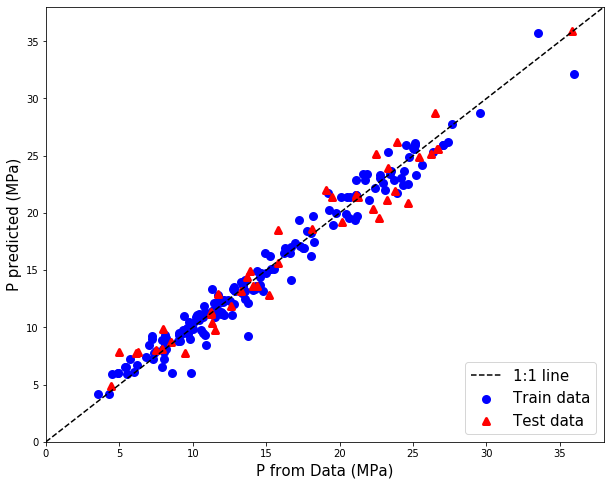

In [24]:
# Visualising results
fig, ax = plt.subplots(figsize=(10,8))
xy_line = (0, round(max(y)+2))
# ax.plot((xy_line[0],xy_line[0]), (xy_line[1],xy_line[1]),'b--', label='1:1 line')
ax.plot(xy_line,xy_line,'k--', label='1:1 line')

plt.scatter(y_train, y_pred_train, color = 'blue',lw=3,label= 'Train data')
plt.scatter(y_test, y_pred_test, color = 'red',lw=3,marker='^', label= 'Test data')
# plt.title('Y_test versus Y_pred', fontsize=25)
plt.ylabel('P predicted (MPa)',fontsize=15)
plt.xlabel('P from Data (MPa)',fontsize=15)
plt.xlim( xy_line )
plt.ylim( xy_line )
plt.legend(loc='lower right',fontsize=15) 
plt.show()